# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.445070,13,35.145074,360.273487,0.488754,0.072792
1,8.189,9.622,2005,818,0.59,2.92,2.47,12.465903,24,36.135511,323.958625,0.501683,0.098347
2,8.380,9.589,2001,818,0.78,2.88,2.44,13.028298,18,35.938764,299.438354,0.540056,0.187811
3,8.137,9.449,2040,833,0.52,2.72,2.55,2.128231,15,35.908361,319.773395,0.480991,0.020686
4,7.696,9.401,1758,717,0.22,2.83,2.14,12.171553,8,38.062522,353.104284,0.505257,0.106549


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_8628/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,3.368496,11.378641,35.164575,327.115078,0.393571,0.073579
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,4.845054,9.139568,5.338700,167.617957,0.151801,0.056017
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.018586,2.000000,20.570709,0.091058,0.033797,-0.062450
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.482279,5.000000,31.746440,283.887328,0.407228,0.027204
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.642883,8.000000,36.135511,353.034542,0.449670,0.063714
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,3.921804,15.000000,39.139044,448.017711,0.476635,0.110983
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,17.862923,56.000000,45.825416,652.546648,0.555648,0.241284


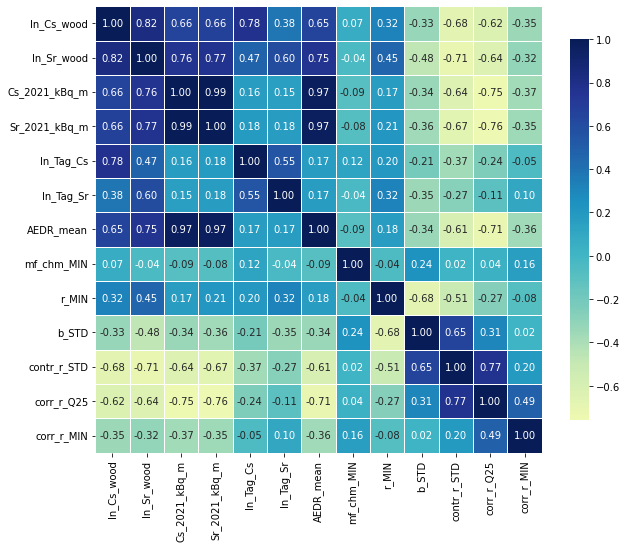

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [16]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN', 'AEDR_mean'])
y = pd.DataFrame(select, columns= ['ln_Cs_wood'])

In [17]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [18]:
# Columns in "X" data collections
X.head()

,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN,AEDR_mean,Random1,Random2,Random3,Random4,Random5
0,0.445070,13,35.145074,360.273487,0.488754,0.072792,2.33,8.047394,10.196000,8.171127,8.604026,13.094727
1,12.465903,24,36.135511,323.958625,0.501683,0.098347,2.47,9.264583,10.447230,10.699502,7.606860,9.097834
2,13.028298,18,35.938764,299.438354,0.540056,0.187811,2.44,7.261439,10.490879,7.954787,11.128001,9.973747
3,2.128231,15,35.908361,319.773395,0.480991,0.020686,2.55,11.477074,9.335549,8.865465,9.425478,9.526425
4,12.171553,8,38.062522,353.104284,0.505257,0.106549,2.14,12.050740,10.613975,12.276636,8.665773,9.975156


In [19]:
# Columns in "y" data collections
y.head()

,ln_Cs_wood
0,6.824
1,8.189
2,8.380
3,8.137
4,7.696


# Create first XGBoost model for estimate varibiality of output stats

In [20]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [21]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [22]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [23]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.42328442845964187, 0.5536363708215883, 0.515877829919766]
    Mean: 0.498
    Std: 0.055

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.18152486 1.30549624 1.09853792]
    Mean: 1.195
    Std: 0.085

 --------------------
Mean absolute error (MAE): 

    Scores: [0.911071431187221, 0.7729275852652158, 1.1227498874664308]
    Mean: 0.936
    Std: 0.144

 --------------------


# Find optimal hyperparameters for XGBoost model

In [24]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [25]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.112 (std: 0.402)
Parameters: {'colsample_bytree': 0.17776794768249926, 'gamma': 0.1800815030201578, 'learning_rate': 0.19065756283052615, 'max_depth': 3, 'n_estimators': 121, 'subsample': 0.8854527443186031}



In [27]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.36620398, 0.45644908, 0.49145613, 0.31990533, 0.3599153 ,
       0.17914314, 0.33670049, 0.44168782, 0.58528457, 0.27255673,
       0.46996312, 0.25358839, 0.48333778, 0.36044569, 0.24246798,
       0.46245661, 0.20228939, 0.22629814, 0.48650789, 0.37036958,
       0.28687634, 0.37645979, 0.35492811, 0.37671084, 0.58937201,
       0.51747804, 0.49220562, 0.18536415, 0.62820992, 0.42371197]), 'std_fit_time': array([0.11878063, 0.01166479, 0.01047256, 0.01228954, 0.0383481 ,
       0.00485501, 0.01445367, 0.01178579, 0.12848623, 0.01244117,
       0.02329742, 0.00395561, 0.009515  , 0.02259039, 0.011801  ,
       0.02108382, 0.00436586, 0.0042531 , 0.00526067, 0.02831842,
       0.01223623, 0.02357651, 0.01133505, 0.06181831, 0.03179762,
       0.02749782, 0.11746403, 0.00706045, 0.04291825, 0.02685912]), 'mean_score_time': array([0.006353  , 0.00718842, 0.00626917, 0.00665917, 0.00657868,
       0.00644026, 0.0068161 , 0.00682788, 0.0068119 , 0.00679259,
     

In [28]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.17776794768249926
Gamma: 0.1800815030201578
Learning_rate: 0.19065756283052615
Max_depth: 3
N_estimators: 121
Subsample: 0.8854527443186031


# Estimation of a basic XGBoost model using Loops

In [29]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [30]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:5.56184	validation_1-rmse:5.55123
[1]	validation_0-rmse:4.58996	validation_1-rmse:4.57098


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:3.79164	validation_1-rmse:3.84290
[3]	validation_0-rmse:3.15384	validation_1-rmse:3.20055
[4]	validation_0-rmse:2.64896	validation_1-rmse:2.69952
[5]	validation_0-rmse:2.21001	validation_1-rmse:2.28030
[6]	validation_0-rmse:1.88389	validation_1-rmse:2.02339
[7]	validation_0-rmse:1.60290	validation_1-rmse:1.78049
[8]	validation_0-rmse:1.38994	validation_1-rmse:1.66508
[9]	validation_0-rmse:1.20967	validation_1-rmse:1.51300
[10]	validation_0-rmse:1.07090	validation_1-rmse:1.44073
[11]	validation_0-rmse:0.95552	validation_1-rmse:1.38606
[12]	validation_0-rmse:0.87260	validation_1-rmse:1.34909
[13]	validation_0-rmse:0.80796	validation_1-rmse:1.34455
[14]	validation_0-rmse:0.74433	validation_1-rmse:1.34393
[15]	validation_0-rmse:0.69907	validation_1-rmse:1.31815
[16]	validation_0-rmse:0.66076	validation_1-rmse:1.31959
[17]	validation_0-rmse:0.62420	validation_1-rmse:1.31191
[18]	validation_0-rmse:0.59554	validation_1-rmse:1.28974
[19]	validation_0-rmse:0.55791	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.89865	validation_1-rmse:2.35698
[7]	validation_0-rmse:1.61326	validation_1-rmse:2.03249
[8]	validation_0-rmse:1.41451	validation_1-rmse:1.84958
[9]	validation_0-rmse:1.22346	validation_1-rmse:1.66521
[10]	validation_0-rmse:1.10282	validation_1-rmse:1.55131
[11]	validation_0-rmse:0.98623	validation_1-rmse:1.41271
[12]	validation_0-rmse:0.90793	validation_1-rmse:1.36016
[13]	validation_0-rmse:0.85271	validation_1-rmse:1.31659
[14]	validation_0-rmse:0.80237	validation_1-rmse:1.28783
[15]	validation_0-rmse:0.75230	validation_1-rmse:1.20737
[16]	validation_0-rmse:0.71680	validation_1-rmse:1.20116
[17]	validation_0-rmse:0.68304	validation_1-rmse:1.15105
[18]	validation_0-rmse:0.64646	validation_1-rmse:1.10721
[19]	validation_0-rmse:0.59686	validation_1-rmse:1.08072
[20]	validation_0-rmse:0.56926	validation_1-rmse:1.09410
[21]	validation_0-rmse:0.55114	validation_1-rmse:1.08124
[22]	validation_0-rmse:0.51745	validation_1-rmse:1.05662
[23]	validation_0-rmse:0.49550	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:2.22918	validation_1-rmse:2.24748
[6]	validation_0-rmse:1.88970	validation_1-rmse:1.96019
[7]	validation_0-rmse:1.60756	validation_1-rmse:1.72299
[8]	validation_0-rmse:1.39718	validation_1-rmse:1.59149
[9]	validation_0-rmse:1.20703	validation_1-rmse:1.45354
[10]	validation_0-rmse:1.06211	validation_1-rmse:1.33808
[11]	validation_0-rmse:0.95190	validation_1-rmse:1.25955
[12]	validation_0-rmse:0.87254	validation_1-rmse:1.20473
[13]	validation_0-rmse:0.80967	validation_1-rmse:1.19210
[14]	validation_0-rmse:0.75532	validation_1-rmse:1.17880
[15]	validation_0-rmse:0.71085	validation_1-rmse:1.16770
[16]	validation_0-rmse:0.67307	validation_1-rmse:1.16158
[17]	validation_0-rmse:0.63298	validation_1-rmse:1.17211
[18]	validation_0-rmse:0.59720	validation_1-rmse:1.18040
[19]	validation_0-rmse:0.55889	validation_1-rmse:1.18479
[20]	validation_0-rmse:0.53334	validation_1-rmse:1.16982
[21]	validation_0-rmse:0.51643	validation_1-rmse:1.15355
[22]	validation_0-rmse:0.49479	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.68414	validation_1-rmse:2.47235
[5]	validation_0-rmse:2.24492	validation_1-rmse:2.07505
[6]	validation_0-rmse:1.90795	validation_1-rmse:1.77309
[7]	validation_0-rmse:1.61681	validation_1-rmse:1.58024
[8]	validation_0-rmse:1.41506	validation_1-rmse:1.42698
[9]	validation_0-rmse:1.22925	validation_1-rmse:1.30511
[10]	validation_0-rmse:1.09566	validation_1-rmse:1.24255
[11]	validation_0-rmse:0.97192	validation_1-rmse:1.16663
[12]	validation_0-rmse:0.88609	validation_1-rmse:1.13020
[13]	validation_0-rmse:0.82787	validation_1-rmse:1.11119
[14]	validation_0-rmse:0.77118	validation_1-rmse:1.10755
[15]	validation_0-rmse:0.72034	validation_1-rmse:1.11464
[16]	validation_0-rmse:0.68943	validation_1-rmse:1.12782
[17]	validation_0-rmse:0.64793	validation_1-rmse:1.14269
[18]	validation_0-rmse:0.59900	validation_1-rmse:1.16009
[19]	validation_0-rmse:0.55281	validation_1-rmse:1.14722
[20]	validation_0-rmse:0.53072	validation_1-rmse:1.14154
[21]	validation_0-rmse:0.51642	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:2.23891	validation_1-rmse:1.74505
[6]	validation_0-rmse:1.89099	validation_1-rmse:1.48204
[7]	validation_0-rmse:1.59681	validation_1-rmse:1.29202
[8]	validation_0-rmse:1.38212	validation_1-rmse:1.16513
[9]	validation_0-rmse:1.21326	validation_1-rmse:1.09995
[10]	validation_0-rmse:1.06880	validation_1-rmse:1.05284
[11]	validation_0-rmse:0.94626	validation_1-rmse:0.99669
[12]	validation_0-rmse:0.85031	validation_1-rmse:0.98046
[13]	validation_0-rmse:0.79017	validation_1-rmse:0.99721
[14]	validation_0-rmse:0.73529	validation_1-rmse:1.02821
[15]	validation_0-rmse:0.67927	validation_1-rmse:1.01461
[16]	validation_0-rmse:0.63680	validation_1-rmse:1.04163
[17]	validation_0-rmse:0.59771	validation_1-rmse:1.05341
[18]	validation_0-rmse:0.56260	validation_1-rmse:1.06001
[19]	validation_0-rmse:0.52162	validation_1-rmse:1.06664
[20]	validation_0-rmse:0.50265	validation_1-rmse:1.06603
[21]	validation_0-rmse:0.48435	validation_1-rmse:1.06193
[22]	validation_0-rmse:0.46003	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.89018	validation_1-rmse:2.06403
[7]	validation_0-rmse:1.60514	validation_1-rmse:1.76744
[8]	validation_0-rmse:1.40625	validation_1-rmse:1.61230
[9]	validation_0-rmse:1.22998	validation_1-rmse:1.47422
[10]	validation_0-rmse:1.10034	validation_1-rmse:1.38000
[11]	validation_0-rmse:0.98739	validation_1-rmse:1.27982
[12]	validation_0-rmse:0.90724	validation_1-rmse:1.22454
[13]	validation_0-rmse:0.84679	validation_1-rmse:1.22099
[14]	validation_0-rmse:0.79424	validation_1-rmse:1.20879
[15]	validation_0-rmse:0.74177	validation_1-rmse:1.19607
[16]	validation_0-rmse:0.70586	validation_1-rmse:1.18900
[17]	validation_0-rmse:0.66604	validation_1-rmse:1.18011
[18]	validation_0-rmse:0.63143	validation_1-rmse:1.14987
[19]	validation_0-rmse:0.59749	validation_1-rmse:1.13297
[20]	validation_0-rmse:0.56862	validation_1-rmse:1.13576
[21]	validation_0-rmse:0.55127	validation_1-rmse:1.13172
[22]	validation_0-rmse:0.52352	validation_1-rmse:1.10500
[23]	validation_0-rmse:0.50827	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.90568	validation_1-rmse:2.05537
[7]	validation_0-rmse:1.60804	validation_1-rmse:1.81827
[8]	validation_0-rmse:1.40267	validation_1-rmse:1.67034
[9]	validation_0-rmse:1.22030	validation_1-rmse:1.51453
[10]	validation_0-rmse:1.07957	validation_1-rmse:1.40954
[11]	validation_0-rmse:0.94993	validation_1-rmse:1.32098
[12]	validation_0-rmse:0.85524	validation_1-rmse:1.29544
[13]	validation_0-rmse:0.79190	validation_1-rmse:1.26594
[14]	validation_0-rmse:0.74012	validation_1-rmse:1.23821
[15]	validation_0-rmse:0.69653	validation_1-rmse:1.20945
[16]	validation_0-rmse:0.66910	validation_1-rmse:1.19227
[17]	validation_0-rmse:0.62560	validation_1-rmse:1.18484
[18]	validation_0-rmse:0.59985	validation_1-rmse:1.17859
[19]	validation_0-rmse:0.56034	validation_1-rmse:1.17155
[20]	validation_0-rmse:0.53539	validation_1-rmse:1.16257
[21]	validation_0-rmse:0.51012	validation_1-rmse:1.16266
[22]	validation_0-rmse:0.48542	validation_1-rmse:1.16331
[23]	validation_0-rmse:0.46987	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.88350	validation_1-rmse:1.93481
[7]	validation_0-rmse:1.60303	validation_1-rmse:1.69202
[8]	validation_0-rmse:1.40978	validation_1-rmse:1.53557
[9]	validation_0-rmse:1.23226	validation_1-rmse:1.37940
[10]	validation_0-rmse:1.12360	validation_1-rmse:1.30780
[11]	validation_0-rmse:1.01745	validation_1-rmse:1.21154
[12]	validation_0-rmse:0.91574	validation_1-rmse:1.15939
[13]	validation_0-rmse:0.84794	validation_1-rmse:1.11614
[14]	validation_0-rmse:0.79802	validation_1-rmse:1.09730
[15]	validation_0-rmse:0.74836	validation_1-rmse:1.05628
[16]	validation_0-rmse:0.71576	validation_1-rmse:1.05447
[17]	validation_0-rmse:0.67066	validation_1-rmse:1.05599
[18]	validation_0-rmse:0.63587	validation_1-rmse:1.03414
[19]	validation_0-rmse:0.58647	validation_1-rmse:1.01995
[20]	validation_0-rmse:0.55211	validation_1-rmse:1.03064
[21]	validation_0-rmse:0.53586	validation_1-rmse:1.02177
[22]	validation_0-rmse:0.51486	validation_1-rmse:0.99935
[23]	validation_0-rmse:0.49210	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.24210	validation_1-rmse:1.54276
[10]	validation_0-rmse:1.11288	validation_1-rmse:1.42750
[11]	validation_0-rmse:1.00540	validation_1-rmse:1.32532
[12]	validation_0-rmse:0.91915	validation_1-rmse:1.26777
[13]	validation_0-rmse:0.84833	validation_1-rmse:1.22404
[14]	validation_0-rmse:0.80103	validation_1-rmse:1.17001
[15]	validation_0-rmse:0.75346	validation_1-rmse:1.15083
[16]	validation_0-rmse:0.71629	validation_1-rmse:1.12861
[17]	validation_0-rmse:0.67608	validation_1-rmse:1.09509
[18]	validation_0-rmse:0.63570	validation_1-rmse:1.06453
[19]	validation_0-rmse:0.59522	validation_1-rmse:1.05508
[20]	validation_0-rmse:0.56111	validation_1-rmse:1.05832
[21]	validation_0-rmse:0.54139	validation_1-rmse:1.03923
[22]	validation_0-rmse:0.51235	validation_1-rmse:1.03755
[23]	validation_0-rmse:0.49619	validation_1-rmse:1.04382
[24]	validation_0-rmse:0.47850	validation_1-rmse:1.05340
[25]	validation_0-rmse:0.46175	validation_1-rmse:1.04637
[26]	validation_0-rmse:0.44514	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78317	validation_1-rmse:1.14950
[15]	validation_0-rmse:0.72757	validation_1-rmse:1.12229
[16]	validation_0-rmse:0.69500	validation_1-rmse:1.08984
[17]	validation_0-rmse:0.65885	validation_1-rmse:1.08835
[18]	validation_0-rmse:0.61736	validation_1-rmse:1.08019
[19]	validation_0-rmse:0.59293	validation_1-rmse:1.06166
[20]	validation_0-rmse:0.56063	validation_1-rmse:1.05405
[21]	validation_0-rmse:0.53476	validation_1-rmse:1.05771
[22]	validation_0-rmse:0.51458	validation_1-rmse:1.05201
[23]	validation_0-rmse:0.49572	validation_1-rmse:1.05989
[24]	validation_0-rmse:0.47008	validation_1-rmse:1.05120
[25]	validation_0-rmse:0.45665	validation_1-rmse:1.06076
[26]	validation_0-rmse:0.43966	validation_1-rmse:1.04923
[27]	validation_0-rmse:0.42278	validation_1-rmse:1.03851
[28]	validation_0-rmse:0.41587	validation_1-rmse:1.03889
[29]	validation_0-rmse:0.40537	validation_1-rmse:1.02811
[30]	validation_0-rmse:0.39297	validation_1-rmse:1.02263
[31]	validation_0-rmse:0.37912	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.52410	validation_1-rmse:1.19792
[22]	validation_0-rmse:0.49861	validation_1-rmse:1.18535
[23]	validation_0-rmse:0.48583	validation_1-rmse:1.17862
[24]	validation_0-rmse:0.46596	validation_1-rmse:1.17840
[25]	validation_0-rmse:0.45136	validation_1-rmse:1.18055
[26]	validation_0-rmse:0.43652	validation_1-rmse:1.19111
[27]	validation_0-rmse:0.42460	validation_1-rmse:1.18212
[28]	validation_0-rmse:0.40980	validation_1-rmse:1.17993
[29]	validation_0-rmse:0.39508	validation_1-rmse:1.17419
[30]	validation_0-rmse:0.38491	validation_1-rmse:1.17462
[31]	validation_0-rmse:0.37048	validation_1-rmse:1.17746
[32]	validation_0-rmse:0.35919	validation_1-rmse:1.18286
[33]	validation_0-rmse:0.35244	validation_1-rmse:1.18546
[34]	validation_0-rmse:0.34043	validation_1-rmse:1.18361
[35]	validation_0-rmse:0.32845	validation_1-rmse:1.17032
[36]	validation_0-rmse:0.32044	validation_1-rmse:1.17203
[37]	validation_0-rmse:0.31004	validation_1-rmse:1.16687
[38]	validation_0-rmse:0.30526	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.56787	validation_1-rmse:0.70041
[23]	validation_0-rmse:0.55744	validation_1-rmse:0.73401
[24]	validation_0-rmse:0.54119	validation_1-rmse:0.72883
[25]	validation_0-rmse:0.52293	validation_1-rmse:0.73629
[26]	validation_0-rmse:0.50527	validation_1-rmse:0.74552
[27]	validation_0-rmse:0.48720	validation_1-rmse:0.72967
[28]	validation_0-rmse:0.46876	validation_1-rmse:0.72617
[29]	validation_0-rmse:0.45563	validation_1-rmse:0.71593
[30]	validation_0-rmse:0.43769	validation_1-rmse:0.71729
[31]	validation_0-rmse:0.41737	validation_1-rmse:0.71389
[32]	validation_0-rmse:0.40491	validation_1-rmse:0.71950
[33]	validation_0-rmse:0.39546	validation_1-rmse:0.72277
[34]	validation_0-rmse:0.38375	validation_1-rmse:0.71446
[35]	validation_0-rmse:0.37031	validation_1-rmse:0.70717
[36]	validation_0-rmse:0.36501	validation_1-rmse:0.72354
[37]	validation_0-rmse:0.35698	validation_1-rmse:0.72514
[38]	validation_0-rmse:0.34841	validation_1-rmse:0.72974
[39]	validation_0-rmse:0.34071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.64809	validation_1-rmse:1.03216
[20]	validation_0-rmse:0.61718	validation_1-rmse:1.02033
[21]	validation_0-rmse:0.59918	validation_1-rmse:1.02534
[22]	validation_0-rmse:0.58388	validation_1-rmse:1.01313
[23]	validation_0-rmse:0.56466	validation_1-rmse:1.00521
[24]	validation_0-rmse:0.53826	validation_1-rmse:1.00034
[25]	validation_0-rmse:0.52800	validation_1-rmse:0.98415
[26]	validation_0-rmse:0.51064	validation_1-rmse:0.98437
[27]	validation_0-rmse:0.50255	validation_1-rmse:0.97270
[28]	validation_0-rmse:0.48952	validation_1-rmse:0.97421
[29]	validation_0-rmse:0.47145	validation_1-rmse:0.97541
[30]	validation_0-rmse:0.45204	validation_1-rmse:0.97863
[31]	validation_0-rmse:0.44323	validation_1-rmse:0.98446
[32]	validation_0-rmse:0.42649	validation_1-rmse:0.97919
[33]	validation_0-rmse:0.41017	validation_1-rmse:0.95824
[34]	validation_0-rmse:0.39991	validation_1-rmse:0.95670
[35]	validation_0-rmse:0.39011	validation_1-rmse:0.94831
[36]	validation_0-rmse:0.37905	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62664	validation_1-rmse:1.10447
[19]	validation_0-rmse:0.58404	validation_1-rmse:1.09477
[20]	validation_0-rmse:0.56642	validation_1-rmse:1.08876
[21]	validation_0-rmse:0.53670	validation_1-rmse:1.11579
[22]	validation_0-rmse:0.51051	validation_1-rmse:1.10906
[23]	validation_0-rmse:0.49834	validation_1-rmse:1.10889
[24]	validation_0-rmse:0.48043	validation_1-rmse:1.10596
[25]	validation_0-rmse:0.46649	validation_1-rmse:1.11078
[26]	validation_0-rmse:0.45184	validation_1-rmse:1.12098
[27]	validation_0-rmse:0.43925	validation_1-rmse:1.11886
[28]	validation_0-rmse:0.42889	validation_1-rmse:1.11573
[29]	validation_0-rmse:0.41866	validation_1-rmse:1.10498
[30]	validation_0-rmse:0.40732	validation_1-rmse:1.13148
[31]	validation_0-rmse:0.39731	validation_1-rmse:1.13848
[32]	validation_0-rmse:0.38804	validation_1-rmse:1.14090
[33]	validation_0-rmse:0.37196	validation_1-rmse:1.12695
[34]	validation_0-rmse:0.36599	validation_1-rmse:1.12892
[35]	validation_0-rmse:0.35562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.60035	validation_1-rmse:1.06210
[19]	validation_0-rmse:0.57684	validation_1-rmse:1.04031
[20]	validation_0-rmse:0.54598	validation_1-rmse:1.02821
[21]	validation_0-rmse:0.52260	validation_1-rmse:1.04451
[22]	validation_0-rmse:0.50223	validation_1-rmse:1.03821
[23]	validation_0-rmse:0.48644	validation_1-rmse:1.02855
[24]	validation_0-rmse:0.47053	validation_1-rmse:1.01248
[25]	validation_0-rmse:0.45436	validation_1-rmse:1.02282
[26]	validation_0-rmse:0.43889	validation_1-rmse:1.02276
[27]	validation_0-rmse:0.42696	validation_1-rmse:1.02058
[28]	validation_0-rmse:0.41305	validation_1-rmse:1.00992
[29]	validation_0-rmse:0.40337	validation_1-rmse:1.00125
[30]	validation_0-rmse:0.38750	validation_1-rmse:1.00214
[31]	validation_0-rmse:0.37053	validation_1-rmse:1.01249
[32]	validation_0-rmse:0.36227	validation_1-rmse:1.02317
[33]	validation_0-rmse:0.35590	validation_1-rmse:1.01638
[34]	validation_0-rmse:0.35093	validation_1-rmse:1.01705
[35]	validation_0-rmse:0.34422	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55672	validation_1-rmse:1.25836
[21]	validation_0-rmse:0.54100	validation_1-rmse:1.25788
[22]	validation_0-rmse:0.51794	validation_1-rmse:1.24499
[23]	validation_0-rmse:0.49116	validation_1-rmse:1.24480
[24]	validation_0-rmse:0.46741	validation_1-rmse:1.24514
[25]	validation_0-rmse:0.44550	validation_1-rmse:1.24310
[26]	validation_0-rmse:0.43181	validation_1-rmse:1.22641
[27]	validation_0-rmse:0.42533	validation_1-rmse:1.22132
[28]	validation_0-rmse:0.41240	validation_1-rmse:1.20910
[29]	validation_0-rmse:0.39902	validation_1-rmse:1.19606
[30]	validation_0-rmse:0.38644	validation_1-rmse:1.17542
[31]	validation_0-rmse:0.37259	validation_1-rmse:1.17205
[32]	validation_0-rmse:0.36070	validation_1-rmse:1.16521
[33]	validation_0-rmse:0.34753	validation_1-rmse:1.14449
[34]	validation_0-rmse:0.34041	validation_1-rmse:1.14421
[35]	validation_0-rmse:0.32355	validation_1-rmse:1.13768
[36]	validation_0-rmse:0.31637	validation_1-rmse:1.13500
[37]	validation_0-rmse:0.30600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.67402	validation_1-rmse:1.02553
[19]	validation_0-rmse:0.64672	validation_1-rmse:1.00815
[20]	validation_0-rmse:0.61592	validation_1-rmse:1.00947
[21]	validation_0-rmse:0.59236	validation_1-rmse:1.01591
[22]	validation_0-rmse:0.55639	validation_1-rmse:1.03372
[23]	validation_0-rmse:0.54004	validation_1-rmse:1.03472
[24]	validation_0-rmse:0.51455	validation_1-rmse:1.04460
[25]	validation_0-rmse:0.49385	validation_1-rmse:1.04632
[26]	validation_0-rmse:0.46777	validation_1-rmse:1.05209
[27]	validation_0-rmse:0.45418	validation_1-rmse:1.05406
[28]	validation_0-rmse:0.43795	validation_1-rmse:1.06957
[29]	validation_0-rmse:0.42506	validation_1-rmse:1.08243
[30]	validation_0-rmse:0.40635	validation_1-rmse:1.07900
[31]	validation_0-rmse:0.39658	validation_1-rmse:1.09146
[32]	validation_0-rmse:0.38279	validation_1-rmse:1.07788
[33]	validation_0-rmse:0.36832	validation_1-rmse:1.07461
[34]	validation_0-rmse:0.36099	validation_1-rmse:1.07435
[35]	validation_0-rmse:0.35466	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62029	validation_1-rmse:0.91657
[19]	validation_0-rmse:0.58313	validation_1-rmse:0.92238
[20]	validation_0-rmse:0.55517	validation_1-rmse:0.92727
[21]	validation_0-rmse:0.53748	validation_1-rmse:0.93010
[22]	validation_0-rmse:0.51079	validation_1-rmse:0.93540
[23]	validation_0-rmse:0.49858	validation_1-rmse:0.93036
[24]	validation_0-rmse:0.47974	validation_1-rmse:0.93330
[25]	validation_0-rmse:0.46174	validation_1-rmse:0.92998
[26]	validation_0-rmse:0.44663	validation_1-rmse:0.93267
[27]	validation_0-rmse:0.43397	validation_1-rmse:0.92889
[28]	validation_0-rmse:0.41944	validation_1-rmse:0.93021
[29]	validation_0-rmse:0.40463	validation_1-rmse:0.93394
[30]	validation_0-rmse:0.39213	validation_1-rmse:0.93880
[31]	validation_0-rmse:0.38437	validation_1-rmse:0.93756
[32]	validation_0-rmse:0.36961	validation_1-rmse:0.93769
[33]	validation_0-rmse:0.35538	validation_1-rmse:0.93353
[34]	validation_0-rmse:0.34799	validation_1-rmse:0.92867
[35]	validation_0-rmse:0.33816	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64022	validation_1-rmse:1.50597
[18]	validation_0-rmse:0.60240	validation_1-rmse:1.48630
[19]	validation_0-rmse:0.57129	validation_1-rmse:1.46503
[20]	validation_0-rmse:0.54155	validation_1-rmse:1.46479
[21]	validation_0-rmse:0.52133	validation_1-rmse:1.46662
[22]	validation_0-rmse:0.49208	validation_1-rmse:1.44867
[23]	validation_0-rmse:0.47647	validation_1-rmse:1.45846
[24]	validation_0-rmse:0.45752	validation_1-rmse:1.46293
[25]	validation_0-rmse:0.43967	validation_1-rmse:1.46280
[26]	validation_0-rmse:0.42152	validation_1-rmse:1.46467
[27]	validation_0-rmse:0.40550	validation_1-rmse:1.46774
[28]	validation_0-rmse:0.39651	validation_1-rmse:1.47312
[29]	validation_0-rmse:0.37880	validation_1-rmse:1.47574
[0]	validation_0-rmse:5.57538	validation_1-rmse:5.50692
[1]	validation_0-rmse:4.60077	validation_1-rmse:4.53366
[2]	validation_0-rmse:3.82709	validation_1-rmse:3.74189
[3]	validation_0-rmse:3.18333	validation_1-rmse:3.14454
[4]	validation_0-rmse:2.66491	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.90990	validation_1-rmse:1.16942
[13]	validation_0-rmse:0.85048	validation_1-rmse:1.09406
[14]	validation_0-rmse:0.79887	validation_1-rmse:1.09057
[15]	validation_0-rmse:0.75168	validation_1-rmse:1.04972
[16]	validation_0-rmse:0.72227	validation_1-rmse:1.03232
[17]	validation_0-rmse:0.67474	validation_1-rmse:1.02793
[18]	validation_0-rmse:0.64898	validation_1-rmse:1.00807
[19]	validation_0-rmse:0.61488	validation_1-rmse:0.98824
[20]	validation_0-rmse:0.58762	validation_1-rmse:0.99106
[21]	validation_0-rmse:0.55820	validation_1-rmse:0.98509
[22]	validation_0-rmse:0.52571	validation_1-rmse:0.99742
[23]	validation_0-rmse:0.50950	validation_1-rmse:0.98186
[24]	validation_0-rmse:0.49132	validation_1-rmse:0.98489
[25]	validation_0-rmse:0.47128	validation_1-rmse:0.96790
[26]	validation_0-rmse:0.45530	validation_1-rmse:0.96521
[27]	validation_0-rmse:0.43534	validation_1-rmse:0.95009
[28]	validation_0-rmse:0.42154	validation_1-rmse:0.94624
[29]	validation_0-rmse:0.40650	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.65745	validation_1-rmse:1.25958
[17]	validation_0-rmse:0.61892	validation_1-rmse:1.26369
[18]	validation_0-rmse:0.58274	validation_1-rmse:1.26495
[19]	validation_0-rmse:0.54158	validation_1-rmse:1.26713
[20]	validation_0-rmse:0.51388	validation_1-rmse:1.29468
[21]	validation_0-rmse:0.49248	validation_1-rmse:1.28898
[22]	validation_0-rmse:0.46588	validation_1-rmse:1.27458
[23]	validation_0-rmse:0.44649	validation_1-rmse:1.28028
[24]	validation_0-rmse:0.43153	validation_1-rmse:1.28461
[25]	validation_0-rmse:0.41792	validation_1-rmse:1.28222
[26]	validation_0-rmse:0.40402	validation_1-rmse:1.26727
[27]	validation_0-rmse:0.39265	validation_1-rmse:1.26571
[28]	validation_0-rmse:0.38170	validation_1-rmse:1.26526
[29]	validation_0-rmse:0.36797	validation_1-rmse:1.24994
[30]	validation_0-rmse:0.35402	validation_1-rmse:1.24557
[31]	validation_0-rmse:0.34194	validation_1-rmse:1.24986
[32]	validation_0-rmse:0.32869	validation_1-rmse:1.25840
[33]	validation_0-rmse:0.31715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63970	validation_1-rmse:0.99146
[19]	validation_0-rmse:0.61809	validation_1-rmse:0.98181
[20]	validation_0-rmse:0.58721	validation_1-rmse:0.99050
[21]	validation_0-rmse:0.56503	validation_1-rmse:0.98883
[22]	validation_0-rmse:0.53473	validation_1-rmse:0.97139
[23]	validation_0-rmse:0.52134	validation_1-rmse:0.96941
[24]	validation_0-rmse:0.49971	validation_1-rmse:0.96300
[25]	validation_0-rmse:0.48435	validation_1-rmse:0.96318
[26]	validation_0-rmse:0.47071	validation_1-rmse:0.96837
[27]	validation_0-rmse:0.44971	validation_1-rmse:0.96981
[28]	validation_0-rmse:0.43371	validation_1-rmse:0.95486
[29]	validation_0-rmse:0.42073	validation_1-rmse:0.94110
[30]	validation_0-rmse:0.40636	validation_1-rmse:0.93278
[31]	validation_0-rmse:0.39496	validation_1-rmse:0.94463
[32]	validation_0-rmse:0.38322	validation_1-rmse:0.94113
[33]	validation_0-rmse:0.37794	validation_1-rmse:0.94452
[34]	validation_0-rmse:0.37031	validation_1-rmse:0.94592
[35]	validation_0-rmse:0.36090	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.65604	validation_1-rmse:1.25686
[17]	validation_0-rmse:0.61642	validation_1-rmse:1.23110
[18]	validation_0-rmse:0.58235	validation_1-rmse:1.18409
[19]	validation_0-rmse:0.55649	validation_1-rmse:1.16468
[20]	validation_0-rmse:0.53510	validation_1-rmse:1.16911
[21]	validation_0-rmse:0.51996	validation_1-rmse:1.16924
[22]	validation_0-rmse:0.50172	validation_1-rmse:1.15675
[23]	validation_0-rmse:0.48154	validation_1-rmse:1.16710
[24]	validation_0-rmse:0.46181	validation_1-rmse:1.14975
[25]	validation_0-rmse:0.44865	validation_1-rmse:1.15369
[26]	validation_0-rmse:0.43889	validation_1-rmse:1.15255
[27]	validation_0-rmse:0.43086	validation_1-rmse:1.15485
[28]	validation_0-rmse:0.40939	validation_1-rmse:1.13197
[29]	validation_0-rmse:0.39586	validation_1-rmse:1.13104
[30]	validation_0-rmse:0.37587	validation_1-rmse:1.11709
[31]	validation_0-rmse:0.36191	validation_1-rmse:1.11325
[32]	validation_0-rmse:0.34958	validation_1-rmse:1.11087
[33]	validation_0-rmse:0.34342	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69996	validation_1-rmse:1.03928
[17]	validation_0-rmse:0.65111	validation_1-rmse:1.04908
[18]	validation_0-rmse:0.60324	validation_1-rmse:1.06388
[19]	validation_0-rmse:0.56440	validation_1-rmse:1.06546
[20]	validation_0-rmse:0.54349	validation_1-rmse:1.06379
[21]	validation_0-rmse:0.51897	validation_1-rmse:1.07647
[22]	validation_0-rmse:0.49288	validation_1-rmse:1.08031
[23]	validation_0-rmse:0.47818	validation_1-rmse:1.08565
[24]	validation_0-rmse:0.45716	validation_1-rmse:1.09519
[25]	validation_0-rmse:0.43850	validation_1-rmse:1.10023
[26]	validation_0-rmse:0.41890	validation_1-rmse:1.09615
[27]	validation_0-rmse:0.40205	validation_1-rmse:1.10385
[28]	validation_0-rmse:0.38156	validation_1-rmse:1.11061
[29]	validation_0-rmse:0.37387	validation_1-rmse:1.11026
[30]	validation_0-rmse:0.36457	validation_1-rmse:1.10597
[31]	validation_0-rmse:0.34719	validation_1-rmse:1.10232
[32]	validation_0-rmse:0.33661	validation_1-rmse:1.09641
[33]	validation_0-rmse:0.32822	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.58003	validation_1-rmse:1.28810
[19]	validation_0-rmse:0.54605	validation_1-rmse:1.27727
[20]	validation_0-rmse:0.51313	validation_1-rmse:1.26138
[21]	validation_0-rmse:0.49403	validation_1-rmse:1.26125
[22]	validation_0-rmse:0.46992	validation_1-rmse:1.25596
[23]	validation_0-rmse:0.44759	validation_1-rmse:1.26007
[24]	validation_0-rmse:0.43047	validation_1-rmse:1.26475
[25]	validation_0-rmse:0.41859	validation_1-rmse:1.26629
[26]	validation_0-rmse:0.40176	validation_1-rmse:1.26924
[27]	validation_0-rmse:0.38733	validation_1-rmse:1.27343
[28]	validation_0-rmse:0.36890	validation_1-rmse:1.26334
[29]	validation_0-rmse:0.35733	validation_1-rmse:1.25905
[30]	validation_0-rmse:0.34535	validation_1-rmse:1.25040
[31]	validation_0-rmse:0.33044	validation_1-rmse:1.24341
[32]	validation_0-rmse:0.31893	validation_1-rmse:1.24342
[33]	validation_0-rmse:0.31229	validation_1-rmse:1.24643
[34]	validation_0-rmse:0.30312	validation_1-rmse:1.25039
[35]	validation_0-rmse:0.29443	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64197	validation_1-rmse:1.41442
[18]	validation_0-rmse:0.61583	validation_1-rmse:1.39139
[19]	validation_0-rmse:0.57397	validation_1-rmse:1.35199
[20]	validation_0-rmse:0.55047	validation_1-rmse:1.33940
[21]	validation_0-rmse:0.53064	validation_1-rmse:1.33326
[22]	validation_0-rmse:0.50969	validation_1-rmse:1.31891
[23]	validation_0-rmse:0.49808	validation_1-rmse:1.32668
[24]	validation_0-rmse:0.48086	validation_1-rmse:1.32964
[25]	validation_0-rmse:0.46776	validation_1-rmse:1.33241
[26]	validation_0-rmse:0.45436	validation_1-rmse:1.31567
[27]	validation_0-rmse:0.43705	validation_1-rmse:1.32458
[28]	validation_0-rmse:0.42373	validation_1-rmse:1.31483
[29]	validation_0-rmse:0.41251	validation_1-rmse:1.31029
[30]	validation_0-rmse:0.39616	validation_1-rmse:1.29381
[31]	validation_0-rmse:0.37980	validation_1-rmse:1.29311
[32]	validation_0-rmse:0.36649	validation_1-rmse:1.28738
[33]	validation_0-rmse:0.35768	validation_1-rmse:1.28048
[34]	validation_0-rmse:0.34867	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.59116	validation_1-rmse:1.10397
[19]	validation_0-rmse:0.55839	validation_1-rmse:1.10033
[20]	validation_0-rmse:0.53949	validation_1-rmse:1.08682
[21]	validation_0-rmse:0.52275	validation_1-rmse:1.08433
[22]	validation_0-rmse:0.50009	validation_1-rmse:1.07849
[23]	validation_0-rmse:0.47934	validation_1-rmse:1.09930
[24]	validation_0-rmse:0.45557	validation_1-rmse:1.12441
[25]	validation_0-rmse:0.44656	validation_1-rmse:1.11621
[26]	validation_0-rmse:0.43020	validation_1-rmse:1.10680
[27]	validation_0-rmse:0.42055	validation_1-rmse:1.10737
[28]	validation_0-rmse:0.41227	validation_1-rmse:1.10509
[29]	validation_0-rmse:0.39431	validation_1-rmse:1.11024
[30]	validation_0-rmse:0.38702	validation_1-rmse:1.10989
[31]	validation_0-rmse:0.37034	validation_1-rmse:1.11832
[32]	validation_0-rmse:0.35813	validation_1-rmse:1.12303
[33]	validation_0-rmse:0.35335	validation_1-rmse:1.12512
[34]	validation_0-rmse:0.34072	validation_1-rmse:1.12430
[35]	validation_0-rmse:0.33299	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.54376	validation_1-rmse:1.25730
[20]	validation_0-rmse:0.51615	validation_1-rmse:1.25937
[21]	validation_0-rmse:0.50119	validation_1-rmse:1.25730
[22]	validation_0-rmse:0.47559	validation_1-rmse:1.26575
[23]	validation_0-rmse:0.47050	validation_1-rmse:1.25852
[24]	validation_0-rmse:0.45170	validation_1-rmse:1.27366
[25]	validation_0-rmse:0.43545	validation_1-rmse:1.27807
[26]	validation_0-rmse:0.41588	validation_1-rmse:1.29167
[27]	validation_0-rmse:0.39805	validation_1-rmse:1.30442
[28]	validation_0-rmse:0.38486	validation_1-rmse:1.31149
[29]	validation_0-rmse:0.37274	validation_1-rmse:1.31069
[30]	validation_0-rmse:0.36262	validation_1-rmse:1.31075
[31]	validation_0-rmse:0.34791	validation_1-rmse:1.31275
[32]	validation_0-rmse:0.33860	validation_1-rmse:1.32401
[33]	validation_0-rmse:0.32800	validation_1-rmse:1.32543
[34]	validation_0-rmse:0.31497	validation_1-rmse:1.32300
[35]	validation_0-rmse:0.30740	validation_1-rmse:1.32712
[36]	validation_0-rmse:0.29189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.56068	validation_1-rmse:1.29711
[20]	validation_0-rmse:0.53060	validation_1-rmse:1.30997
[21]	validation_0-rmse:0.51628	validation_1-rmse:1.31712
[22]	validation_0-rmse:0.49293	validation_1-rmse:1.31071
[23]	validation_0-rmse:0.48090	validation_1-rmse:1.32337
[24]	validation_0-rmse:0.47308	validation_1-rmse:1.33436
[25]	validation_0-rmse:0.45638	validation_1-rmse:1.32782
[26]	validation_0-rmse:0.44014	validation_1-rmse:1.34243
[27]	validation_0-rmse:0.42299	validation_1-rmse:1.33186
[28]	validation_0-rmse:0.41570	validation_1-rmse:1.31629
[29]	validation_0-rmse:0.39977	validation_1-rmse:1.30802
[30]	validation_0-rmse:0.37896	validation_1-rmse:1.29097
[0]	validation_0-rmse:5.56507	validation_1-rmse:5.54868
[1]	validation_0-rmse:4.57807	validation_1-rmse:4.58393
[2]	validation_0-rmse:3.78400	validation_1-rmse:3.79575
[3]	validation_0-rmse:3.13670	validation_1-rmse:3.19574
[4]	validation_0-rmse:2.65915	validation_1-rmse:2.69329
[5]	validation_0-rmse:2.24146	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57840	validation_1-rmse:1.07121
[20]	validation_0-rmse:0.54867	validation_1-rmse:1.06766
[21]	validation_0-rmse:0.53668	validation_1-rmse:1.05775
[22]	validation_0-rmse:0.51411	validation_1-rmse:1.03858
[23]	validation_0-rmse:0.50426	validation_1-rmse:1.03735
[24]	validation_0-rmse:0.49153	validation_1-rmse:1.03164
[25]	validation_0-rmse:0.47298	validation_1-rmse:1.04292
[26]	validation_0-rmse:0.45901	validation_1-rmse:1.02498
[27]	validation_0-rmse:0.44667	validation_1-rmse:1.03185
[28]	validation_0-rmse:0.42923	validation_1-rmse:1.01767
[29]	validation_0-rmse:0.41851	validation_1-rmse:1.00453
[30]	validation_0-rmse:0.40825	validation_1-rmse:1.01088
[31]	validation_0-rmse:0.39794	validation_1-rmse:1.00417
[32]	validation_0-rmse:0.38219	validation_1-rmse:1.00336
[33]	validation_0-rmse:0.37327	validation_1-rmse:1.00409
[34]	validation_0-rmse:0.36383	validation_1-rmse:1.00011
[35]	validation_0-rmse:0.35059	validation_1-rmse:0.99525
[36]	validation_0-rmse:0.34347	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.65418	validation_1-rmse:0.97484
[20]	validation_0-rmse:0.62616	validation_1-rmse:0.99235
[21]	validation_0-rmse:0.60103	validation_1-rmse:0.98478
[22]	validation_0-rmse:0.57548	validation_1-rmse:0.98090
[23]	validation_0-rmse:0.56283	validation_1-rmse:0.97806
[24]	validation_0-rmse:0.54272	validation_1-rmse:0.96852
[25]	validation_0-rmse:0.51914	validation_1-rmse:0.95505
[26]	validation_0-rmse:0.50403	validation_1-rmse:0.95225
[27]	validation_0-rmse:0.48313	validation_1-rmse:0.94913
[28]	validation_0-rmse:0.46963	validation_1-rmse:0.92525
[29]	validation_0-rmse:0.45295	validation_1-rmse:0.93276
[30]	validation_0-rmse:0.44599	validation_1-rmse:0.92202
[31]	validation_0-rmse:0.43349	validation_1-rmse:0.93321
[32]	validation_0-rmse:0.42309	validation_1-rmse:0.92435
[33]	validation_0-rmse:0.40745	validation_1-rmse:0.91247
[34]	validation_0-rmse:0.39913	validation_1-rmse:0.90875
[35]	validation_0-rmse:0.39185	validation_1-rmse:0.90653
[36]	validation_0-rmse:0.37945	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64990	validation_1-rmse:1.29784
[18]	validation_0-rmse:0.60857	validation_1-rmse:1.26721
[19]	validation_0-rmse:0.57794	validation_1-rmse:1.23563
[20]	validation_0-rmse:0.55398	validation_1-rmse:1.23512
[21]	validation_0-rmse:0.53681	validation_1-rmse:1.22390
[22]	validation_0-rmse:0.51794	validation_1-rmse:1.20557
[23]	validation_0-rmse:0.49549	validation_1-rmse:1.21118
[24]	validation_0-rmse:0.48364	validation_1-rmse:1.20477
[25]	validation_0-rmse:0.46635	validation_1-rmse:1.20821
[26]	validation_0-rmse:0.45387	validation_1-rmse:1.19906
[27]	validation_0-rmse:0.44214	validation_1-rmse:1.18030
[28]	validation_0-rmse:0.43218	validation_1-rmse:1.16802
[29]	validation_0-rmse:0.42069	validation_1-rmse:1.15342
[30]	validation_0-rmse:0.40295	validation_1-rmse:1.14838
[31]	validation_0-rmse:0.38779	validation_1-rmse:1.14957
[32]	validation_0-rmse:0.37456	validation_1-rmse:1.15520
[33]	validation_0-rmse:0.36781	validation_1-rmse:1.14488
[34]	validation_0-rmse:0.35366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.60908	validation_1-rmse:0.94526
[19]	validation_0-rmse:0.57329	validation_1-rmse:0.94825
[20]	validation_0-rmse:0.53609	validation_1-rmse:0.94258
[21]	validation_0-rmse:0.51782	validation_1-rmse:0.94971
[22]	validation_0-rmse:0.49030	validation_1-rmse:0.95208
[23]	validation_0-rmse:0.46808	validation_1-rmse:0.96264
[24]	validation_0-rmse:0.44217	validation_1-rmse:0.95338
[25]	validation_0-rmse:0.43139	validation_1-rmse:0.96682
[26]	validation_0-rmse:0.41936	validation_1-rmse:0.97114
[27]	validation_0-rmse:0.40405	validation_1-rmse:0.98064
[28]	validation_0-rmse:0.39518	validation_1-rmse:0.98103
[29]	validation_0-rmse:0.38414	validation_1-rmse:0.99068
[30]	validation_0-rmse:0.37139	validation_1-rmse:0.99472
[31]	validation_0-rmse:0.35628	validation_1-rmse:0.99751
[32]	validation_0-rmse:0.33849	validation_1-rmse:1.00067
[33]	validation_0-rmse:0.33092	validation_1-rmse:1.00311
[34]	validation_0-rmse:0.32325	validation_1-rmse:1.00358
[35]	validation_0-rmse:0.31323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.59494	validation_1-rmse:1.13600
[19]	validation_0-rmse:0.56428	validation_1-rmse:1.12020
[20]	validation_0-rmse:0.53964	validation_1-rmse:1.11589
[21]	validation_0-rmse:0.51994	validation_1-rmse:1.11674
[22]	validation_0-rmse:0.49872	validation_1-rmse:1.10659
[23]	validation_0-rmse:0.47694	validation_1-rmse:1.08926
[24]	validation_0-rmse:0.46224	validation_1-rmse:1.08594
[25]	validation_0-rmse:0.44767	validation_1-rmse:1.09115
[26]	validation_0-rmse:0.43682	validation_1-rmse:1.08556
[27]	validation_0-rmse:0.42716	validation_1-rmse:1.09212
[28]	validation_0-rmse:0.40555	validation_1-rmse:1.08562
[29]	validation_0-rmse:0.39286	validation_1-rmse:1.08300
[30]	validation_0-rmse:0.37924	validation_1-rmse:1.08849
[31]	validation_0-rmse:0.37405	validation_1-rmse:1.09560
[32]	validation_0-rmse:0.36068	validation_1-rmse:1.09346
[33]	validation_0-rmse:0.35058	validation_1-rmse:1.08853
[34]	validation_0-rmse:0.34739	validation_1-rmse:1.08618
[35]	validation_0-rmse:0.34020	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.62189	validation_1-rmse:1.13360
[18]	validation_0-rmse:0.58981	validation_1-rmse:1.10195
[19]	validation_0-rmse:0.57154	validation_1-rmse:1.10467
[20]	validation_0-rmse:0.54227	validation_1-rmse:1.10929
[21]	validation_0-rmse:0.52118	validation_1-rmse:1.11403
[22]	validation_0-rmse:0.50031	validation_1-rmse:1.11623
[23]	validation_0-rmse:0.48208	validation_1-rmse:1.12543
[24]	validation_0-rmse:0.46491	validation_1-rmse:1.12224
[25]	validation_0-rmse:0.45331	validation_1-rmse:1.13351
[26]	validation_0-rmse:0.44389	validation_1-rmse:1.13582
[27]	validation_0-rmse:0.42956	validation_1-rmse:1.12977
[28]	validation_0-rmse:0.42024	validation_1-rmse:1.12633
[29]	validation_0-rmse:0.40936	validation_1-rmse:1.12886
[30]	validation_0-rmse:0.39567	validation_1-rmse:1.13015
[31]	validation_0-rmse:0.38423	validation_1-rmse:1.12721
[32]	validation_0-rmse:0.36622	validation_1-rmse:1.13020
[33]	validation_0-rmse:0.34531	validation_1-rmse:1.12032
[34]	validation_0-rmse:0.33718	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.63494	validation_1-rmse:1.26838
[18]	validation_0-rmse:0.58705	validation_1-rmse:1.24627
[19]	validation_0-rmse:0.54636	validation_1-rmse:1.22027
[20]	validation_0-rmse:0.51700	validation_1-rmse:1.22391
[21]	validation_0-rmse:0.49712	validation_1-rmse:1.20866
[22]	validation_0-rmse:0.47508	validation_1-rmse:1.18382
[23]	validation_0-rmse:0.45727	validation_1-rmse:1.18270
[24]	validation_0-rmse:0.43838	validation_1-rmse:1.16827
[25]	validation_0-rmse:0.42310	validation_1-rmse:1.16811
[26]	validation_0-rmse:0.40940	validation_1-rmse:1.14320
[27]	validation_0-rmse:0.40288	validation_1-rmse:1.13773
[28]	validation_0-rmse:0.38243	validation_1-rmse:1.13477
[29]	validation_0-rmse:0.37024	validation_1-rmse:1.12437
[30]	validation_0-rmse:0.36522	validation_1-rmse:1.12082
[31]	validation_0-rmse:0.35290	validation_1-rmse:1.13129
[32]	validation_0-rmse:0.34204	validation_1-rmse:1.13434
[33]	validation_0-rmse:0.33409	validation_1-rmse:1.13772
[34]	validation_0-rmse:0.32882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.65215	validation_1-rmse:1.21249
[19]	validation_0-rmse:0.61571	validation_1-rmse:1.18154
[20]	validation_0-rmse:0.59031	validation_1-rmse:1.16050
[21]	validation_0-rmse:0.57252	validation_1-rmse:1.14891
[22]	validation_0-rmse:0.54580	validation_1-rmse:1.12434
[23]	validation_0-rmse:0.51995	validation_1-rmse:1.14604
[24]	validation_0-rmse:0.50234	validation_1-rmse:1.15313
[25]	validation_0-rmse:0.48384	validation_1-rmse:1.15470
[26]	validation_0-rmse:0.46623	validation_1-rmse:1.13993
[27]	validation_0-rmse:0.44985	validation_1-rmse:1.14862
[28]	validation_0-rmse:0.42678	validation_1-rmse:1.14989
[29]	validation_0-rmse:0.41681	validation_1-rmse:1.13907
[30]	validation_0-rmse:0.40375	validation_1-rmse:1.15193
[31]	validation_0-rmse:0.39052	validation_1-rmse:1.15279
[32]	validation_0-rmse:0.37127	validation_1-rmse:1.15237
[33]	validation_0-rmse:0.36262	validation_1-rmse:1.14247
[34]	validation_0-rmse:0.35634	validation_1-rmse:1.13897
[35]	validation_0-rmse:0.34857	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.67295	validation_1-rmse:0.76334
[19]	validation_0-rmse:0.62983	validation_1-rmse:0.75742
[20]	validation_0-rmse:0.60794	validation_1-rmse:0.77622
[21]	validation_0-rmse:0.58661	validation_1-rmse:0.77765
[22]	validation_0-rmse:0.56320	validation_1-rmse:0.76856
[23]	validation_0-rmse:0.54545	validation_1-rmse:0.75094
[24]	validation_0-rmse:0.52139	validation_1-rmse:0.75373
[25]	validation_0-rmse:0.50995	validation_1-rmse:0.75308
[26]	validation_0-rmse:0.49208	validation_1-rmse:0.76126
[27]	validation_0-rmse:0.47799	validation_1-rmse:0.75520
[28]	validation_0-rmse:0.46443	validation_1-rmse:0.76046
[29]	validation_0-rmse:0.45157	validation_1-rmse:0.75060
[30]	validation_0-rmse:0.43476	validation_1-rmse:0.73906
[31]	validation_0-rmse:0.42619	validation_1-rmse:0.74405
[32]	validation_0-rmse:0.41157	validation_1-rmse:0.74981
[33]	validation_0-rmse:0.40308	validation_1-rmse:0.74821
[34]	validation_0-rmse:0.39408	validation_1-rmse:0.74670
[35]	validation_0-rmse:0.37977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.64426	validation_1-rmse:1.15092
[19]	validation_0-rmse:0.60641	validation_1-rmse:1.12333
[20]	validation_0-rmse:0.57016	validation_1-rmse:1.12218
[21]	validation_0-rmse:0.54987	validation_1-rmse:1.11035
[22]	validation_0-rmse:0.52908	validation_1-rmse:1.09331
[23]	validation_0-rmse:0.51728	validation_1-rmse:1.09554
[24]	validation_0-rmse:0.49614	validation_1-rmse:1.09500
[25]	validation_0-rmse:0.47805	validation_1-rmse:1.08926
[26]	validation_0-rmse:0.45835	validation_1-rmse:1.07183
[27]	validation_0-rmse:0.44823	validation_1-rmse:1.06450
[28]	validation_0-rmse:0.42549	validation_1-rmse:1.06208
[29]	validation_0-rmse:0.41506	validation_1-rmse:1.05266
[30]	validation_0-rmse:0.40718	validation_1-rmse:1.05634
[31]	validation_0-rmse:0.39014	validation_1-rmse:1.05602
[32]	validation_0-rmse:0.37678	validation_1-rmse:1.05745
[33]	validation_0-rmse:0.36983	validation_1-rmse:1.05923
[34]	validation_0-rmse:0.36277	validation_1-rmse:1.04550
[35]	validation_0-rmse:0.35216	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57586	validation_1-rmse:1.00449
[20]	validation_0-rmse:0.53933	validation_1-rmse:1.01890
[21]	validation_0-rmse:0.51367	validation_1-rmse:1.03023
[22]	validation_0-rmse:0.48160	validation_1-rmse:1.04905
[23]	validation_0-rmse:0.46380	validation_1-rmse:1.06487
[24]	validation_0-rmse:0.44501	validation_1-rmse:1.07425
[25]	validation_0-rmse:0.43335	validation_1-rmse:1.07385
[26]	validation_0-rmse:0.41148	validation_1-rmse:1.07119
[27]	validation_0-rmse:0.40278	validation_1-rmse:1.07405
[28]	validation_0-rmse:0.38016	validation_1-rmse:1.07225
[29]	validation_0-rmse:0.36044	validation_1-rmse:1.08447
[30]	validation_0-rmse:0.35058	validation_1-rmse:1.08443
[0]	validation_0-rmse:5.58557	validation_1-rmse:5.34352
[1]	validation_0-rmse:4.59394	validation_1-rmse:4.34657
[2]	validation_0-rmse:3.80905	validation_1-rmse:3.57725
[3]	validation_0-rmse:3.15353	validation_1-rmse:2.97830
[4]	validation_0-rmse:2.63940	validation_1-rmse:2.52233
[5]	validation_0-rmse:2.21973	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.60950	validation_1-rmse:1.07483
[20]	validation_0-rmse:0.58552	validation_1-rmse:1.08520
[21]	validation_0-rmse:0.57055	validation_1-rmse:1.08517
[22]	validation_0-rmse:0.54472	validation_1-rmse:1.07588
[23]	validation_0-rmse:0.52988	validation_1-rmse:1.08302
[24]	validation_0-rmse:0.51049	validation_1-rmse:1.08414
[25]	validation_0-rmse:0.49451	validation_1-rmse:1.08869
[26]	validation_0-rmse:0.47598	validation_1-rmse:1.07150
[27]	validation_0-rmse:0.46480	validation_1-rmse:1.06223
[28]	validation_0-rmse:0.45176	validation_1-rmse:1.05523
[29]	validation_0-rmse:0.43605	validation_1-rmse:1.04103
[30]	validation_0-rmse:0.42128	validation_1-rmse:1.04822
[31]	validation_0-rmse:0.40712	validation_1-rmse:1.04938
[32]	validation_0-rmse:0.39489	validation_1-rmse:1.05013
[33]	validation_0-rmse:0.38359	validation_1-rmse:1.04290
[34]	validation_0-rmse:0.36627	validation_1-rmse:1.04464
[35]	validation_0-rmse:0.35499	validation_1-rmse:1.04386
[36]	validation_0-rmse:0.34549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.81542	validation_1-rmse:1.16961
[14]	validation_0-rmse:0.77225	validation_1-rmse:1.15034
[15]	validation_0-rmse:0.71869	validation_1-rmse:1.10915
[16]	validation_0-rmse:0.68980	validation_1-rmse:1.08373
[17]	validation_0-rmse:0.64973	validation_1-rmse:1.07637
[18]	validation_0-rmse:0.62604	validation_1-rmse:1.06323
[19]	validation_0-rmse:0.58586	validation_1-rmse:1.06289
[20]	validation_0-rmse:0.55447	validation_1-rmse:1.05291
[21]	validation_0-rmse:0.53015	validation_1-rmse:1.04233
[22]	validation_0-rmse:0.50761	validation_1-rmse:1.03480
[23]	validation_0-rmse:0.48955	validation_1-rmse:1.02074
[24]	validation_0-rmse:0.46987	validation_1-rmse:1.02367
[25]	validation_0-rmse:0.45162	validation_1-rmse:1.02439
[26]	validation_0-rmse:0.43399	validation_1-rmse:1.01050
[27]	validation_0-rmse:0.41264	validation_1-rmse:1.01024
[28]	validation_0-rmse:0.40131	validation_1-rmse:1.01599
[29]	validation_0-rmse:0.38801	validation_1-rmse:1.01165
[30]	validation_0-rmse:0.37589	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73505	validation_1-rmse:1.12499
[16]	validation_0-rmse:0.69666	validation_1-rmse:1.13458
[17]	validation_0-rmse:0.66470	validation_1-rmse:1.11898
[18]	validation_0-rmse:0.62598	validation_1-rmse:1.08681
[19]	validation_0-rmse:0.59729	validation_1-rmse:1.06962
[20]	validation_0-rmse:0.56869	validation_1-rmse:1.04937
[21]	validation_0-rmse:0.54884	validation_1-rmse:1.04719
[22]	validation_0-rmse:0.52103	validation_1-rmse:1.04331
[23]	validation_0-rmse:0.50158	validation_1-rmse:1.04555
[24]	validation_0-rmse:0.47979	validation_1-rmse:1.05042
[25]	validation_0-rmse:0.46409	validation_1-rmse:1.05819
[26]	validation_0-rmse:0.44784	validation_1-rmse:1.05435
[27]	validation_0-rmse:0.43150	validation_1-rmse:1.03981
[28]	validation_0-rmse:0.41636	validation_1-rmse:1.03584
[29]	validation_0-rmse:0.40571	validation_1-rmse:1.03849
[30]	validation_0-rmse:0.38321	validation_1-rmse:1.02472
[31]	validation_0-rmse:0.37275	validation_1-rmse:1.04610
[32]	validation_0-rmse:0.36368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59890	validation_1-rmse:1.18819
[20]	validation_0-rmse:0.57233	validation_1-rmse:1.19494
[21]	validation_0-rmse:0.55483	validation_1-rmse:1.21482
[22]	validation_0-rmse:0.53240	validation_1-rmse:1.20492
[23]	validation_0-rmse:0.52011	validation_1-rmse:1.21989
[24]	validation_0-rmse:0.50293	validation_1-rmse:1.21613
[25]	validation_0-rmse:0.48607	validation_1-rmse:1.21023
[26]	validation_0-rmse:0.47585	validation_1-rmse:1.20572
[27]	validation_0-rmse:0.46629	validation_1-rmse:1.21423
[28]	validation_0-rmse:0.46039	validation_1-rmse:1.22201
[29]	validation_0-rmse:0.44876	validation_1-rmse:1.22378
[30]	validation_0-rmse:0.43702	validation_1-rmse:1.21294
[0]	validation_0-rmse:5.58767	validation_1-rmse:5.39515
[1]	validation_0-rmse:4.60915	validation_1-rmse:4.38229
[2]	validation_0-rmse:3.81652	validation_1-rmse:3.60618
[3]	validation_0-rmse:3.16352	validation_1-rmse:2.93465
[4]	validation_0-rmse:2.65441	validation_1-rmse:2.45499
[5]	validation_0-rmse:2.23191	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.68588	validation_1-rmse:1.09956
[18]	validation_0-rmse:0.63820	validation_1-rmse:1.06996
[19]	validation_0-rmse:0.59077	validation_1-rmse:1.04292
[20]	validation_0-rmse:0.56614	validation_1-rmse:1.03339
[21]	validation_0-rmse:0.53956	validation_1-rmse:1.02830
[22]	validation_0-rmse:0.51929	validation_1-rmse:1.03358
[23]	validation_0-rmse:0.51109	validation_1-rmse:1.03692
[24]	validation_0-rmse:0.49428	validation_1-rmse:1.03585
[25]	validation_0-rmse:0.47408	validation_1-rmse:1.02100
[26]	validation_0-rmse:0.45122	validation_1-rmse:1.02091
[27]	validation_0-rmse:0.43322	validation_1-rmse:1.01011
[28]	validation_0-rmse:0.41812	validation_1-rmse:1.01089
[29]	validation_0-rmse:0.39892	validation_1-rmse:1.01788
[30]	validation_0-rmse:0.38633	validation_1-rmse:1.01494
[31]	validation_0-rmse:0.37720	validation_1-rmse:1.01172
[32]	validation_0-rmse:0.36135	validation_1-rmse:1.01429
[33]	validation_0-rmse:0.33688	validation_1-rmse:1.01711
[34]	validation_0-rmse:0.32567	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.64259	validation_1-rmse:1.14861
[19]	validation_0-rmse:0.60780	validation_1-rmse:1.12741
[20]	validation_0-rmse:0.58504	validation_1-rmse:1.13143
[21]	validation_0-rmse:0.56343	validation_1-rmse:1.13353
[22]	validation_0-rmse:0.54578	validation_1-rmse:1.12642
[23]	validation_0-rmse:0.52881	validation_1-rmse:1.12469
[24]	validation_0-rmse:0.51338	validation_1-rmse:1.12333
[25]	validation_0-rmse:0.48769	validation_1-rmse:1.12180
[26]	validation_0-rmse:0.46165	validation_1-rmse:1.11912
[27]	validation_0-rmse:0.44415	validation_1-rmse:1.10878
[28]	validation_0-rmse:0.43097	validation_1-rmse:1.10172
[29]	validation_0-rmse:0.41751	validation_1-rmse:1.11164
[30]	validation_0-rmse:0.40482	validation_1-rmse:1.11378
[31]	validation_0-rmse:0.39073	validation_1-rmse:1.11730
[32]	validation_0-rmse:0.37333	validation_1-rmse:1.11087
[33]	validation_0-rmse:0.36557	validation_1-rmse:1.11361
[34]	validation_0-rmse:0.35010	validation_1-rmse:1.10923
[35]	validation_0-rmse:0.33823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68561	validation_1-rmse:1.37314
[17]	validation_0-rmse:0.65208	validation_1-rmse:1.31325
[18]	validation_0-rmse:0.59959	validation_1-rmse:1.27183
[19]	validation_0-rmse:0.55795	validation_1-rmse:1.25033
[20]	validation_0-rmse:0.52684	validation_1-rmse:1.24630
[21]	validation_0-rmse:0.51015	validation_1-rmse:1.23987
[22]	validation_0-rmse:0.47800	validation_1-rmse:1.23766
[23]	validation_0-rmse:0.46710	validation_1-rmse:1.22598
[24]	validation_0-rmse:0.44483	validation_1-rmse:1.23080
[25]	validation_0-rmse:0.42960	validation_1-rmse:1.24190
[26]	validation_0-rmse:0.40863	validation_1-rmse:1.20888
[27]	validation_0-rmse:0.39099	validation_1-rmse:1.20517
[28]	validation_0-rmse:0.38153	validation_1-rmse:1.19380
[29]	validation_0-rmse:0.36673	validation_1-rmse:1.19753
[30]	validation_0-rmse:0.34788	validation_1-rmse:1.19122
[31]	validation_0-rmse:0.33977	validation_1-rmse:1.20106
[32]	validation_0-rmse:0.33009	validation_1-rmse:1.18691
[33]	validation_0-rmse:0.32656	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73568	validation_1-rmse:1.05845
[16]	validation_0-rmse:0.70123	validation_1-rmse:1.02911
[17]	validation_0-rmse:0.66882	validation_1-rmse:0.98782
[18]	validation_0-rmse:0.62971	validation_1-rmse:0.93846
[19]	validation_0-rmse:0.60526	validation_1-rmse:0.91906
[20]	validation_0-rmse:0.57588	validation_1-rmse:0.91767
[21]	validation_0-rmse:0.55912	validation_1-rmse:0.89542
[22]	validation_0-rmse:0.53410	validation_1-rmse:0.89433
[23]	validation_0-rmse:0.51959	validation_1-rmse:0.89472
[24]	validation_0-rmse:0.49513	validation_1-rmse:0.90088
[25]	validation_0-rmse:0.48083	validation_1-rmse:0.87682
[26]	validation_0-rmse:0.46686	validation_1-rmse:0.86019
[27]	validation_0-rmse:0.45707	validation_1-rmse:0.87175
[28]	validation_0-rmse:0.43621	validation_1-rmse:0.86928
[29]	validation_0-rmse:0.42213	validation_1-rmse:0.85872
[30]	validation_0-rmse:0.41021	validation_1-rmse:0.84695
[31]	validation_0-rmse:0.40300	validation_1-rmse:0.84822
[32]	validation_0-rmse:0.38644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.59822	validation_1-rmse:1.14514
[19]	validation_0-rmse:0.56027	validation_1-rmse:1.12022
[20]	validation_0-rmse:0.53923	validation_1-rmse:1.14118
[21]	validation_0-rmse:0.51996	validation_1-rmse:1.14332
[22]	validation_0-rmse:0.49723	validation_1-rmse:1.13467
[23]	validation_0-rmse:0.48459	validation_1-rmse:1.14398
[24]	validation_0-rmse:0.46867	validation_1-rmse:1.13899
[25]	validation_0-rmse:0.45496	validation_1-rmse:1.14042
[26]	validation_0-rmse:0.43604	validation_1-rmse:1.12646
[27]	validation_0-rmse:0.42082	validation_1-rmse:1.13591
[28]	validation_0-rmse:0.39553	validation_1-rmse:1.11886
[29]	validation_0-rmse:0.38517	validation_1-rmse:1.11311
[30]	validation_0-rmse:0.37337	validation_1-rmse:1.11855
[31]	validation_0-rmse:0.36305	validation_1-rmse:1.12193
[32]	validation_0-rmse:0.34027	validation_1-rmse:1.11737
[33]	validation_0-rmse:0.34008	validation_1-rmse:1.11943
[34]	validation_0-rmse:0.32983	validation_1-rmse:1.12116
[35]	validation_0-rmse:0.31721	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.64678	validation_1-rmse:1.32326
[17]	validation_0-rmse:0.60620	validation_1-rmse:1.31215
[18]	validation_0-rmse:0.57653	validation_1-rmse:1.27159
[19]	validation_0-rmse:0.54615	validation_1-rmse:1.26074
[20]	validation_0-rmse:0.52709	validation_1-rmse:1.24114
[21]	validation_0-rmse:0.51185	validation_1-rmse:1.22420
[22]	validation_0-rmse:0.49236	validation_1-rmse:1.20613
[23]	validation_0-rmse:0.47907	validation_1-rmse:1.21650
[24]	validation_0-rmse:0.46292	validation_1-rmse:1.21037
[25]	validation_0-rmse:0.44705	validation_1-rmse:1.20422
[26]	validation_0-rmse:0.43451	validation_1-rmse:1.19236
[27]	validation_0-rmse:0.41710	validation_1-rmse:1.19164
[28]	validation_0-rmse:0.40432	validation_1-rmse:1.19333
[29]	validation_0-rmse:0.39500	validation_1-rmse:1.17919
[30]	validation_0-rmse:0.38268	validation_1-rmse:1.19044
[31]	validation_0-rmse:0.37236	validation_1-rmse:1.18414
[32]	validation_0-rmse:0.36192	validation_1-rmse:1.18705
[33]	validation_0-rmse:0.35486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.68187	validation_1-rmse:1.04089
[16]	validation_0-rmse:0.64920	validation_1-rmse:1.02544
[17]	validation_0-rmse:0.61329	validation_1-rmse:1.02126
[18]	validation_0-rmse:0.56978	validation_1-rmse:1.02123
[19]	validation_0-rmse:0.53540	validation_1-rmse:1.01441
[20]	validation_0-rmse:0.50670	validation_1-rmse:1.02060
[21]	validation_0-rmse:0.48942	validation_1-rmse:1.02214
[22]	validation_0-rmse:0.46416	validation_1-rmse:1.02898
[23]	validation_0-rmse:0.45087	validation_1-rmse:1.03474
[24]	validation_0-rmse:0.42775	validation_1-rmse:1.04481
[25]	validation_0-rmse:0.41486	validation_1-rmse:1.04183
[26]	validation_0-rmse:0.40052	validation_1-rmse:1.03699
[27]	validation_0-rmse:0.39154	validation_1-rmse:1.03625
[28]	validation_0-rmse:0.38130	validation_1-rmse:1.03260
[29]	validation_0-rmse:0.36839	validation_1-rmse:1.03013
[30]	validation_0-rmse:0.35644	validation_1-rmse:1.03296
[31]	validation_0-rmse:0.34326	validation_1-rmse:1.04205
[32]	validation_0-rmse:0.33589	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.68728	validation_1-rmse:1.04317
[16]	validation_0-rmse:0.65244	validation_1-rmse:1.03368
[17]	validation_0-rmse:0.60156	validation_1-rmse:1.03983
[18]	validation_0-rmse:0.56072	validation_1-rmse:1.03550
[19]	validation_0-rmse:0.53116	validation_1-rmse:1.02666
[20]	validation_0-rmse:0.51176	validation_1-rmse:1.02189
[21]	validation_0-rmse:0.49254	validation_1-rmse:1.04469
[22]	validation_0-rmse:0.46786	validation_1-rmse:1.04422
[23]	validation_0-rmse:0.45625	validation_1-rmse:1.04756
[24]	validation_0-rmse:0.43932	validation_1-rmse:1.04691
[25]	validation_0-rmse:0.42098	validation_1-rmse:1.05088
[26]	validation_0-rmse:0.40044	validation_1-rmse:1.05352
[27]	validation_0-rmse:0.38851	validation_1-rmse:1.04739
[28]	validation_0-rmse:0.38210	validation_1-rmse:1.04254
[29]	validation_0-rmse:0.36626	validation_1-rmse:1.04423
[30]	validation_0-rmse:0.35319	validation_1-rmse:1.05074
[31]	validation_0-rmse:0.34084	validation_1-rmse:1.06129
[32]	validation_0-rmse:0.32706	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61106	validation_1-rmse:1.18244
[19]	validation_0-rmse:0.57854	validation_1-rmse:1.15211
[20]	validation_0-rmse:0.54857	validation_1-rmse:1.13877
[21]	validation_0-rmse:0.52900	validation_1-rmse:1.14017
[22]	validation_0-rmse:0.50424	validation_1-rmse:1.12086
[23]	validation_0-rmse:0.48964	validation_1-rmse:1.12034
[24]	validation_0-rmse:0.47299	validation_1-rmse:1.11888
[25]	validation_0-rmse:0.46041	validation_1-rmse:1.11259
[26]	validation_0-rmse:0.44519	validation_1-rmse:1.09862
[27]	validation_0-rmse:0.44069	validation_1-rmse:1.09574
[28]	validation_0-rmse:0.41761	validation_1-rmse:1.09037
[29]	validation_0-rmse:0.40524	validation_1-rmse:1.08040
[30]	validation_0-rmse:0.38679	validation_1-rmse:1.07748
[31]	validation_0-rmse:0.37355	validation_1-rmse:1.07537
[32]	validation_0-rmse:0.35968	validation_1-rmse:1.08358
[33]	validation_0-rmse:0.34713	validation_1-rmse:1.07327
[34]	validation_0-rmse:0.33728	validation_1-rmse:1.07223
[35]	validation_0-rmse:0.32585	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.68899	validation_1-rmse:1.01815
[18]	validation_0-rmse:0.65655	validation_1-rmse:0.98685
[19]	validation_0-rmse:0.62069	validation_1-rmse:0.95841
[20]	validation_0-rmse:0.58567	validation_1-rmse:0.96934
[21]	validation_0-rmse:0.56760	validation_1-rmse:0.97032
[22]	validation_0-rmse:0.53836	validation_1-rmse:0.95628
[23]	validation_0-rmse:0.51937	validation_1-rmse:0.95122
[24]	validation_0-rmse:0.49786	validation_1-rmse:0.95026
[25]	validation_0-rmse:0.48604	validation_1-rmse:0.94704
[26]	validation_0-rmse:0.46980	validation_1-rmse:0.93710
[27]	validation_0-rmse:0.45745	validation_1-rmse:0.93883
[28]	validation_0-rmse:0.44311	validation_1-rmse:0.94289
[29]	validation_0-rmse:0.43147	validation_1-rmse:0.93379
[30]	validation_0-rmse:0.41382	validation_1-rmse:0.93479
[31]	validation_0-rmse:0.40282	validation_1-rmse:0.93194
[32]	validation_0-rmse:0.38784	validation_1-rmse:0.92472
[33]	validation_0-rmse:0.37544	validation_1-rmse:0.93317
[34]	validation_0-rmse:0.36667	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.63316	validation_1-rmse:1.40856
[18]	validation_0-rmse:0.59135	validation_1-rmse:1.38559
[19]	validation_0-rmse:0.55700	validation_1-rmse:1.37480
[20]	validation_0-rmse:0.52600	validation_1-rmse:1.38456
[21]	validation_0-rmse:0.50671	validation_1-rmse:1.39710
[22]	validation_0-rmse:0.48517	validation_1-rmse:1.37805
[23]	validation_0-rmse:0.46315	validation_1-rmse:1.38480
[24]	validation_0-rmse:0.45019	validation_1-rmse:1.38535
[25]	validation_0-rmse:0.42951	validation_1-rmse:1.38070
[26]	validation_0-rmse:0.41425	validation_1-rmse:1.38241
[27]	validation_0-rmse:0.39878	validation_1-rmse:1.36911
[28]	validation_0-rmse:0.38689	validation_1-rmse:1.36747
[29]	validation_0-rmse:0.37585	validation_1-rmse:1.35869
[30]	validation_0-rmse:0.36295	validation_1-rmse:1.35528
[31]	validation_0-rmse:0.35125	validation_1-rmse:1.34689
[32]	validation_0-rmse:0.33234	validation_1-rmse:1.34413
[33]	validation_0-rmse:0.31707	validation_1-rmse:1.33472
[34]	validation_0-rmse:0.30825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73356	validation_1-rmse:1.30032
[16]	validation_0-rmse:0.69141	validation_1-rmse:1.29530
[17]	validation_0-rmse:0.64736	validation_1-rmse:1.25513
[18]	validation_0-rmse:0.61048	validation_1-rmse:1.21952
[19]	validation_0-rmse:0.57192	validation_1-rmse:1.20974
[20]	validation_0-rmse:0.54562	validation_1-rmse:1.19384
[21]	validation_0-rmse:0.53504	validation_1-rmse:1.19719
[22]	validation_0-rmse:0.50783	validation_1-rmse:1.18391
[23]	validation_0-rmse:0.49742	validation_1-rmse:1.18742
[24]	validation_0-rmse:0.47838	validation_1-rmse:1.18213
[25]	validation_0-rmse:0.45874	validation_1-rmse:1.16406
[26]	validation_0-rmse:0.44579	validation_1-rmse:1.15571
[27]	validation_0-rmse:0.43464	validation_1-rmse:1.15239
[28]	validation_0-rmse:0.42048	validation_1-rmse:1.14840
[29]	validation_0-rmse:0.40598	validation_1-rmse:1.14770
[30]	validation_0-rmse:0.39090	validation_1-rmse:1.13406
[31]	validation_0-rmse:0.37889	validation_1-rmse:1.13430
[32]	validation_0-rmse:0.36989	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63760	validation_1-rmse:1.12845
[19]	validation_0-rmse:0.60018	validation_1-rmse:1.10554
[20]	validation_0-rmse:0.56378	validation_1-rmse:1.09367
[21]	validation_0-rmse:0.54286	validation_1-rmse:1.07793
[22]	validation_0-rmse:0.51235	validation_1-rmse:1.06305
[23]	validation_0-rmse:0.48864	validation_1-rmse:1.07899
[24]	validation_0-rmse:0.46784	validation_1-rmse:1.08162
[25]	validation_0-rmse:0.45469	validation_1-rmse:1.06935
[26]	validation_0-rmse:0.43590	validation_1-rmse:1.06542
[27]	validation_0-rmse:0.41863	validation_1-rmse:1.07180
[28]	validation_0-rmse:0.39109	validation_1-rmse:1.07160
[29]	validation_0-rmse:0.37525	validation_1-rmse:1.06927
[30]	validation_0-rmse:0.36206	validation_1-rmse:1.07444
[31]	validation_0-rmse:0.34772	validation_1-rmse:1.08596
[32]	validation_0-rmse:0.33781	validation_1-rmse:1.09123
[33]	validation_0-rmse:0.32839	validation_1-rmse:1.09061
[34]	validation_0-rmse:0.31878	validation_1-rmse:1.08460
[35]	validation_0-rmse:0.31468	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.76651	validation_1-rmse:1.05398
[16]	validation_0-rmse:0.73312	validation_1-rmse:1.05080
[17]	validation_0-rmse:0.68983	validation_1-rmse:1.03114
[18]	validation_0-rmse:0.65114	validation_1-rmse:0.99304
[19]	validation_0-rmse:0.61913	validation_1-rmse:0.96889
[20]	validation_0-rmse:0.58865	validation_1-rmse:0.95686
[21]	validation_0-rmse:0.57254	validation_1-rmse:0.96447
[22]	validation_0-rmse:0.55499	validation_1-rmse:0.94113
[23]	validation_0-rmse:0.53408	validation_1-rmse:0.93462
[24]	validation_0-rmse:0.51147	validation_1-rmse:0.92475
[25]	validation_0-rmse:0.49712	validation_1-rmse:0.92993
[26]	validation_0-rmse:0.48001	validation_1-rmse:0.91251
[27]	validation_0-rmse:0.46678	validation_1-rmse:0.91101
[28]	validation_0-rmse:0.44038	validation_1-rmse:0.90348
[29]	validation_0-rmse:0.42653	validation_1-rmse:0.89639
[30]	validation_0-rmse:0.40873	validation_1-rmse:0.89195
[31]	validation_0-rmse:0.39564	validation_1-rmse:0.89190
[32]	validation_0-rmse:0.38186	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84905	validation_1-rmse:0.88805
[14]	validation_0-rmse:0.79925	validation_1-rmse:0.85852
[15]	validation_0-rmse:0.74736	validation_1-rmse:0.84390
[16]	validation_0-rmse:0.71247	validation_1-rmse:0.82894
[17]	validation_0-rmse:0.66790	validation_1-rmse:0.82758
[18]	validation_0-rmse:0.63604	validation_1-rmse:0.81362
[19]	validation_0-rmse:0.61449	validation_1-rmse:0.79966
[20]	validation_0-rmse:0.57783	validation_1-rmse:0.81584
[21]	validation_0-rmse:0.55596	validation_1-rmse:0.81549
[22]	validation_0-rmse:0.53899	validation_1-rmse:0.82275
[23]	validation_0-rmse:0.51661	validation_1-rmse:0.82376
[24]	validation_0-rmse:0.49732	validation_1-rmse:0.84111
[25]	validation_0-rmse:0.47239	validation_1-rmse:0.86779
[26]	validation_0-rmse:0.46011	validation_1-rmse:0.87306
[27]	validation_0-rmse:0.43948	validation_1-rmse:0.88362
[28]	validation_0-rmse:0.42188	validation_1-rmse:0.87156
[29]	validation_0-rmse:0.40305	validation_1-rmse:0.87695
[30]	validation_0-rmse:0.38166	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.56691	validation_1-rmse:1.33156
[19]	validation_0-rmse:0.53680	validation_1-rmse:1.34082
[20]	validation_0-rmse:0.51342	validation_1-rmse:1.33477
[21]	validation_0-rmse:0.49930	validation_1-rmse:1.32778
[22]	validation_0-rmse:0.48107	validation_1-rmse:1.30880
[23]	validation_0-rmse:0.47199	validation_1-rmse:1.31693
[24]	validation_0-rmse:0.45473	validation_1-rmse:1.31695
[25]	validation_0-rmse:0.44535	validation_1-rmse:1.31870
[26]	validation_0-rmse:0.43210	validation_1-rmse:1.31833
[27]	validation_0-rmse:0.42546	validation_1-rmse:1.31047
[28]	validation_0-rmse:0.41125	validation_1-rmse:1.29118
[29]	validation_0-rmse:0.40045	validation_1-rmse:1.28109
[30]	validation_0-rmse:0.38598	validation_1-rmse:1.28533
[31]	validation_0-rmse:0.37610	validation_1-rmse:1.28705
[32]	validation_0-rmse:0.36387	validation_1-rmse:1.28664
[33]	validation_0-rmse:0.35279	validation_1-rmse:1.29135
[34]	validation_0-rmse:0.34670	validation_1-rmse:1.28998
[35]	validation_0-rmse:0.33327	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.65840	validation_1-rmse:1.29912
[17]	validation_0-rmse:0.61723	validation_1-rmse:1.28940
[18]	validation_0-rmse:0.58727	validation_1-rmse:1.28752
[19]	validation_0-rmse:0.55106	validation_1-rmse:1.29918
[20]	validation_0-rmse:0.52822	validation_1-rmse:1.30285
[21]	validation_0-rmse:0.50096	validation_1-rmse:1.31139
[22]	validation_0-rmse:0.48481	validation_1-rmse:1.30922
[23]	validation_0-rmse:0.46819	validation_1-rmse:1.30638
[24]	validation_0-rmse:0.44861	validation_1-rmse:1.30691
[25]	validation_0-rmse:0.43703	validation_1-rmse:1.30460
[26]	validation_0-rmse:0.41441	validation_1-rmse:1.29866
[27]	validation_0-rmse:0.40244	validation_1-rmse:1.30009
[28]	validation_0-rmse:0.38041	validation_1-rmse:1.29894
[29]	validation_0-rmse:0.37006	validation_1-rmse:1.29488
[30]	validation_0-rmse:0.36310	validation_1-rmse:1.28198
[31]	validation_0-rmse:0.35495	validation_1-rmse:1.28218
[32]	validation_0-rmse:0.34205	validation_1-rmse:1.27321
[33]	validation_0-rmse:0.33280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84375	validation_1-rmse:1.08789
[14]	validation_0-rmse:0.79084	validation_1-rmse:1.08945
[15]	validation_0-rmse:0.73455	validation_1-rmse:1.10509
[16]	validation_0-rmse:0.69986	validation_1-rmse:1.11658
[17]	validation_0-rmse:0.65466	validation_1-rmse:1.11163
[18]	validation_0-rmse:0.60299	validation_1-rmse:1.09844
[19]	validation_0-rmse:0.56587	validation_1-rmse:1.07603
[20]	validation_0-rmse:0.54157	validation_1-rmse:1.09012
[21]	validation_0-rmse:0.52191	validation_1-rmse:1.09419
[22]	validation_0-rmse:0.49755	validation_1-rmse:1.09202
[23]	validation_0-rmse:0.48433	validation_1-rmse:1.10745
[24]	validation_0-rmse:0.46427	validation_1-rmse:1.10446
[25]	validation_0-rmse:0.44825	validation_1-rmse:1.09689
[26]	validation_0-rmse:0.43557	validation_1-rmse:1.09542
[27]	validation_0-rmse:0.41942	validation_1-rmse:1.09737
[28]	validation_0-rmse:0.39481	validation_1-rmse:1.11233
[29]	validation_0-rmse:0.38666	validation_1-rmse:1.11193
[30]	validation_0-rmse:0.37424	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.59503	validation_1-rmse:1.27672
[18]	validation_0-rmse:0.54830	validation_1-rmse:1.26827
[19]	validation_0-rmse:0.52184	validation_1-rmse:1.26573
[20]	validation_0-rmse:0.49676	validation_1-rmse:1.24966
[21]	validation_0-rmse:0.48048	validation_1-rmse:1.23925
[22]	validation_0-rmse:0.46353	validation_1-rmse:1.23176
[23]	validation_0-rmse:0.45375	validation_1-rmse:1.22804
[24]	validation_0-rmse:0.43932	validation_1-rmse:1.22692
[25]	validation_0-rmse:0.42093	validation_1-rmse:1.23758
[26]	validation_0-rmse:0.40905	validation_1-rmse:1.22368
[27]	validation_0-rmse:0.38752	validation_1-rmse:1.23642
[28]	validation_0-rmse:0.36747	validation_1-rmse:1.22325
[29]	validation_0-rmse:0.35852	validation_1-rmse:1.21373
[30]	validation_0-rmse:0.34429	validation_1-rmse:1.21575
[31]	validation_0-rmse:0.33493	validation_1-rmse:1.21268
[32]	validation_0-rmse:0.31741	validation_1-rmse:1.22298
[33]	validation_0-rmse:0.31256	validation_1-rmse:1.22405
[34]	validation_0-rmse:0.30644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.59769	validation_1-rmse:1.37082
[19]	validation_0-rmse:0.56765	validation_1-rmse:1.37219
[20]	validation_0-rmse:0.53630	validation_1-rmse:1.38046
[21]	validation_0-rmse:0.51344	validation_1-rmse:1.34794
[22]	validation_0-rmse:0.48981	validation_1-rmse:1.33716
[23]	validation_0-rmse:0.47614	validation_1-rmse:1.35679
[24]	validation_0-rmse:0.45587	validation_1-rmse:1.35962
[25]	validation_0-rmse:0.44310	validation_1-rmse:1.36399
[26]	validation_0-rmse:0.42652	validation_1-rmse:1.36119
[27]	validation_0-rmse:0.41545	validation_1-rmse:1.36346
[28]	validation_0-rmse:0.40741	validation_1-rmse:1.36153
[29]	validation_0-rmse:0.39397	validation_1-rmse:1.35511
[0]	validation_0-rmse:5.44001	validation_1-rmse:6.07730
[1]	validation_0-rmse:4.47909	validation_1-rmse:5.08019
[2]	validation_0-rmse:3.72810	validation_1-rmse:4.30573
[3]	validation_0-rmse:3.11414	validation_1-rmse:3.65150
[4]	validation_0-rmse:2.61320	validation_1-rmse:3.17917
[5]	validation_0-rmse:2.19648	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67386	validation_1-rmse:0.99911
[18]	validation_0-rmse:0.62447	validation_1-rmse:0.95876
[19]	validation_0-rmse:0.58685	validation_1-rmse:0.93421
[20]	validation_0-rmse:0.56001	validation_1-rmse:0.93133
[21]	validation_0-rmse:0.54091	validation_1-rmse:0.91813
[22]	validation_0-rmse:0.52095	validation_1-rmse:0.89552
[23]	validation_0-rmse:0.50295	validation_1-rmse:0.90389
[24]	validation_0-rmse:0.48668	validation_1-rmse:0.90305
[25]	validation_0-rmse:0.46967	validation_1-rmse:0.88820
[26]	validation_0-rmse:0.45787	validation_1-rmse:0.87859
[27]	validation_0-rmse:0.44983	validation_1-rmse:0.87746
[28]	validation_0-rmse:0.43064	validation_1-rmse:0.86235
[29]	validation_0-rmse:0.42054	validation_1-rmse:0.86030
[30]	validation_0-rmse:0.40159	validation_1-rmse:0.85802
[31]	validation_0-rmse:0.38681	validation_1-rmse:0.86302
[32]	validation_0-rmse:0.37273	validation_1-rmse:0.86314
[33]	validation_0-rmse:0.35376	validation_1-rmse:0.86330
[34]	validation_0-rmse:0.34361	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.67783	validation_1-rmse:0.96795
[17]	validation_0-rmse:0.63784	validation_1-rmse:0.98006
[18]	validation_0-rmse:0.59720	validation_1-rmse:0.98803
[19]	validation_0-rmse:0.56864	validation_1-rmse:0.98539
[20]	validation_0-rmse:0.54104	validation_1-rmse:0.99362
[21]	validation_0-rmse:0.52167	validation_1-rmse:0.99846
[22]	validation_0-rmse:0.49821	validation_1-rmse:0.99979
[23]	validation_0-rmse:0.48212	validation_1-rmse:1.00502
[24]	validation_0-rmse:0.46398	validation_1-rmse:1.00417
[25]	validation_0-rmse:0.44531	validation_1-rmse:1.02611
[26]	validation_0-rmse:0.43170	validation_1-rmse:1.02429
[27]	validation_0-rmse:0.41511	validation_1-rmse:1.04613
[28]	validation_0-rmse:0.39128	validation_1-rmse:1.04586
[29]	validation_0-rmse:0.37935	validation_1-rmse:1.04797
[30]	validation_0-rmse:0.36784	validation_1-rmse:1.06122
[31]	validation_0-rmse:0.35761	validation_1-rmse:1.06724
[32]	validation_0-rmse:0.33884	validation_1-rmse:1.08156
[33]	validation_0-rmse:0.31962	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74382	validation_1-rmse:1.00391
[16]	validation_0-rmse:0.71956	validation_1-rmse:1.01170
[17]	validation_0-rmse:0.67928	validation_1-rmse:0.99824
[18]	validation_0-rmse:0.64549	validation_1-rmse:0.97954
[19]	validation_0-rmse:0.61912	validation_1-rmse:0.96397
[20]	validation_0-rmse:0.58534	validation_1-rmse:0.96912
[21]	validation_0-rmse:0.56699	validation_1-rmse:0.96310
[22]	validation_0-rmse:0.54593	validation_1-rmse:0.94044
[23]	validation_0-rmse:0.52533	validation_1-rmse:0.93301
[24]	validation_0-rmse:0.50531	validation_1-rmse:0.92988
[25]	validation_0-rmse:0.48855	validation_1-rmse:0.93272
[26]	validation_0-rmse:0.46926	validation_1-rmse:0.93450
[27]	validation_0-rmse:0.45684	validation_1-rmse:0.94259
[28]	validation_0-rmse:0.43693	validation_1-rmse:0.92321
[29]	validation_0-rmse:0.42786	validation_1-rmse:0.93169
[30]	validation_0-rmse:0.41389	validation_1-rmse:0.93909
[31]	validation_0-rmse:0.39736	validation_1-rmse:0.95133
[32]	validation_0-rmse:0.37750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62325	validation_1-rmse:0.89480
[19]	validation_0-rmse:0.59340	validation_1-rmse:0.87388
[20]	validation_0-rmse:0.56782	validation_1-rmse:0.87346
[21]	validation_0-rmse:0.55552	validation_1-rmse:0.87593
[22]	validation_0-rmse:0.53571	validation_1-rmse:0.88569
[23]	validation_0-rmse:0.52129	validation_1-rmse:0.88479
[24]	validation_0-rmse:0.50204	validation_1-rmse:0.88666
[25]	validation_0-rmse:0.48447	validation_1-rmse:0.88265
[26]	validation_0-rmse:0.46214	validation_1-rmse:0.88220
[27]	validation_0-rmse:0.43825	validation_1-rmse:0.87873
[28]	validation_0-rmse:0.42903	validation_1-rmse:0.88093
[29]	validation_0-rmse:0.41482	validation_1-rmse:0.86672
[30]	validation_0-rmse:0.39932	validation_1-rmse:0.87765
[31]	validation_0-rmse:0.38885	validation_1-rmse:0.88246
[32]	validation_0-rmse:0.37231	validation_1-rmse:0.89079
[33]	validation_0-rmse:0.35818	validation_1-rmse:0.89649
[34]	validation_0-rmse:0.34659	validation_1-rmse:0.88954
[35]	validation_0-rmse:0.33747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64987	validation_1-rmse:1.05786
[18]	validation_0-rmse:0.60331	validation_1-rmse:1.06556
[19]	validation_0-rmse:0.56487	validation_1-rmse:1.03633
[20]	validation_0-rmse:0.53706	validation_1-rmse:1.03442
[21]	validation_0-rmse:0.51653	validation_1-rmse:1.03126
[22]	validation_0-rmse:0.49550	validation_1-rmse:1.02202
[23]	validation_0-rmse:0.48828	validation_1-rmse:1.01917
[24]	validation_0-rmse:0.46805	validation_1-rmse:1.03797
[25]	validation_0-rmse:0.44923	validation_1-rmse:1.04525
[26]	validation_0-rmse:0.43448	validation_1-rmse:1.03187
[27]	validation_0-rmse:0.42451	validation_1-rmse:1.04568
[28]	validation_0-rmse:0.40551	validation_1-rmse:1.03620
[29]	validation_0-rmse:0.39190	validation_1-rmse:1.03253
[30]	validation_0-rmse:0.37500	validation_1-rmse:1.03484
[31]	validation_0-rmse:0.36640	validation_1-rmse:1.02686
[32]	validation_0-rmse:0.35263	validation_1-rmse:1.03108
[33]	validation_0-rmse:0.34031	validation_1-rmse:1.03214
[34]	validation_0-rmse:0.33163	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69872	validation_1-rmse:1.22627
[17]	validation_0-rmse:0.65989	validation_1-rmse:1.21256
[18]	validation_0-rmse:0.62110	validation_1-rmse:1.17983
[19]	validation_0-rmse:0.58523	validation_1-rmse:1.13677
[20]	validation_0-rmse:0.56226	validation_1-rmse:1.12741
[21]	validation_0-rmse:0.54684	validation_1-rmse:1.09912
[22]	validation_0-rmse:0.51732	validation_1-rmse:1.09440
[23]	validation_0-rmse:0.49836	validation_1-rmse:1.07009
[24]	validation_0-rmse:0.47654	validation_1-rmse:1.05891
[25]	validation_0-rmse:0.46451	validation_1-rmse:1.05357
[26]	validation_0-rmse:0.44934	validation_1-rmse:1.05205
[27]	validation_0-rmse:0.44147	validation_1-rmse:1.04076
[28]	validation_0-rmse:0.42723	validation_1-rmse:1.03565
[29]	validation_0-rmse:0.41582	validation_1-rmse:1.03361
[30]	validation_0-rmse:0.40023	validation_1-rmse:1.03127
[31]	validation_0-rmse:0.38710	validation_1-rmse:1.04070
[32]	validation_0-rmse:0.37449	validation_1-rmse:1.03859
[33]	validation_0-rmse:0.36876	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.26521	validation_1-rmse:1.36701
[10]	validation_0-rmse:1.14457	validation_1-rmse:1.29400
[11]	validation_0-rmse:1.03920	validation_1-rmse:1.18334
[12]	validation_0-rmse:0.95707	validation_1-rmse:1.13280
[13]	validation_0-rmse:0.89798	validation_1-rmse:1.10518
[14]	validation_0-rmse:0.84306	validation_1-rmse:1.10853
[15]	validation_0-rmse:0.79063	validation_1-rmse:1.07735
[16]	validation_0-rmse:0.75799	validation_1-rmse:1.06710
[17]	validation_0-rmse:0.71727	validation_1-rmse:1.04438
[18]	validation_0-rmse:0.68127	validation_1-rmse:1.01485
[19]	validation_0-rmse:0.64935	validation_1-rmse:0.99963
[20]	validation_0-rmse:0.61313	validation_1-rmse:0.99704
[21]	validation_0-rmse:0.59356	validation_1-rmse:0.99026
[22]	validation_0-rmse:0.56383	validation_1-rmse:0.97727
[23]	validation_0-rmse:0.54250	validation_1-rmse:0.99040
[24]	validation_0-rmse:0.52257	validation_1-rmse:1.00370
[25]	validation_0-rmse:0.50626	validation_1-rmse:1.01935
[26]	validation_0-rmse:0.48481	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:3.21017	validation_1-rmse:2.92715
[4]	validation_0-rmse:2.69254	validation_1-rmse:2.42121
[5]	validation_0-rmse:2.25885	validation_1-rmse:2.00400
[6]	validation_0-rmse:1.92037	validation_1-rmse:1.62706
[7]	validation_0-rmse:1.63442	validation_1-rmse:1.42525
[8]	validation_0-rmse:1.43828	validation_1-rmse:1.22999
[9]	validation_0-rmse:1.25730	validation_1-rmse:1.11964
[10]	validation_0-rmse:1.11555	validation_1-rmse:1.07330
[11]	validation_0-rmse:0.98611	validation_1-rmse:1.00072
[12]	validation_0-rmse:0.89134	validation_1-rmse:0.97401
[13]	validation_0-rmse:0.83137	validation_1-rmse:0.96709
[14]	validation_0-rmse:0.77979	validation_1-rmse:0.96145
[15]	validation_0-rmse:0.73068	validation_1-rmse:0.96861
[16]	validation_0-rmse:0.70553	validation_1-rmse:0.97904
[17]	validation_0-rmse:0.67019	validation_1-rmse:0.98384
[18]	validation_0-rmse:0.61668	validation_1-rmse:0.96836
[19]	validation_0-rmse:0.58246	validation_1-rmse:0.96322
[20]	validation_0-rmse:0.56436	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.56038	validation_1-rmse:1.36954
[19]	validation_0-rmse:0.52973	validation_1-rmse:1.35952
[20]	validation_0-rmse:0.50363	validation_1-rmse:1.35559
[21]	validation_0-rmse:0.48445	validation_1-rmse:1.34834
[22]	validation_0-rmse:0.45379	validation_1-rmse:1.34400
[23]	validation_0-rmse:0.43625	validation_1-rmse:1.36500
[24]	validation_0-rmse:0.41702	validation_1-rmse:1.36179
[25]	validation_0-rmse:0.40176	validation_1-rmse:1.38464
[26]	validation_0-rmse:0.38419	validation_1-rmse:1.38115
[27]	validation_0-rmse:0.37568	validation_1-rmse:1.38021
[28]	validation_0-rmse:0.36463	validation_1-rmse:1.36025
[29]	validation_0-rmse:0.34949	validation_1-rmse:1.36087
[30]	validation_0-rmse:0.34393	validation_1-rmse:1.36289
[31]	validation_0-rmse:0.33080	validation_1-rmse:1.36226
[32]	validation_0-rmse:0.32594	validation_1-rmse:1.36283
[33]	validation_0-rmse:0.31411	validation_1-rmse:1.37297
[34]	validation_0-rmse:0.30627	validation_1-rmse:1.37512
[35]	validation_0-rmse:0.29944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.57242	validation_1-rmse:1.23887
[19]	validation_0-rmse:0.54466	validation_1-rmse:1.23606
[20]	validation_0-rmse:0.51786	validation_1-rmse:1.23592
[21]	validation_0-rmse:0.49756	validation_1-rmse:1.21974
[22]	validation_0-rmse:0.47167	validation_1-rmse:1.20764
[23]	validation_0-rmse:0.45830	validation_1-rmse:1.20521
[24]	validation_0-rmse:0.43797	validation_1-rmse:1.20063
[25]	validation_0-rmse:0.42000	validation_1-rmse:1.19554
[26]	validation_0-rmse:0.40494	validation_1-rmse:1.19349
[27]	validation_0-rmse:0.39078	validation_1-rmse:1.19197
[28]	validation_0-rmse:0.36979	validation_1-rmse:1.18338
[29]	validation_0-rmse:0.35955	validation_1-rmse:1.17415
[30]	validation_0-rmse:0.34739	validation_1-rmse:1.17434
[31]	validation_0-rmse:0.34089	validation_1-rmse:1.16940
[32]	validation_0-rmse:0.33139	validation_1-rmse:1.16367
[33]	validation_0-rmse:0.32756	validation_1-rmse:1.16338
[34]	validation_0-rmse:0.31356	validation_1-rmse:1.16113
[35]	validation_0-rmse:0.30559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.80101	validation_1-rmse:1.23898
[15]	validation_0-rmse:0.74575	validation_1-rmse:1.24353
[16]	validation_0-rmse:0.70906	validation_1-rmse:1.23617
[17]	validation_0-rmse:0.66880	validation_1-rmse:1.19780
[18]	validation_0-rmse:0.62979	validation_1-rmse:1.14335
[19]	validation_0-rmse:0.59133	validation_1-rmse:1.11527
[20]	validation_0-rmse:0.56688	validation_1-rmse:1.10433
[21]	validation_0-rmse:0.54536	validation_1-rmse:1.10595
[22]	validation_0-rmse:0.51462	validation_1-rmse:1.07577
[23]	validation_0-rmse:0.49703	validation_1-rmse:1.08122
[24]	validation_0-rmse:0.48483	validation_1-rmse:1.08215
[25]	validation_0-rmse:0.46892	validation_1-rmse:1.08516
[26]	validation_0-rmse:0.44996	validation_1-rmse:1.07152
[27]	validation_0-rmse:0.43631	validation_1-rmse:1.07465
[28]	validation_0-rmse:0.41760	validation_1-rmse:1.07528
[29]	validation_0-rmse:0.40330	validation_1-rmse:1.06378
[30]	validation_0-rmse:0.39021	validation_1-rmse:1.06343
[31]	validation_0-rmse:0.38619	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.76592	validation_1-rmse:1.06951
[15]	validation_0-rmse:0.71779	validation_1-rmse:1.04583
[16]	validation_0-rmse:0.68746	validation_1-rmse:1.03375
[17]	validation_0-rmse:0.64713	validation_1-rmse:1.05535
[18]	validation_0-rmse:0.60223	validation_1-rmse:1.02693
[19]	validation_0-rmse:0.56619	validation_1-rmse:1.00686
[20]	validation_0-rmse:0.54608	validation_1-rmse:1.00672
[21]	validation_0-rmse:0.52599	validation_1-rmse:1.02295
[22]	validation_0-rmse:0.49657	validation_1-rmse:1.02176
[23]	validation_0-rmse:0.48631	validation_1-rmse:1.02526
[24]	validation_0-rmse:0.46514	validation_1-rmse:1.04165
[25]	validation_0-rmse:0.44538	validation_1-rmse:1.05202
[26]	validation_0-rmse:0.42501	validation_1-rmse:1.03328
[27]	validation_0-rmse:0.41031	validation_1-rmse:1.04133
[28]	validation_0-rmse:0.39008	validation_1-rmse:1.03552
[29]	validation_0-rmse:0.37352	validation_1-rmse:1.03755
[30]	validation_0-rmse:0.35228	validation_1-rmse:1.04386
[31]	validation_0-rmse:0.33789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.82604	validation_1-rmse:1.22179
[14]	validation_0-rmse:0.77581	validation_1-rmse:1.18451
[15]	validation_0-rmse:0.70907	validation_1-rmse:1.20015
[16]	validation_0-rmse:0.66960	validation_1-rmse:1.20282
[17]	validation_0-rmse:0.62850	validation_1-rmse:1.19646
[18]	validation_0-rmse:0.58092	validation_1-rmse:1.21482
[19]	validation_0-rmse:0.54556	validation_1-rmse:1.22992
[20]	validation_0-rmse:0.52119	validation_1-rmse:1.24260
[21]	validation_0-rmse:0.49598	validation_1-rmse:1.25214
[22]	validation_0-rmse:0.47117	validation_1-rmse:1.25583
[23]	validation_0-rmse:0.45669	validation_1-rmse:1.25524
[24]	validation_0-rmse:0.44411	validation_1-rmse:1.25300
[25]	validation_0-rmse:0.41677	validation_1-rmse:1.26711
[26]	validation_0-rmse:0.39726	validation_1-rmse:1.26163
[27]	validation_0-rmse:0.37747	validation_1-rmse:1.27832
[28]	validation_0-rmse:0.36820	validation_1-rmse:1.27457
[29]	validation_0-rmse:0.35697	validation_1-rmse:1.27259
[30]	validation_0-rmse:0.34284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.75609	validation_1-rmse:0.75939
[16]	validation_0-rmse:0.71804	validation_1-rmse:0.76547
[17]	validation_0-rmse:0.67511	validation_1-rmse:0.75710
[18]	validation_0-rmse:0.64368	validation_1-rmse:0.74595
[19]	validation_0-rmse:0.61330	validation_1-rmse:0.76002
[20]	validation_0-rmse:0.58149	validation_1-rmse:0.77124
[21]	validation_0-rmse:0.55296	validation_1-rmse:0.78429
[22]	validation_0-rmse:0.52843	validation_1-rmse:0.77872
[23]	validation_0-rmse:0.51775	validation_1-rmse:0.78072
[24]	validation_0-rmse:0.49531	validation_1-rmse:0.78495
[25]	validation_0-rmse:0.48054	validation_1-rmse:0.78824
[26]	validation_0-rmse:0.46458	validation_1-rmse:0.79166
[27]	validation_0-rmse:0.45008	validation_1-rmse:0.79057
[28]	validation_0-rmse:0.42818	validation_1-rmse:0.78690
[29]	validation_0-rmse:0.41921	validation_1-rmse:0.79857
[30]	validation_0-rmse:0.41037	validation_1-rmse:0.79960
[31]	validation_0-rmse:0.39873	validation_1-rmse:0.79904
[32]	validation_0-rmse:0.38793	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.17491	validation_1-rmse:1.42997
[10]	validation_0-rmse:1.04782	validation_1-rmse:1.35471
[11]	validation_0-rmse:0.93049	validation_1-rmse:1.28418
[12]	validation_0-rmse:0.84166	validation_1-rmse:1.24555
[13]	validation_0-rmse:0.76308	validation_1-rmse:1.21911
[14]	validation_0-rmse:0.71431	validation_1-rmse:1.19267
[15]	validation_0-rmse:0.66560	validation_1-rmse:1.17337
[16]	validation_0-rmse:0.62786	validation_1-rmse:1.17707
[17]	validation_0-rmse:0.60248	validation_1-rmse:1.19818
[18]	validation_0-rmse:0.56526	validation_1-rmse:1.20158
[19]	validation_0-rmse:0.53233	validation_1-rmse:1.20194
[20]	validation_0-rmse:0.50543	validation_1-rmse:1.19867
[21]	validation_0-rmse:0.48240	validation_1-rmse:1.20512
[22]	validation_0-rmse:0.45440	validation_1-rmse:1.19071
[23]	validation_0-rmse:0.44061	validation_1-rmse:1.19219
[24]	validation_0-rmse:0.42424	validation_1-rmse:1.18667
[25]	validation_0-rmse:0.40910	validation_1-rmse:1.18483
[26]	validation_0-rmse:0.39407	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.66060	validation_1-rmse:1.29213
[17]	validation_0-rmse:0.61537	validation_1-rmse:1.28550
[18]	validation_0-rmse:0.57151	validation_1-rmse:1.25104
[19]	validation_0-rmse:0.54888	validation_1-rmse:1.23456
[20]	validation_0-rmse:0.53014	validation_1-rmse:1.22896
[21]	validation_0-rmse:0.51194	validation_1-rmse:1.22554
[22]	validation_0-rmse:0.48297	validation_1-rmse:1.22092
[23]	validation_0-rmse:0.46741	validation_1-rmse:1.21614
[24]	validation_0-rmse:0.46305	validation_1-rmse:1.21146
[25]	validation_0-rmse:0.44707	validation_1-rmse:1.20288
[26]	validation_0-rmse:0.42559	validation_1-rmse:1.20166
[27]	validation_0-rmse:0.40931	validation_1-rmse:1.18697
[28]	validation_0-rmse:0.39269	validation_1-rmse:1.18559
[29]	validation_0-rmse:0.37785	validation_1-rmse:1.17093
[30]	validation_0-rmse:0.36993	validation_1-rmse:1.16425
[31]	validation_0-rmse:0.36114	validation_1-rmse:1.16575
[32]	validation_0-rmse:0.34524	validation_1-rmse:1.17748
[33]	validation_0-rmse:0.33398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64527	validation_1-rmse:1.11910
[18]	validation_0-rmse:0.59562	validation_1-rmse:1.10199
[19]	validation_0-rmse:0.56281	validation_1-rmse:1.11368
[20]	validation_0-rmse:0.53031	validation_1-rmse:1.14107
[21]	validation_0-rmse:0.51306	validation_1-rmse:1.12812
[22]	validation_0-rmse:0.48385	validation_1-rmse:1.11680
[23]	validation_0-rmse:0.47450	validation_1-rmse:1.12311
[24]	validation_0-rmse:0.45203	validation_1-rmse:1.13065
[25]	validation_0-rmse:0.43458	validation_1-rmse:1.13574
[26]	validation_0-rmse:0.41909	validation_1-rmse:1.12551
[27]	validation_0-rmse:0.40970	validation_1-rmse:1.12863
[28]	validation_0-rmse:0.38465	validation_1-rmse:1.13705
[29]	validation_0-rmse:0.36852	validation_1-rmse:1.13071
[30]	validation_0-rmse:0.35376	validation_1-rmse:1.12910
[31]	validation_0-rmse:0.34186	validation_1-rmse:1.12886
[32]	validation_0-rmse:0.33636	validation_1-rmse:1.12033
[33]	validation_0-rmse:0.32822	validation_1-rmse:1.11774
[34]	validation_0-rmse:0.31742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74300	validation_1-rmse:1.04816
[16]	validation_0-rmse:0.71105	validation_1-rmse:1.00760
[17]	validation_0-rmse:0.65763	validation_1-rmse:1.01108
[18]	validation_0-rmse:0.60866	validation_1-rmse:0.98711
[19]	validation_0-rmse:0.57154	validation_1-rmse:0.98513
[20]	validation_0-rmse:0.54803	validation_1-rmse:0.97026
[21]	validation_0-rmse:0.52880	validation_1-rmse:0.96771
[22]	validation_0-rmse:0.49654	validation_1-rmse:0.96803
[23]	validation_0-rmse:0.48515	validation_1-rmse:0.95890
[24]	validation_0-rmse:0.47237	validation_1-rmse:0.95776
[25]	validation_0-rmse:0.45230	validation_1-rmse:0.96639
[26]	validation_0-rmse:0.43147	validation_1-rmse:0.96833
[27]	validation_0-rmse:0.41936	validation_1-rmse:0.97417
[28]	validation_0-rmse:0.39654	validation_1-rmse:0.97710
[29]	validation_0-rmse:0.38575	validation_1-rmse:0.98603
[30]	validation_0-rmse:0.37311	validation_1-rmse:0.99109
[31]	validation_0-rmse:0.36161	validation_1-rmse:0.99048
[32]	validation_0-rmse:0.34504	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.90491	validation_1-rmse:1.02769
[13]	validation_0-rmse:0.84413	validation_1-rmse:0.97227
[14]	validation_0-rmse:0.78870	validation_1-rmse:0.93986
[15]	validation_0-rmse:0.73539	validation_1-rmse:0.90786
[16]	validation_0-rmse:0.69563	validation_1-rmse:0.88473
[17]	validation_0-rmse:0.65325	validation_1-rmse:0.88818
[18]	validation_0-rmse:0.61657	validation_1-rmse:0.87109
[19]	validation_0-rmse:0.58914	validation_1-rmse:0.86105
[20]	validation_0-rmse:0.55800	validation_1-rmse:0.84730
[21]	validation_0-rmse:0.53798	validation_1-rmse:0.85148
[22]	validation_0-rmse:0.51224	validation_1-rmse:0.85382
[23]	validation_0-rmse:0.49411	validation_1-rmse:0.84986
[24]	validation_0-rmse:0.47718	validation_1-rmse:0.84389
[25]	validation_0-rmse:0.46692	validation_1-rmse:0.84240
[26]	validation_0-rmse:0.45112	validation_1-rmse:0.84256
[27]	validation_0-rmse:0.43574	validation_1-rmse:0.84273
[28]	validation_0-rmse:0.41381	validation_1-rmse:0.82365
[29]	validation_0-rmse:0.40247	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.62292	validation_1-rmse:1.25665
[18]	validation_0-rmse:0.58920	validation_1-rmse:1.24143
[19]	validation_0-rmse:0.56522	validation_1-rmse:1.21600
[20]	validation_0-rmse:0.53955	validation_1-rmse:1.21639
[21]	validation_0-rmse:0.52191	validation_1-rmse:1.21755
[22]	validation_0-rmse:0.49984	validation_1-rmse:1.20423
[23]	validation_0-rmse:0.48531	validation_1-rmse:1.22074
[24]	validation_0-rmse:0.47207	validation_1-rmse:1.21683
[25]	validation_0-rmse:0.46308	validation_1-rmse:1.20489
[26]	validation_0-rmse:0.45237	validation_1-rmse:1.19671
[27]	validation_0-rmse:0.43574	validation_1-rmse:1.20276
[28]	validation_0-rmse:0.42299	validation_1-rmse:1.20205
[29]	validation_0-rmse:0.41571	validation_1-rmse:1.19307
[30]	validation_0-rmse:0.40314	validation_1-rmse:1.20132
[31]	validation_0-rmse:0.39379	validation_1-rmse:1.20646
[32]	validation_0-rmse:0.38246	validation_1-rmse:1.20071
[33]	validation_0-rmse:0.37605	validation_1-rmse:1.19964
[34]	validation_0-rmse:0.36892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.11881	validation_1-rmse:1.39646
[11]	validation_0-rmse:1.00589	validation_1-rmse:1.30499
[12]	validation_0-rmse:0.91686	validation_1-rmse:1.26301
[13]	validation_0-rmse:0.85430	validation_1-rmse:1.26841
[14]	validation_0-rmse:0.80406	validation_1-rmse:1.25799
[15]	validation_0-rmse:0.75331	validation_1-rmse:1.24339
[16]	validation_0-rmse:0.72304	validation_1-rmse:1.23855
[17]	validation_0-rmse:0.68690	validation_1-rmse:1.21219
[18]	validation_0-rmse:0.65950	validation_1-rmse:1.19028
[19]	validation_0-rmse:0.61484	validation_1-rmse:1.14223
[20]	validation_0-rmse:0.57756	validation_1-rmse:1.15971
[21]	validation_0-rmse:0.55953	validation_1-rmse:1.15796
[22]	validation_0-rmse:0.53202	validation_1-rmse:1.14077
[23]	validation_0-rmse:0.51655	validation_1-rmse:1.15781
[24]	validation_0-rmse:0.49168	validation_1-rmse:1.15050
[25]	validation_0-rmse:0.47849	validation_1-rmse:1.14359
[26]	validation_0-rmse:0.46321	validation_1-rmse:1.14314
[27]	validation_0-rmse:0.44403	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.44856	validation_1-rmse:1.52299
[9]	validation_0-rmse:1.27775	validation_1-rmse:1.34746
[10]	validation_0-rmse:1.13438	validation_1-rmse:1.23616
[11]	validation_0-rmse:1.02400	validation_1-rmse:1.13720
[12]	validation_0-rmse:0.93700	validation_1-rmse:1.07150
[13]	validation_0-rmse:0.87223	validation_1-rmse:1.03655
[14]	validation_0-rmse:0.82681	validation_1-rmse:1.01225
[15]	validation_0-rmse:0.78608	validation_1-rmse:0.98804
[16]	validation_0-rmse:0.74787	validation_1-rmse:0.97491
[17]	validation_0-rmse:0.70581	validation_1-rmse:0.94852
[18]	validation_0-rmse:0.67108	validation_1-rmse:0.91661
[19]	validation_0-rmse:0.63539	validation_1-rmse:0.90093
[20]	validation_0-rmse:0.60847	validation_1-rmse:0.89309
[21]	validation_0-rmse:0.58740	validation_1-rmse:0.89412
[22]	validation_0-rmse:0.55728	validation_1-rmse:0.88585
[23]	validation_0-rmse:0.53838	validation_1-rmse:0.87388
[24]	validation_0-rmse:0.51772	validation_1-rmse:0.89411
[25]	validation_0-rmse:0.50367	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69897	validation_1-rmse:1.06311
[17]	validation_0-rmse:0.66659	validation_1-rmse:1.06333
[18]	validation_0-rmse:0.63004	validation_1-rmse:1.06717
[19]	validation_0-rmse:0.59783	validation_1-rmse:1.07799
[20]	validation_0-rmse:0.55888	validation_1-rmse:1.09361
[21]	validation_0-rmse:0.54391	validation_1-rmse:1.08892
[22]	validation_0-rmse:0.51000	validation_1-rmse:1.09368
[23]	validation_0-rmse:0.49037	validation_1-rmse:1.11933
[24]	validation_0-rmse:0.46931	validation_1-rmse:1.12698
[25]	validation_0-rmse:0.45113	validation_1-rmse:1.11792
[26]	validation_0-rmse:0.43293	validation_1-rmse:1.12147
[27]	validation_0-rmse:0.41631	validation_1-rmse:1.10795
[28]	validation_0-rmse:0.39678	validation_1-rmse:1.11469
[29]	validation_0-rmse:0.38203	validation_1-rmse:1.12242
[30]	validation_0-rmse:0.37004	validation_1-rmse:1.12093
[31]	validation_0-rmse:0.35952	validation_1-rmse:1.13226
[32]	validation_0-rmse:0.34318	validation_1-rmse:1.12757
[33]	validation_0-rmse:0.33554	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:4.55234	validation_1-rmse:4.72148
[2]	validation_0-rmse:3.78376	validation_1-rmse:3.97347
[3]	validation_0-rmse:3.15425	validation_1-rmse:3.33213
[4]	validation_0-rmse:2.65952	validation_1-rmse:2.85510
[5]	validation_0-rmse:2.23131	validation_1-rmse:2.48015
[6]	validation_0-rmse:1.90732	validation_1-rmse:2.16247
[7]	validation_0-rmse:1.62732	validation_1-rmse:1.85973
[8]	validation_0-rmse:1.41321	validation_1-rmse:1.75235
[9]	validation_0-rmse:1.23018	validation_1-rmse:1.58071
[10]	validation_0-rmse:1.09673	validation_1-rmse:1.46335
[11]	validation_0-rmse:0.98685	validation_1-rmse:1.35389
[12]	validation_0-rmse:0.90927	validation_1-rmse:1.30467
[13]	validation_0-rmse:0.83566	validation_1-rmse:1.27840
[14]	validation_0-rmse:0.79038	validation_1-rmse:1.25528
[15]	validation_0-rmse:0.74045	validation_1-rmse:1.21860
[16]	validation_0-rmse:0.69759	validation_1-rmse:1.21274
[17]	validation_0-rmse:0.66202	validation_1-rmse:1.19436
[18]	validation_0-rmse:0.61656	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71885	validation_1-rmse:0.98882
[17]	validation_0-rmse:0.67640	validation_1-rmse:0.99794
[18]	validation_0-rmse:0.63103	validation_1-rmse:0.99168
[19]	validation_0-rmse:0.59245	validation_1-rmse:0.98779
[20]	validation_0-rmse:0.56173	validation_1-rmse:0.97016
[21]	validation_0-rmse:0.54041	validation_1-rmse:0.98126
[22]	validation_0-rmse:0.51433	validation_1-rmse:0.98301
[23]	validation_0-rmse:0.49695	validation_1-rmse:1.00119
[24]	validation_0-rmse:0.47902	validation_1-rmse:1.00590
[25]	validation_0-rmse:0.45809	validation_1-rmse:1.00299
[26]	validation_0-rmse:0.43625	validation_1-rmse:1.00536
[27]	validation_0-rmse:0.42029	validation_1-rmse:1.00845
[28]	validation_0-rmse:0.40865	validation_1-rmse:1.00377
[29]	validation_0-rmse:0.39615	validation_1-rmse:1.00482
[30]	validation_0-rmse:0.38445	validation_1-rmse:1.00377
[31]	validation_0-rmse:0.36794	validation_1-rmse:1.01733
[32]	validation_0-rmse:0.35375	validation_1-rmse:1.02280
[33]	validation_0-rmse:0.34930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.75565	validation_1-rmse:1.49985
[15]	validation_0-rmse:0.69534	validation_1-rmse:1.45209
[16]	validation_0-rmse:0.65464	validation_1-rmse:1.41472
[17]	validation_0-rmse:0.62079	validation_1-rmse:1.39434
[18]	validation_0-rmse:0.58814	validation_1-rmse:1.37136
[19]	validation_0-rmse:0.55179	validation_1-rmse:1.34403
[20]	validation_0-rmse:0.53684	validation_1-rmse:1.32739
[21]	validation_0-rmse:0.52009	validation_1-rmse:1.32310
[22]	validation_0-rmse:0.49868	validation_1-rmse:1.30483
[23]	validation_0-rmse:0.48676	validation_1-rmse:1.30579
[24]	validation_0-rmse:0.46748	validation_1-rmse:1.29279
[25]	validation_0-rmse:0.45501	validation_1-rmse:1.29031
[26]	validation_0-rmse:0.43183	validation_1-rmse:1.27743
[27]	validation_0-rmse:0.41453	validation_1-rmse:1.27232
[28]	validation_0-rmse:0.39042	validation_1-rmse:1.27282
[29]	validation_0-rmse:0.38163	validation_1-rmse:1.26514
[30]	validation_0-rmse:0.36804	validation_1-rmse:1.26023
[31]	validation_0-rmse:0.35882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.86556	validation_1-rmse:1.20899
[14]	validation_0-rmse:0.81015	validation_1-rmse:1.18010
[15]	validation_0-rmse:0.74650	validation_1-rmse:1.17899
[16]	validation_0-rmse:0.70246	validation_1-rmse:1.15299
[17]	validation_0-rmse:0.65573	validation_1-rmse:1.13811
[18]	validation_0-rmse:0.62210	validation_1-rmse:1.12649
[19]	validation_0-rmse:0.59108	validation_1-rmse:1.11114
[20]	validation_0-rmse:0.56565	validation_1-rmse:1.11351
[21]	validation_0-rmse:0.53885	validation_1-rmse:1.12335
[22]	validation_0-rmse:0.51609	validation_1-rmse:1.10330
[23]	validation_0-rmse:0.49976	validation_1-rmse:1.09649
[24]	validation_0-rmse:0.47956	validation_1-rmse:1.09934
[25]	validation_0-rmse:0.45531	validation_1-rmse:1.11463
[26]	validation_0-rmse:0.44205	validation_1-rmse:1.10917
[27]	validation_0-rmse:0.43075	validation_1-rmse:1.11207
[28]	validation_0-rmse:0.41424	validation_1-rmse:1.11505
[29]	validation_0-rmse:0.40254	validation_1-rmse:1.10503
[30]	validation_0-rmse:0.39117	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.64038	validation_1-rmse:0.92957
[19]	validation_0-rmse:0.59539	validation_1-rmse:0.91946
[20]	validation_0-rmse:0.57181	validation_1-rmse:0.92743
[21]	validation_0-rmse:0.54991	validation_1-rmse:0.93229
[22]	validation_0-rmse:0.52730	validation_1-rmse:0.93150
[23]	validation_0-rmse:0.51084	validation_1-rmse:0.94490
[24]	validation_0-rmse:0.49373	validation_1-rmse:0.95886
[25]	validation_0-rmse:0.47727	validation_1-rmse:0.94708
[26]	validation_0-rmse:0.46718	validation_1-rmse:0.93735
[27]	validation_0-rmse:0.45454	validation_1-rmse:0.93461
[28]	validation_0-rmse:0.44268	validation_1-rmse:0.93000
[29]	validation_0-rmse:0.43287	validation_1-rmse:0.93013
[30]	validation_0-rmse:0.41080	validation_1-rmse:0.93362
[31]	validation_0-rmse:0.39676	validation_1-rmse:0.93821
[32]	validation_0-rmse:0.38282	validation_1-rmse:0.93791
[33]	validation_0-rmse:0.37225	validation_1-rmse:0.93330
[34]	validation_0-rmse:0.36304	validation_1-rmse:0.92771
[35]	validation_0-rmse:0.35054	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64207	validation_1-rmse:1.04298
[18]	validation_0-rmse:0.60295	validation_1-rmse:1.04885
[19]	validation_0-rmse:0.56350	validation_1-rmse:1.03795
[20]	validation_0-rmse:0.54133	validation_1-rmse:1.03771
[21]	validation_0-rmse:0.52221	validation_1-rmse:1.04799
[22]	validation_0-rmse:0.49944	validation_1-rmse:1.03583
[23]	validation_0-rmse:0.48771	validation_1-rmse:1.04155
[24]	validation_0-rmse:0.47614	validation_1-rmse:1.06087
[25]	validation_0-rmse:0.46221	validation_1-rmse:1.05592
[26]	validation_0-rmse:0.44768	validation_1-rmse:1.04599
[27]	validation_0-rmse:0.42520	validation_1-rmse:1.05192
[28]	validation_0-rmse:0.40496	validation_1-rmse:1.04034
[29]	validation_0-rmse:0.39076	validation_1-rmse:1.03133
[30]	validation_0-rmse:0.37977	validation_1-rmse:1.02857
[31]	validation_0-rmse:0.36928	validation_1-rmse:1.03144
[0]	validation_0-rmse:5.54953	validation_1-rmse:5.53964
[1]	validation_0-rmse:4.57555	validation_1-rmse:4.56842
[2]	validation_0-rmse:3.78605	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.73257	validation_1-rmse:1.24663
[17]	validation_0-rmse:0.68418	validation_1-rmse:1.21077
[18]	validation_0-rmse:0.63577	validation_1-rmse:1.16035
[19]	validation_0-rmse:0.59184	validation_1-rmse:1.11234
[20]	validation_0-rmse:0.56761	validation_1-rmse:1.12084
[21]	validation_0-rmse:0.54749	validation_1-rmse:1.10580
[22]	validation_0-rmse:0.52796	validation_1-rmse:1.06600
[23]	validation_0-rmse:0.51628	validation_1-rmse:1.06648
[24]	validation_0-rmse:0.49681	validation_1-rmse:1.06620
[25]	validation_0-rmse:0.48263	validation_1-rmse:1.05577
[26]	validation_0-rmse:0.46892	validation_1-rmse:1.04384
[27]	validation_0-rmse:0.46198	validation_1-rmse:1.05139
[28]	validation_0-rmse:0.43608	validation_1-rmse:1.02645
[29]	validation_0-rmse:0.42736	validation_1-rmse:1.00955
[30]	validation_0-rmse:0.41653	validation_1-rmse:0.98703
[31]	validation_0-rmse:0.39602	validation_1-rmse:0.97978
[32]	validation_0-rmse:0.38163	validation_1-rmse:0.97428
[33]	validation_0-rmse:0.37313	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.91749	validation_1-rmse:1.72031
[12]	validation_0-rmse:0.83086	validation_1-rmse:1.66261
[13]	validation_0-rmse:0.76805	validation_1-rmse:1.62202
[14]	validation_0-rmse:0.71614	validation_1-rmse:1.63324
[15]	validation_0-rmse:0.66874	validation_1-rmse:1.59059
[16]	validation_0-rmse:0.63243	validation_1-rmse:1.58021
[17]	validation_0-rmse:0.60016	validation_1-rmse:1.55736
[18]	validation_0-rmse:0.57244	validation_1-rmse:1.52873
[19]	validation_0-rmse:0.54330	validation_1-rmse:1.48687
[20]	validation_0-rmse:0.52327	validation_1-rmse:1.47255
[21]	validation_0-rmse:0.50333	validation_1-rmse:1.45989
[22]	validation_0-rmse:0.47481	validation_1-rmse:1.42821
[23]	validation_0-rmse:0.45649	validation_1-rmse:1.42102
[24]	validation_0-rmse:0.44574	validation_1-rmse:1.41566
[25]	validation_0-rmse:0.43461	validation_1-rmse:1.40816
[26]	validation_0-rmse:0.41442	validation_1-rmse:1.38894
[27]	validation_0-rmse:0.40191	validation_1-rmse:1.37364
[28]	validation_0-rmse:0.38346	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.72099	validation_1-rmse:1.00411
[17]	validation_0-rmse:0.68507	validation_1-rmse:0.96586
[18]	validation_0-rmse:0.63477	validation_1-rmse:0.93329
[19]	validation_0-rmse:0.60769	validation_1-rmse:0.91334
[20]	validation_0-rmse:0.57955	validation_1-rmse:0.90628
[21]	validation_0-rmse:0.56758	validation_1-rmse:0.89143
[22]	validation_0-rmse:0.54247	validation_1-rmse:0.87658
[23]	validation_0-rmse:0.52947	validation_1-rmse:0.87609
[24]	validation_0-rmse:0.51169	validation_1-rmse:0.86790
[25]	validation_0-rmse:0.49440	validation_1-rmse:0.85623
[26]	validation_0-rmse:0.47796	validation_1-rmse:0.85046
[27]	validation_0-rmse:0.46162	validation_1-rmse:0.84035
[28]	validation_0-rmse:0.44037	validation_1-rmse:0.83218
[29]	validation_0-rmse:0.43026	validation_1-rmse:0.82209
[30]	validation_0-rmse:0.42188	validation_1-rmse:0.82794
[31]	validation_0-rmse:0.40636	validation_1-rmse:0.82410
[32]	validation_0-rmse:0.39328	validation_1-rmse:0.83225
[33]	validation_0-rmse:0.38773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.80273	validation_1-rmse:1.10998
[15]	validation_0-rmse:0.74559	validation_1-rmse:1.08611
[16]	validation_0-rmse:0.71214	validation_1-rmse:1.07453
[17]	validation_0-rmse:0.66989	validation_1-rmse:1.08146
[18]	validation_0-rmse:0.61453	validation_1-rmse:1.06386
[19]	validation_0-rmse:0.58542	validation_1-rmse:1.02461
[20]	validation_0-rmse:0.55665	validation_1-rmse:1.01043
[21]	validation_0-rmse:0.54006	validation_1-rmse:1.01150
[22]	validation_0-rmse:0.50941	validation_1-rmse:1.00577
[23]	validation_0-rmse:0.49103	validation_1-rmse:1.00059
[24]	validation_0-rmse:0.46997	validation_1-rmse:1.00675
[25]	validation_0-rmse:0.45470	validation_1-rmse:1.00555
[26]	validation_0-rmse:0.43107	validation_1-rmse:0.99135
[27]	validation_0-rmse:0.41140	validation_1-rmse:0.98996
[28]	validation_0-rmse:0.38740	validation_1-rmse:0.98280
[29]	validation_0-rmse:0.37264	validation_1-rmse:0.98178
[30]	validation_0-rmse:0.35796	validation_1-rmse:0.99116
[31]	validation_0-rmse:0.34581	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.72811	validation_1-rmse:1.03978
[17]	validation_0-rmse:0.69503	validation_1-rmse:1.03158
[18]	validation_0-rmse:0.65441	validation_1-rmse:1.01495
[19]	validation_0-rmse:0.62661	validation_1-rmse:0.99828
[20]	validation_0-rmse:0.59328	validation_1-rmse:1.03086
[21]	validation_0-rmse:0.58168	validation_1-rmse:1.03747
[22]	validation_0-rmse:0.56113	validation_1-rmse:1.02908
[23]	validation_0-rmse:0.54013	validation_1-rmse:1.03968
[24]	validation_0-rmse:0.51634	validation_1-rmse:1.04558
[25]	validation_0-rmse:0.49077	validation_1-rmse:1.04691
[26]	validation_0-rmse:0.47833	validation_1-rmse:1.03147
[27]	validation_0-rmse:0.46229	validation_1-rmse:1.03677
[28]	validation_0-rmse:0.44396	validation_1-rmse:1.03171
[29]	validation_0-rmse:0.43292	validation_1-rmse:1.03924
[30]	validation_0-rmse:0.41541	validation_1-rmse:1.04359
[31]	validation_0-rmse:0.40138	validation_1-rmse:1.05531
[32]	validation_0-rmse:0.38327	validation_1-rmse:1.06298
[33]	validation_0-rmse:0.36500	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.69220	validation_1-rmse:1.16509
[18]	validation_0-rmse:0.65045	validation_1-rmse:1.12948
[19]	validation_0-rmse:0.60612	validation_1-rmse:1.10624
[20]	validation_0-rmse:0.57258	validation_1-rmse:1.12142
[21]	validation_0-rmse:0.55053	validation_1-rmse:1.11774
[22]	validation_0-rmse:0.52829	validation_1-rmse:1.08952
[23]	validation_0-rmse:0.51144	validation_1-rmse:1.08889
[24]	validation_0-rmse:0.48804	validation_1-rmse:1.11900
[25]	validation_0-rmse:0.46970	validation_1-rmse:1.12498
[26]	validation_0-rmse:0.44905	validation_1-rmse:1.12966
[27]	validation_0-rmse:0.43617	validation_1-rmse:1.13193
[28]	validation_0-rmse:0.41506	validation_1-rmse:1.12119
[29]	validation_0-rmse:0.40661	validation_1-rmse:1.09715
[30]	validation_0-rmse:0.39296	validation_1-rmse:1.10609
[31]	validation_0-rmse:0.37712	validation_1-rmse:1.11643
[32]	validation_0-rmse:0.36451	validation_1-rmse:1.11366
[33]	validation_0-rmse:0.35958	validation_1-rmse:1.11232
[34]	validation_0-rmse:0.35012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.75112	validation_1-rmse:1.15435
[16]	validation_0-rmse:0.71812	validation_1-rmse:1.11627
[17]	validation_0-rmse:0.68701	validation_1-rmse:1.11017
[18]	validation_0-rmse:0.65508	validation_1-rmse:1.10587
[19]	validation_0-rmse:0.63303	validation_1-rmse:1.07667
[20]	validation_0-rmse:0.60773	validation_1-rmse:1.05998
[21]	validation_0-rmse:0.58825	validation_1-rmse:1.06193
[22]	validation_0-rmse:0.56611	validation_1-rmse:1.05154
[23]	validation_0-rmse:0.55024	validation_1-rmse:1.03582
[24]	validation_0-rmse:0.52153	validation_1-rmse:1.02789
[25]	validation_0-rmse:0.50598	validation_1-rmse:1.02869
[26]	validation_0-rmse:0.48905	validation_1-rmse:1.02635
[27]	validation_0-rmse:0.47778	validation_1-rmse:1.01747
[28]	validation_0-rmse:0.45989	validation_1-rmse:1.00903
[29]	validation_0-rmse:0.44733	validation_1-rmse:1.01598
[30]	validation_0-rmse:0.42374	validation_1-rmse:1.00669
[31]	validation_0-rmse:0.41431	validation_1-rmse:1.00650
[32]	validation_0-rmse:0.40094	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65459	validation_1-rmse:1.13763
[18]	validation_0-rmse:0.60724	validation_1-rmse:1.12436
[19]	validation_0-rmse:0.56542	validation_1-rmse:1.11461
[20]	validation_0-rmse:0.53613	validation_1-rmse:1.10782
[21]	validation_0-rmse:0.50837	validation_1-rmse:1.12899
[22]	validation_0-rmse:0.48770	validation_1-rmse:1.10614
[23]	validation_0-rmse:0.46392	validation_1-rmse:1.10324
[24]	validation_0-rmse:0.44498	validation_1-rmse:1.09361
[25]	validation_0-rmse:0.43296	validation_1-rmse:1.09021
[26]	validation_0-rmse:0.41865	validation_1-rmse:1.07216
[27]	validation_0-rmse:0.40886	validation_1-rmse:1.07090
[28]	validation_0-rmse:0.38651	validation_1-rmse:1.07886
[29]	validation_0-rmse:0.38057	validation_1-rmse:1.07571
[30]	validation_0-rmse:0.37285	validation_1-rmse:1.07970
[31]	validation_0-rmse:0.36034	validation_1-rmse:1.07787
[32]	validation_0-rmse:0.34607	validation_1-rmse:1.08410
[33]	validation_0-rmse:0.33915	validation_1-rmse:1.09018
[34]	validation_0-rmse:0.32789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.64276	validation_1-rmse:1.23848
[17]	validation_0-rmse:0.60924	validation_1-rmse:1.24162
[18]	validation_0-rmse:0.57094	validation_1-rmse:1.21315
[19]	validation_0-rmse:0.54161	validation_1-rmse:1.20618
[20]	validation_0-rmse:0.51789	validation_1-rmse:1.21181
[21]	validation_0-rmse:0.50512	validation_1-rmse:1.20967
[22]	validation_0-rmse:0.48028	validation_1-rmse:1.20468
[23]	validation_0-rmse:0.46715	validation_1-rmse:1.20365
[24]	validation_0-rmse:0.44868	validation_1-rmse:1.19448
[25]	validation_0-rmse:0.43219	validation_1-rmse:1.18326
[26]	validation_0-rmse:0.41517	validation_1-rmse:1.18323
[27]	validation_0-rmse:0.39841	validation_1-rmse:1.18129
[28]	validation_0-rmse:0.38465	validation_1-rmse:1.17686
[29]	validation_0-rmse:0.36674	validation_1-rmse:1.17862
[30]	validation_0-rmse:0.35750	validation_1-rmse:1.17668
[31]	validation_0-rmse:0.34879	validation_1-rmse:1.17377
[32]	validation_0-rmse:0.33267	validation_1-rmse:1.17449
[33]	validation_0-rmse:0.32016	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.83923	validation_1-rmse:1.23979
[14]	validation_0-rmse:0.78371	validation_1-rmse:1.19119
[15]	validation_0-rmse:0.72861	validation_1-rmse:1.16489
[16]	validation_0-rmse:0.69826	validation_1-rmse:1.16623
[17]	validation_0-rmse:0.64947	validation_1-rmse:1.15010
[18]	validation_0-rmse:0.59682	validation_1-rmse:1.12879
[19]	validation_0-rmse:0.55420	validation_1-rmse:1.11227
[20]	validation_0-rmse:0.52197	validation_1-rmse:1.09138
[21]	validation_0-rmse:0.50215	validation_1-rmse:1.09074
[22]	validation_0-rmse:0.47171	validation_1-rmse:1.07836
[23]	validation_0-rmse:0.46126	validation_1-rmse:1.08129
[24]	validation_0-rmse:0.43887	validation_1-rmse:1.08402
[25]	validation_0-rmse:0.41669	validation_1-rmse:1.09431
[26]	validation_0-rmse:0.39948	validation_1-rmse:1.09146
[27]	validation_0-rmse:0.38087	validation_1-rmse:1.08610
[28]	validation_0-rmse:0.36531	validation_1-rmse:1.07583
[29]	validation_0-rmse:0.35162	validation_1-rmse:1.06771
[30]	validation_0-rmse:0.34071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.67164	validation_1-rmse:1.52685
[17]	validation_0-rmse:0.63482	validation_1-rmse:1.49129
[18]	validation_0-rmse:0.61041	validation_1-rmse:1.47999
[19]	validation_0-rmse:0.57539	validation_1-rmse:1.47061
[20]	validation_0-rmse:0.55207	validation_1-rmse:1.49229
[21]	validation_0-rmse:0.53369	validation_1-rmse:1.50069
[22]	validation_0-rmse:0.51073	validation_1-rmse:1.48447
[23]	validation_0-rmse:0.49412	validation_1-rmse:1.47915
[24]	validation_0-rmse:0.46744	validation_1-rmse:1.48477
[25]	validation_0-rmse:0.45197	validation_1-rmse:1.46555
[26]	validation_0-rmse:0.43462	validation_1-rmse:1.45462
[27]	validation_0-rmse:0.42606	validation_1-rmse:1.43311
[28]	validation_0-rmse:0.41278	validation_1-rmse:1.45301
[29]	validation_0-rmse:0.39971	validation_1-rmse:1.44310
[30]	validation_0-rmse:0.38639	validation_1-rmse:1.43616
[31]	validation_0-rmse:0.37331	validation_1-rmse:1.43713
[32]	validation_0-rmse:0.36164	validation_1-rmse:1.43317
[33]	validation_0-rmse:0.35615	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84531	validation_1-rmse:1.15689
[14]	validation_0-rmse:0.80394	validation_1-rmse:1.11997
[15]	validation_0-rmse:0.74606	validation_1-rmse:1.11026
[16]	validation_0-rmse:0.71108	validation_1-rmse:1.08918
[17]	validation_0-rmse:0.66873	validation_1-rmse:1.07766
[18]	validation_0-rmse:0.62937	validation_1-rmse:1.06011
[19]	validation_0-rmse:0.59718	validation_1-rmse:1.03358
[20]	validation_0-rmse:0.56667	validation_1-rmse:1.03607
[21]	validation_0-rmse:0.53778	validation_1-rmse:1.04244
[22]	validation_0-rmse:0.51526	validation_1-rmse:1.03612
[23]	validation_0-rmse:0.50309	validation_1-rmse:1.02903
[24]	validation_0-rmse:0.48610	validation_1-rmse:1.03508
[25]	validation_0-rmse:0.47135	validation_1-rmse:1.03069
[26]	validation_0-rmse:0.46023	validation_1-rmse:1.02290
[27]	validation_0-rmse:0.44628	validation_1-rmse:1.00965
[28]	validation_0-rmse:0.43149	validation_1-rmse:1.01344
[29]	validation_0-rmse:0.42047	validation_1-rmse:0.99898
[30]	validation_0-rmse:0.41149	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.71015	validation_1-rmse:1.17732
[16]	validation_0-rmse:0.67712	validation_1-rmse:1.15818
[17]	validation_0-rmse:0.64142	validation_1-rmse:1.12887
[18]	validation_0-rmse:0.61560	validation_1-rmse:1.09793
[19]	validation_0-rmse:0.57360	validation_1-rmse:1.09241
[20]	validation_0-rmse:0.54722	validation_1-rmse:1.08360
[21]	validation_0-rmse:0.53480	validation_1-rmse:1.07629
[22]	validation_0-rmse:0.51699	validation_1-rmse:1.05660
[23]	validation_0-rmse:0.50105	validation_1-rmse:1.06318
[24]	validation_0-rmse:0.47900	validation_1-rmse:1.06761
[25]	validation_0-rmse:0.46449	validation_1-rmse:1.06192
[26]	validation_0-rmse:0.44540	validation_1-rmse:1.05248
[27]	validation_0-rmse:0.43221	validation_1-rmse:1.03653
[28]	validation_0-rmse:0.40841	validation_1-rmse:1.01333
[29]	validation_0-rmse:0.39649	validation_1-rmse:1.00580
[30]	validation_0-rmse:0.39017	validation_1-rmse:1.01272
[31]	validation_0-rmse:0.37320	validation_1-rmse:1.01253
[32]	validation_0-rmse:0.36638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.69503	validation_1-rmse:1.16660
[19]	validation_0-rmse:0.64813	validation_1-rmse:1.11177
[20]	validation_0-rmse:0.61357	validation_1-rmse:1.10576
[21]	validation_0-rmse:0.59652	validation_1-rmse:1.08947
[22]	validation_0-rmse:0.57372	validation_1-rmse:1.08240
[23]	validation_0-rmse:0.55267	validation_1-rmse:1.09769
[24]	validation_0-rmse:0.52923	validation_1-rmse:1.09258
[25]	validation_0-rmse:0.51347	validation_1-rmse:1.08935
[26]	validation_0-rmse:0.49354	validation_1-rmse:1.07341
[27]	validation_0-rmse:0.47495	validation_1-rmse:1.05006
[28]	validation_0-rmse:0.44930	validation_1-rmse:1.02584
[29]	validation_0-rmse:0.43914	validation_1-rmse:1.00718
[30]	validation_0-rmse:0.42540	validation_1-rmse:1.01446
[31]	validation_0-rmse:0.41667	validation_1-rmse:1.01005
[32]	validation_0-rmse:0.40027	validation_1-rmse:1.00413
[33]	validation_0-rmse:0.38697	validation_1-rmse:0.98033
[34]	validation_0-rmse:0.37561	validation_1-rmse:0.97846
[35]	validation_0-rmse:0.36279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71922	validation_1-rmse:1.00943
[17]	validation_0-rmse:0.67798	validation_1-rmse:0.99663
[18]	validation_0-rmse:0.64039	validation_1-rmse:0.97573
[19]	validation_0-rmse:0.60482	validation_1-rmse:0.96277
[20]	validation_0-rmse:0.57492	validation_1-rmse:0.96269
[21]	validation_0-rmse:0.55786	validation_1-rmse:0.97049
[22]	validation_0-rmse:0.53739	validation_1-rmse:0.97474
[23]	validation_0-rmse:0.51839	validation_1-rmse:0.96789
[24]	validation_0-rmse:0.49668	validation_1-rmse:0.98538
[25]	validation_0-rmse:0.47907	validation_1-rmse:0.98829
[26]	validation_0-rmse:0.46180	validation_1-rmse:0.97546
[27]	validation_0-rmse:0.45140	validation_1-rmse:0.98127
[28]	validation_0-rmse:0.43642	validation_1-rmse:0.98896
[29]	validation_0-rmse:0.42335	validation_1-rmse:0.97309
[30]	validation_0-rmse:0.40976	validation_1-rmse:0.98840
[31]	validation_0-rmse:0.39512	validation_1-rmse:0.99939
[32]	validation_0-rmse:0.37913	validation_1-rmse:1.01930
[33]	validation_0-rmse:0.36854	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77034	validation_1-rmse:1.04949
[15]	validation_0-rmse:0.72492	validation_1-rmse:1.03843
[16]	validation_0-rmse:0.69112	validation_1-rmse:1.02562
[17]	validation_0-rmse:0.66026	validation_1-rmse:1.02086
[18]	validation_0-rmse:0.61592	validation_1-rmse:1.00050
[19]	validation_0-rmse:0.57961	validation_1-rmse:0.98570
[20]	validation_0-rmse:0.55075	validation_1-rmse:0.96901
[21]	validation_0-rmse:0.53515	validation_1-rmse:0.96817
[22]	validation_0-rmse:0.50661	validation_1-rmse:0.96492
[23]	validation_0-rmse:0.49392	validation_1-rmse:0.97830
[24]	validation_0-rmse:0.48166	validation_1-rmse:0.97091
[25]	validation_0-rmse:0.45552	validation_1-rmse:0.97559
[26]	validation_0-rmse:0.43830	validation_1-rmse:0.98168
[27]	validation_0-rmse:0.42571	validation_1-rmse:0.97148
[28]	validation_0-rmse:0.42092	validation_1-rmse:0.97545
[29]	validation_0-rmse:0.39900	validation_1-rmse:0.97871
[30]	validation_0-rmse:0.38164	validation_1-rmse:0.96886
[31]	validation_0-rmse:0.37598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77179	validation_1-rmse:1.03706
[15]	validation_0-rmse:0.72510	validation_1-rmse:1.02936
[16]	validation_0-rmse:0.69305	validation_1-rmse:1.02535
[17]	validation_0-rmse:0.65472	validation_1-rmse:1.02135
[18]	validation_0-rmse:0.61732	validation_1-rmse:1.02060
[19]	validation_0-rmse:0.59169	validation_1-rmse:1.00793
[20]	validation_0-rmse:0.56195	validation_1-rmse:1.00394
[21]	validation_0-rmse:0.53943	validation_1-rmse:1.02854
[22]	validation_0-rmse:0.51680	validation_1-rmse:1.01888
[23]	validation_0-rmse:0.50421	validation_1-rmse:1.02944
[24]	validation_0-rmse:0.48255	validation_1-rmse:1.04091
[25]	validation_0-rmse:0.46027	validation_1-rmse:1.04019
[26]	validation_0-rmse:0.44950	validation_1-rmse:1.04310
[27]	validation_0-rmse:0.43200	validation_1-rmse:1.04193
[28]	validation_0-rmse:0.41610	validation_1-rmse:1.04687
[29]	validation_0-rmse:0.40189	validation_1-rmse:1.04897
[30]	validation_0-rmse:0.39072	validation_1-rmse:1.05231
[31]	validation_0-rmse:0.38055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64812	validation_1-rmse:1.05620
[18]	validation_0-rmse:0.60142	validation_1-rmse:1.04662
[19]	validation_0-rmse:0.56771	validation_1-rmse:1.03071
[20]	validation_0-rmse:0.55048	validation_1-rmse:1.01479
[21]	validation_0-rmse:0.52824	validation_1-rmse:1.00621
[22]	validation_0-rmse:0.49652	validation_1-rmse:0.99642
[23]	validation_0-rmse:0.48321	validation_1-rmse:0.98346
[24]	validation_0-rmse:0.46601	validation_1-rmse:0.99044
[25]	validation_0-rmse:0.44848	validation_1-rmse:0.98386
[26]	validation_0-rmse:0.43027	validation_1-rmse:0.98017
[27]	validation_0-rmse:0.41823	validation_1-rmse:0.98467
[28]	validation_0-rmse:0.39498	validation_1-rmse:0.97095
[29]	validation_0-rmse:0.38567	validation_1-rmse:0.96719
[30]	validation_0-rmse:0.37578	validation_1-rmse:0.97832
[31]	validation_0-rmse:0.36317	validation_1-rmse:0.97824
[32]	validation_0-rmse:0.35303	validation_1-rmse:0.97976
[33]	validation_0-rmse:0.34679	validation_1-rmse:0.98482
[34]	validation_0-rmse:0.33191	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.73825	validation_1-rmse:0.89361
[17]	validation_0-rmse:0.70140	validation_1-rmse:0.86751
[18]	validation_0-rmse:0.66076	validation_1-rmse:0.84218
[19]	validation_0-rmse:0.61892	validation_1-rmse:0.81664
[20]	validation_0-rmse:0.59688	validation_1-rmse:0.81152
[21]	validation_0-rmse:0.57482	validation_1-rmse:0.79499
[22]	validation_0-rmse:0.54921	validation_1-rmse:0.78466
[23]	validation_0-rmse:0.53402	validation_1-rmse:0.78548
[24]	validation_0-rmse:0.50846	validation_1-rmse:0.81207
[25]	validation_0-rmse:0.49351	validation_1-rmse:0.81350
[26]	validation_0-rmse:0.47571	validation_1-rmse:0.79833
[27]	validation_0-rmse:0.46621	validation_1-rmse:0.79389
[28]	validation_0-rmse:0.45000	validation_1-rmse:0.78234
[29]	validation_0-rmse:0.43795	validation_1-rmse:0.78075
[30]	validation_0-rmse:0.42887	validation_1-rmse:0.78720
[31]	validation_0-rmse:0.41594	validation_1-rmse:0.78608
[32]	validation_0-rmse:0.40253	validation_1-rmse:0.78647
[33]	validation_0-rmse:0.38977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.75577	validation_1-rmse:1.26899
[16]	validation_0-rmse:0.71934	validation_1-rmse:1.27628
[17]	validation_0-rmse:0.68315	validation_1-rmse:1.24902
[18]	validation_0-rmse:0.64755	validation_1-rmse:1.23658
[19]	validation_0-rmse:0.61710	validation_1-rmse:1.22192
[20]	validation_0-rmse:0.58418	validation_1-rmse:1.25158
[21]	validation_0-rmse:0.56711	validation_1-rmse:1.24767
[22]	validation_0-rmse:0.53903	validation_1-rmse:1.23916
[23]	validation_0-rmse:0.52882	validation_1-rmse:1.25666
[24]	validation_0-rmse:0.50985	validation_1-rmse:1.25835
[25]	validation_0-rmse:0.49237	validation_1-rmse:1.25807
[26]	validation_0-rmse:0.47207	validation_1-rmse:1.25374
[27]	validation_0-rmse:0.46253	validation_1-rmse:1.25004
[28]	validation_0-rmse:0.44543	validation_1-rmse:1.27705
[29]	validation_0-rmse:0.43128	validation_1-rmse:1.27081
[30]	validation_0-rmse:0.41490	validation_1-rmse:1.27947
[31]	validation_0-rmse:0.40210	validation_1-rmse:1.29093
[32]	validation_0-rmse:0.38339	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.66656	validation_1-rmse:1.40001
[17]	validation_0-rmse:0.62636	validation_1-rmse:1.39237
[18]	validation_0-rmse:0.56723	validation_1-rmse:1.35865
[19]	validation_0-rmse:0.52573	validation_1-rmse:1.31877
[20]	validation_0-rmse:0.49613	validation_1-rmse:1.32288
[21]	validation_0-rmse:0.48075	validation_1-rmse:1.31928
[22]	validation_0-rmse:0.45951	validation_1-rmse:1.30253
[23]	validation_0-rmse:0.44755	validation_1-rmse:1.30096
[24]	validation_0-rmse:0.42967	validation_1-rmse:1.30428
[25]	validation_0-rmse:0.40882	validation_1-rmse:1.32899
[26]	validation_0-rmse:0.39787	validation_1-rmse:1.31693
[27]	validation_0-rmse:0.37988	validation_1-rmse:1.31778
[28]	validation_0-rmse:0.36694	validation_1-rmse:1.30087
[29]	validation_0-rmse:0.35804	validation_1-rmse:1.28790
[30]	validation_0-rmse:0.34778	validation_1-rmse:1.29413
[31]	validation_0-rmse:0.33727	validation_1-rmse:1.29180
[32]	validation_0-rmse:0.32357	validation_1-rmse:1.29203
[33]	validation_0-rmse:0.30824	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.67493	validation_1-rmse:1.33805
[16]	validation_0-rmse:0.63078	validation_1-rmse:1.35600
[17]	validation_0-rmse:0.59895	validation_1-rmse:1.36307
[18]	validation_0-rmse:0.54793	validation_1-rmse:1.33569
[19]	validation_0-rmse:0.52067	validation_1-rmse:1.31893
[20]	validation_0-rmse:0.49667	validation_1-rmse:1.31978
[21]	validation_0-rmse:0.47881	validation_1-rmse:1.30438
[22]	validation_0-rmse:0.45239	validation_1-rmse:1.29406
[23]	validation_0-rmse:0.43905	validation_1-rmse:1.29670
[24]	validation_0-rmse:0.41550	validation_1-rmse:1.31290
[25]	validation_0-rmse:0.40915	validation_1-rmse:1.31103
[26]	validation_0-rmse:0.39279	validation_1-rmse:1.31000
[27]	validation_0-rmse:0.38359	validation_1-rmse:1.30087
[28]	validation_0-rmse:0.37045	validation_1-rmse:1.29986
[29]	validation_0-rmse:0.35796	validation_1-rmse:1.29881
[30]	validation_0-rmse:0.35177	validation_1-rmse:1.29858
[31]	validation_0-rmse:0.33408	validation_1-rmse:1.31081
[32]	validation_0-rmse:0.32400	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.68730	validation_1-rmse:1.04131
[18]	validation_0-rmse:0.66194	validation_1-rmse:1.03318
[19]	validation_0-rmse:0.61330	validation_1-rmse:0.99998
[20]	validation_0-rmse:0.58665	validation_1-rmse:1.00253
[21]	validation_0-rmse:0.57026	validation_1-rmse:0.98334
[22]	validation_0-rmse:0.54429	validation_1-rmse:0.98459
[23]	validation_0-rmse:0.53833	validation_1-rmse:0.97960
[24]	validation_0-rmse:0.51118	validation_1-rmse:0.99564
[25]	validation_0-rmse:0.50219	validation_1-rmse:0.99471
[26]	validation_0-rmse:0.48103	validation_1-rmse:0.98909
[27]	validation_0-rmse:0.47101	validation_1-rmse:0.98633
[28]	validation_0-rmse:0.44547	validation_1-rmse:0.97968
[29]	validation_0-rmse:0.42842	validation_1-rmse:0.98995
[30]	validation_0-rmse:0.41517	validation_1-rmse:0.98780
[31]	validation_0-rmse:0.40379	validation_1-rmse:0.99466
[32]	validation_0-rmse:0.39792	validation_1-rmse:0.99620
[33]	validation_0-rmse:0.38556	validation_1-rmse:0.99809
[34]	validation_0-rmse:0.37825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73725	validation_1-rmse:0.92507
[16]	validation_0-rmse:0.70645	validation_1-rmse:0.91504
[17]	validation_0-rmse:0.66362	validation_1-rmse:0.88552
[18]	validation_0-rmse:0.62330	validation_1-rmse:0.86382
[19]	validation_0-rmse:0.58578	validation_1-rmse:0.84791
[20]	validation_0-rmse:0.55702	validation_1-rmse:0.86047
[21]	validation_0-rmse:0.53639	validation_1-rmse:0.85980
[22]	validation_0-rmse:0.50925	validation_1-rmse:0.86742
[23]	validation_0-rmse:0.50022	validation_1-rmse:0.87488
[24]	validation_0-rmse:0.47976	validation_1-rmse:0.89114
[25]	validation_0-rmse:0.46583	validation_1-rmse:0.89176
[26]	validation_0-rmse:0.44867	validation_1-rmse:0.88707
[27]	validation_0-rmse:0.43477	validation_1-rmse:0.88839
[28]	validation_0-rmse:0.42551	validation_1-rmse:0.89220
[29]	validation_0-rmse:0.41359	validation_1-rmse:0.89489
[30]	validation_0-rmse:0.39463	validation_1-rmse:0.88834
[31]	validation_0-rmse:0.38378	validation_1-rmse:0.89539
[32]	validation_0-rmse:0.37459	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65782	validation_1-rmse:1.26857
[18]	validation_0-rmse:0.59535	validation_1-rmse:1.25383
[19]	validation_0-rmse:0.54891	validation_1-rmse:1.26318
[20]	validation_0-rmse:0.51853	validation_1-rmse:1.27386
[21]	validation_0-rmse:0.50029	validation_1-rmse:1.28704
[22]	validation_0-rmse:0.47608	validation_1-rmse:1.26663
[23]	validation_0-rmse:0.46268	validation_1-rmse:1.26334
[24]	validation_0-rmse:0.44696	validation_1-rmse:1.26140
[25]	validation_0-rmse:0.42875	validation_1-rmse:1.26136
[26]	validation_0-rmse:0.40992	validation_1-rmse:1.25033
[27]	validation_0-rmse:0.39924	validation_1-rmse:1.24998
[28]	validation_0-rmse:0.37567	validation_1-rmse:1.22582
[29]	validation_0-rmse:0.36287	validation_1-rmse:1.22490
[30]	validation_0-rmse:0.35102	validation_1-rmse:1.22596
[31]	validation_0-rmse:0.34320	validation_1-rmse:1.23526
[32]	validation_0-rmse:0.32151	validation_1-rmse:1.24002
[33]	validation_0-rmse:0.31637	validation_1-rmse:1.23931
[34]	validation_0-rmse:0.30874	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71385	validation_1-rmse:1.29477
[17]	validation_0-rmse:0.67134	validation_1-rmse:1.27598
[18]	validation_0-rmse:0.62751	validation_1-rmse:1.23961
[19]	validation_0-rmse:0.58671	validation_1-rmse:1.22179
[20]	validation_0-rmse:0.55551	validation_1-rmse:1.20508
[21]	validation_0-rmse:0.53708	validation_1-rmse:1.19380
[22]	validation_0-rmse:0.51690	validation_1-rmse:1.18707
[23]	validation_0-rmse:0.50291	validation_1-rmse:1.18653
[24]	validation_0-rmse:0.48640	validation_1-rmse:1.19089
[25]	validation_0-rmse:0.46928	validation_1-rmse:1.17748
[26]	validation_0-rmse:0.45584	validation_1-rmse:1.16657
[27]	validation_0-rmse:0.44389	validation_1-rmse:1.15680
[28]	validation_0-rmse:0.43741	validation_1-rmse:1.15020
[29]	validation_0-rmse:0.42727	validation_1-rmse:1.14238
[30]	validation_0-rmse:0.42221	validation_1-rmse:1.15820
[31]	validation_0-rmse:0.41082	validation_1-rmse:1.15480
[32]	validation_0-rmse:0.39526	validation_1-rmse:1.15385
[33]	validation_0-rmse:0.38869	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78429	validation_1-rmse:1.21773
[15]	validation_0-rmse:0.74041	validation_1-rmse:1.22777
[16]	validation_0-rmse:0.69370	validation_1-rmse:1.27589
[17]	validation_0-rmse:0.64423	validation_1-rmse:1.27580
[18]	validation_0-rmse:0.60066	validation_1-rmse:1.26194
[19]	validation_0-rmse:0.57551	validation_1-rmse:1.25306
[20]	validation_0-rmse:0.54704	validation_1-rmse:1.26858
[21]	validation_0-rmse:0.52234	validation_1-rmse:1.28115
[22]	validation_0-rmse:0.50279	validation_1-rmse:1.27327
[23]	validation_0-rmse:0.49090	validation_1-rmse:1.27776
[24]	validation_0-rmse:0.47120	validation_1-rmse:1.28644
[25]	validation_0-rmse:0.45185	validation_1-rmse:1.28011
[26]	validation_0-rmse:0.43293	validation_1-rmse:1.28725
[27]	validation_0-rmse:0.42047	validation_1-rmse:1.28834
[28]	validation_0-rmse:0.39590	validation_1-rmse:1.26466
[29]	validation_0-rmse:0.38083	validation_1-rmse:1.26948
[30]	validation_0-rmse:0.36880	validation_1-rmse:1.25947
[31]	validation_0-rmse:0.36060	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.86797	validation_1-rmse:1.45572
[14]	validation_0-rmse:0.81047	validation_1-rmse:1.44767
[15]	validation_0-rmse:0.75857	validation_1-rmse:1.41979
[16]	validation_0-rmse:0.71354	validation_1-rmse:1.43718
[17]	validation_0-rmse:0.67845	validation_1-rmse:1.37685
[18]	validation_0-rmse:0.63969	validation_1-rmse:1.34020
[19]	validation_0-rmse:0.60077	validation_1-rmse:1.30005
[20]	validation_0-rmse:0.57202	validation_1-rmse:1.28504
[21]	validation_0-rmse:0.54774	validation_1-rmse:1.30159
[22]	validation_0-rmse:0.52438	validation_1-rmse:1.29399
[23]	validation_0-rmse:0.50579	validation_1-rmse:1.28580
[24]	validation_0-rmse:0.48947	validation_1-rmse:1.30556
[25]	validation_0-rmse:0.46987	validation_1-rmse:1.29438
[26]	validation_0-rmse:0.44616	validation_1-rmse:1.28291
[27]	validation_0-rmse:0.42659	validation_1-rmse:1.28537
[28]	validation_0-rmse:0.39717	validation_1-rmse:1.25342
[29]	validation_0-rmse:0.38227	validation_1-rmse:1.25735
[30]	validation_0-rmse:0.36688	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.63880	validation_1-rmse:1.09541
[18]	validation_0-rmse:0.59887	validation_1-rmse:1.10788
[19]	validation_0-rmse:0.57444	validation_1-rmse:1.10608
[20]	validation_0-rmse:0.55095	validation_1-rmse:1.10888
[21]	validation_0-rmse:0.52777	validation_1-rmse:1.11206
[22]	validation_0-rmse:0.50029	validation_1-rmse:1.10175
[23]	validation_0-rmse:0.48210	validation_1-rmse:1.11880
[24]	validation_0-rmse:0.45983	validation_1-rmse:1.12481
[25]	validation_0-rmse:0.44689	validation_1-rmse:1.13377
[26]	validation_0-rmse:0.42864	validation_1-rmse:1.14589
[27]	validation_0-rmse:0.41760	validation_1-rmse:1.15648
[28]	validation_0-rmse:0.40865	validation_1-rmse:1.15992
[29]	validation_0-rmse:0.39085	validation_1-rmse:1.15634
[30]	validation_0-rmse:0.38376	validation_1-rmse:1.15127
[31]	validation_0-rmse:0.36845	validation_1-rmse:1.15766
[0]	validation_0-rmse:5.51667	validation_1-rmse:5.71360
[1]	validation_0-rmse:4.55965	validation_1-rmse:4.69039
[2]	validation_0-rmse:3.79179	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70244	validation_1-rmse:1.25154
[17]	validation_0-rmse:0.67181	validation_1-rmse:1.26208
[18]	validation_0-rmse:0.63457	validation_1-rmse:1.22118
[19]	validation_0-rmse:0.60844	validation_1-rmse:1.20670
[20]	validation_0-rmse:0.57657	validation_1-rmse:1.19833
[21]	validation_0-rmse:0.55399	validation_1-rmse:1.21216
[22]	validation_0-rmse:0.52946	validation_1-rmse:1.21284
[23]	validation_0-rmse:0.51024	validation_1-rmse:1.20921
[24]	validation_0-rmse:0.49266	validation_1-rmse:1.21009
[25]	validation_0-rmse:0.47659	validation_1-rmse:1.20709
[26]	validation_0-rmse:0.45990	validation_1-rmse:1.20136
[27]	validation_0-rmse:0.44996	validation_1-rmse:1.21214
[28]	validation_0-rmse:0.44465	validation_1-rmse:1.21459
[29]	validation_0-rmse:0.43516	validation_1-rmse:1.19444
[30]	validation_0-rmse:0.42003	validation_1-rmse:1.19817
[31]	validation_0-rmse:0.40810	validation_1-rmse:1.19806
[32]	validation_0-rmse:0.39240	validation_1-rmse:1.19432
[33]	validation_0-rmse:0.38658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78196	validation_1-rmse:1.08564
[15]	validation_0-rmse:0.73233	validation_1-rmse:1.06710
[16]	validation_0-rmse:0.70216	validation_1-rmse:1.07314
[17]	validation_0-rmse:0.66113	validation_1-rmse:1.05707
[18]	validation_0-rmse:0.63594	validation_1-rmse:1.05473
[19]	validation_0-rmse:0.60199	validation_1-rmse:1.02617
[20]	validation_0-rmse:0.57191	validation_1-rmse:1.02393
[21]	validation_0-rmse:0.55330	validation_1-rmse:1.02452
[22]	validation_0-rmse:0.53186	validation_1-rmse:1.02575
[23]	validation_0-rmse:0.51015	validation_1-rmse:1.03780
[24]	validation_0-rmse:0.48784	validation_1-rmse:1.02736
[25]	validation_0-rmse:0.47449	validation_1-rmse:1.03383
[26]	validation_0-rmse:0.45817	validation_1-rmse:1.03847
[27]	validation_0-rmse:0.44357	validation_1-rmse:1.03898
[28]	validation_0-rmse:0.42426	validation_1-rmse:1.01123
[29]	validation_0-rmse:0.41347	validation_1-rmse:1.01484
[30]	validation_0-rmse:0.39341	validation_1-rmse:0.99642
[31]	validation_0-rmse:0.38100	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.73403	validation_1-rmse:0.89371
[17]	validation_0-rmse:0.69689	validation_1-rmse:0.86649
[18]	validation_0-rmse:0.64982	validation_1-rmse:0.83187
[19]	validation_0-rmse:0.61090	validation_1-rmse:0.82240
[20]	validation_0-rmse:0.57417	validation_1-rmse:0.81512
[21]	validation_0-rmse:0.55455	validation_1-rmse:0.82117
[22]	validation_0-rmse:0.52791	validation_1-rmse:0.81220
[23]	validation_0-rmse:0.51218	validation_1-rmse:0.80549
[24]	validation_0-rmse:0.48899	validation_1-rmse:0.80492
[25]	validation_0-rmse:0.47690	validation_1-rmse:0.80193
[26]	validation_0-rmse:0.45917	validation_1-rmse:0.80293
[27]	validation_0-rmse:0.44714	validation_1-rmse:0.80392
[28]	validation_0-rmse:0.42091	validation_1-rmse:0.82025
[29]	validation_0-rmse:0.40781	validation_1-rmse:0.81971
[30]	validation_0-rmse:0.39096	validation_1-rmse:0.83740
[31]	validation_0-rmse:0.37328	validation_1-rmse:0.84740
[32]	validation_0-rmse:0.36271	validation_1-rmse:0.83748
[33]	validation_0-rmse:0.35418	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.65955	validation_1-rmse:1.20460
[17]	validation_0-rmse:0.61965	validation_1-rmse:1.17901
[18]	validation_0-rmse:0.57745	validation_1-rmse:1.16966
[19]	validation_0-rmse:0.54331	validation_1-rmse:1.15499
[20]	validation_0-rmse:0.52145	validation_1-rmse:1.15758
[21]	validation_0-rmse:0.50940	validation_1-rmse:1.16698
[22]	validation_0-rmse:0.49421	validation_1-rmse:1.16050
[23]	validation_0-rmse:0.48286	validation_1-rmse:1.16110
[24]	validation_0-rmse:0.46248	validation_1-rmse:1.17173
[25]	validation_0-rmse:0.44803	validation_1-rmse:1.16529
[26]	validation_0-rmse:0.43418	validation_1-rmse:1.15604
[27]	validation_0-rmse:0.42123	validation_1-rmse:1.15102
[28]	validation_0-rmse:0.40088	validation_1-rmse:1.15445
[29]	validation_0-rmse:0.39458	validation_1-rmse:1.13982
[30]	validation_0-rmse:0.38388	validation_1-rmse:1.13836
[31]	validation_0-rmse:0.37170	validation_1-rmse:1.13291
[32]	validation_0-rmse:0.36036	validation_1-rmse:1.13778
[33]	validation_0-rmse:0.34702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.80663	validation_1-rmse:1.34245
[14]	validation_0-rmse:0.74904	validation_1-rmse:1.32330
[15]	validation_0-rmse:0.68859	validation_1-rmse:1.29673
[16]	validation_0-rmse:0.65717	validation_1-rmse:1.27825
[17]	validation_0-rmse:0.61995	validation_1-rmse:1.27303
[18]	validation_0-rmse:0.56358	validation_1-rmse:1.26842
[19]	validation_0-rmse:0.52287	validation_1-rmse:1.24307
[20]	validation_0-rmse:0.50440	validation_1-rmse:1.22121
[21]	validation_0-rmse:0.48133	validation_1-rmse:1.22243
[22]	validation_0-rmse:0.46286	validation_1-rmse:1.21761
[23]	validation_0-rmse:0.45208	validation_1-rmse:1.22125
[24]	validation_0-rmse:0.43689	validation_1-rmse:1.22987
[25]	validation_0-rmse:0.42197	validation_1-rmse:1.21503
[26]	validation_0-rmse:0.40897	validation_1-rmse:1.19781
[27]	validation_0-rmse:0.39064	validation_1-rmse:1.19565
[28]	validation_0-rmse:0.38288	validation_1-rmse:1.19501
[29]	validation_0-rmse:0.37361	validation_1-rmse:1.18368
[30]	validation_0-rmse:0.35314	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.65099	validation_1-rmse:0.82464
[19]	validation_0-rmse:0.61235	validation_1-rmse:0.81637
[20]	validation_0-rmse:0.58038	validation_1-rmse:0.81193
[21]	validation_0-rmse:0.56078	validation_1-rmse:0.79173
[22]	validation_0-rmse:0.53353	validation_1-rmse:0.80242
[23]	validation_0-rmse:0.51972	validation_1-rmse:0.81100
[24]	validation_0-rmse:0.49623	validation_1-rmse:0.80388
[25]	validation_0-rmse:0.47211	validation_1-rmse:0.80138
[26]	validation_0-rmse:0.45863	validation_1-rmse:0.79719
[27]	validation_0-rmse:0.43825	validation_1-rmse:0.78494
[28]	validation_0-rmse:0.42213	validation_1-rmse:0.78194
[29]	validation_0-rmse:0.40868	validation_1-rmse:0.78203
[30]	validation_0-rmse:0.39559	validation_1-rmse:0.78273
[31]	validation_0-rmse:0.38177	validation_1-rmse:0.79280
[32]	validation_0-rmse:0.37017	validation_1-rmse:0.79332
[33]	validation_0-rmse:0.35426	validation_1-rmse:0.79917
[34]	validation_0-rmse:0.34570	validation_1-rmse:0.80595
[35]	validation_0-rmse:0.34118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.24430	validation_1-rmse:1.56562
[10]	validation_0-rmse:1.11156	validation_1-rmse:1.44364
[11]	validation_0-rmse:0.98746	validation_1-rmse:1.36528
[12]	validation_0-rmse:0.90391	validation_1-rmse:1.30267
[13]	validation_0-rmse:0.84735	validation_1-rmse:1.28956
[14]	validation_0-rmse:0.79456	validation_1-rmse:1.25116
[15]	validation_0-rmse:0.73686	validation_1-rmse:1.23139
[16]	validation_0-rmse:0.70620	validation_1-rmse:1.21695
[17]	validation_0-rmse:0.67181	validation_1-rmse:1.19584
[18]	validation_0-rmse:0.64256	validation_1-rmse:1.17807
[19]	validation_0-rmse:0.61508	validation_1-rmse:1.16324
[20]	validation_0-rmse:0.58241	validation_1-rmse:1.15316
[21]	validation_0-rmse:0.55733	validation_1-rmse:1.15721
[22]	validation_0-rmse:0.53196	validation_1-rmse:1.15267
[23]	validation_0-rmse:0.50007	validation_1-rmse:1.14512
[24]	validation_0-rmse:0.48685	validation_1-rmse:1.13690
[25]	validation_0-rmse:0.47369	validation_1-rmse:1.13262
[26]	validation_0-rmse:0.46084	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.76937	validation_1-rmse:1.28066
[15]	validation_0-rmse:0.71126	validation_1-rmse:1.26276
[16]	validation_0-rmse:0.66935	validation_1-rmse:1.26107
[17]	validation_0-rmse:0.62151	validation_1-rmse:1.24881
[18]	validation_0-rmse:0.58975	validation_1-rmse:1.23054
[19]	validation_0-rmse:0.55502	validation_1-rmse:1.21185
[20]	validation_0-rmse:0.52781	validation_1-rmse:1.23024
[21]	validation_0-rmse:0.50307	validation_1-rmse:1.23637
[22]	validation_0-rmse:0.48057	validation_1-rmse:1.22857
[23]	validation_0-rmse:0.46337	validation_1-rmse:1.23225
[24]	validation_0-rmse:0.43820	validation_1-rmse:1.24495
[25]	validation_0-rmse:0.42088	validation_1-rmse:1.26123
[26]	validation_0-rmse:0.40417	validation_1-rmse:1.25438
[27]	validation_0-rmse:0.39296	validation_1-rmse:1.25709
[28]	validation_0-rmse:0.37146	validation_1-rmse:1.24516
[29]	validation_0-rmse:0.36055	validation_1-rmse:1.23997
[30]	validation_0-rmse:0.35323	validation_1-rmse:1.23456
[31]	validation_0-rmse:0.34512	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.70840	validation_1-rmse:1.12331
[16]	validation_0-rmse:0.67738	validation_1-rmse:1.12120
[17]	validation_0-rmse:0.64446	validation_1-rmse:1.12007
[18]	validation_0-rmse:0.61098	validation_1-rmse:1.08978
[19]	validation_0-rmse:0.57693	validation_1-rmse:1.07229
[20]	validation_0-rmse:0.55223	validation_1-rmse:1.08153
[21]	validation_0-rmse:0.52924	validation_1-rmse:1.06702
[22]	validation_0-rmse:0.49975	validation_1-rmse:1.06216
[23]	validation_0-rmse:0.48241	validation_1-rmse:1.06964
[24]	validation_0-rmse:0.46272	validation_1-rmse:1.06560
[25]	validation_0-rmse:0.44641	validation_1-rmse:1.04893
[26]	validation_0-rmse:0.43422	validation_1-rmse:1.04123
[27]	validation_0-rmse:0.43033	validation_1-rmse:1.04734
[28]	validation_0-rmse:0.41222	validation_1-rmse:1.02635
[29]	validation_0-rmse:0.39910	validation_1-rmse:1.02228
[30]	validation_0-rmse:0.38762	validation_1-rmse:1.01292
[31]	validation_0-rmse:0.38162	validation_1-rmse:1.00856
[32]	validation_0-rmse:0.36886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71716	validation_1-rmse:1.09804
[17]	validation_0-rmse:0.68122	validation_1-rmse:1.10547
[18]	validation_0-rmse:0.64900	validation_1-rmse:1.09545
[19]	validation_0-rmse:0.60028	validation_1-rmse:1.09800
[20]	validation_0-rmse:0.57888	validation_1-rmse:1.09645
[21]	validation_0-rmse:0.55383	validation_1-rmse:1.11031
[22]	validation_0-rmse:0.52913	validation_1-rmse:1.09747
[23]	validation_0-rmse:0.51617	validation_1-rmse:1.10170
[24]	validation_0-rmse:0.48869	validation_1-rmse:1.10921
[25]	validation_0-rmse:0.47112	validation_1-rmse:1.10329
[26]	validation_0-rmse:0.45399	validation_1-rmse:1.10527
[27]	validation_0-rmse:0.43261	validation_1-rmse:1.11055
[28]	validation_0-rmse:0.41568	validation_1-rmse:1.12214
[29]	validation_0-rmse:0.40484	validation_1-rmse:1.11799
[30]	validation_0-rmse:0.38604	validation_1-rmse:1.12176
[31]	validation_0-rmse:0.37600	validation_1-rmse:1.12203
[32]	validation_0-rmse:0.36599	validation_1-rmse:1.11814
[33]	validation_0-rmse:0.35954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78869	validation_1-rmse:1.09535
[15]	validation_0-rmse:0.74058	validation_1-rmse:1.06679
[16]	validation_0-rmse:0.71110	validation_1-rmse:1.06277
[17]	validation_0-rmse:0.67473	validation_1-rmse:1.05522
[18]	validation_0-rmse:0.63769	validation_1-rmse:1.03114
[19]	validation_0-rmse:0.59598	validation_1-rmse:1.00087
[20]	validation_0-rmse:0.56619	validation_1-rmse:0.99227
[21]	validation_0-rmse:0.54885	validation_1-rmse:1.00451
[22]	validation_0-rmse:0.52753	validation_1-rmse:0.99251
[23]	validation_0-rmse:0.51194	validation_1-rmse:0.98653
[24]	validation_0-rmse:0.49090	validation_1-rmse:0.99529
[25]	validation_0-rmse:0.46412	validation_1-rmse:1.01052
[26]	validation_0-rmse:0.45115	validation_1-rmse:1.00802
[27]	validation_0-rmse:0.43248	validation_1-rmse:0.99860
[28]	validation_0-rmse:0.41891	validation_1-rmse:0.99163
[29]	validation_0-rmse:0.40965	validation_1-rmse:0.99053
[30]	validation_0-rmse:0.40029	validation_1-rmse:1.00058
[31]	validation_0-rmse:0.38775	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.85252	validation_1-rmse:1.23722
[14]	validation_0-rmse:0.79439	validation_1-rmse:1.20630
[15]	validation_0-rmse:0.75487	validation_1-rmse:1.19985
[16]	validation_0-rmse:0.71582	validation_1-rmse:1.20137
[17]	validation_0-rmse:0.67059	validation_1-rmse:1.19067
[18]	validation_0-rmse:0.62743	validation_1-rmse:1.14428
[19]	validation_0-rmse:0.58074	validation_1-rmse:1.13158
[20]	validation_0-rmse:0.55343	validation_1-rmse:1.12316
[21]	validation_0-rmse:0.53025	validation_1-rmse:1.13239
[22]	validation_0-rmse:0.49925	validation_1-rmse:1.13593
[23]	validation_0-rmse:0.48260	validation_1-rmse:1.13782
[24]	validation_0-rmse:0.46525	validation_1-rmse:1.14436
[25]	validation_0-rmse:0.44841	validation_1-rmse:1.14207
[26]	validation_0-rmse:0.43421	validation_1-rmse:1.14576
[27]	validation_0-rmse:0.41925	validation_1-rmse:1.12956
[28]	validation_0-rmse:0.40057	validation_1-rmse:1.11360
[29]	validation_0-rmse:0.38501	validation_1-rmse:1.11863
[30]	validation_0-rmse:0.37336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70009	validation_1-rmse:1.10429
[17]	validation_0-rmse:0.65965	validation_1-rmse:1.09558
[18]	validation_0-rmse:0.63433	validation_1-rmse:1.07317
[19]	validation_0-rmse:0.60475	validation_1-rmse:1.07114
[20]	validation_0-rmse:0.57897	validation_1-rmse:1.06497
[21]	validation_0-rmse:0.55640	validation_1-rmse:1.06704
[22]	validation_0-rmse:0.53311	validation_1-rmse:1.05554
[23]	validation_0-rmse:0.51865	validation_1-rmse:1.07055
[24]	validation_0-rmse:0.50531	validation_1-rmse:1.06421
[25]	validation_0-rmse:0.48999	validation_1-rmse:1.08121
[26]	validation_0-rmse:0.47608	validation_1-rmse:1.07083
[27]	validation_0-rmse:0.45862	validation_1-rmse:1.07721
[28]	validation_0-rmse:0.44727	validation_1-rmse:1.07809
[29]	validation_0-rmse:0.43473	validation_1-rmse:1.07943
[30]	validation_0-rmse:0.41698	validation_1-rmse:1.09295
[31]	validation_0-rmse:0.40563	validation_1-rmse:1.08268
[32]	validation_0-rmse:0.39541	validation_1-rmse:1.08406
[33]	validation_0-rmse:0.38725	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.70718	validation_1-rmse:1.32553
[16]	validation_0-rmse:0.67515	validation_1-rmse:1.30687
[17]	validation_0-rmse:0.63988	validation_1-rmse:1.29766
[18]	validation_0-rmse:0.60141	validation_1-rmse:1.27348
[19]	validation_0-rmse:0.56272	validation_1-rmse:1.23792
[20]	validation_0-rmse:0.54188	validation_1-rmse:1.23271
[21]	validation_0-rmse:0.52495	validation_1-rmse:1.21604
[22]	validation_0-rmse:0.50639	validation_1-rmse:1.20942
[23]	validation_0-rmse:0.48633	validation_1-rmse:1.21410
[24]	validation_0-rmse:0.46783	validation_1-rmse:1.21673
[25]	validation_0-rmse:0.44900	validation_1-rmse:1.21240
[26]	validation_0-rmse:0.43846	validation_1-rmse:1.21063
[27]	validation_0-rmse:0.42618	validation_1-rmse:1.21072
[28]	validation_0-rmse:0.40729	validation_1-rmse:1.18894
[29]	validation_0-rmse:0.39741	validation_1-rmse:1.18605
[30]	validation_0-rmse:0.38622	validation_1-rmse:1.18469
[31]	validation_0-rmse:0.37069	validation_1-rmse:1.19047
[32]	validation_0-rmse:0.35778	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.83094	validation_1-rmse:1.05023
[15]	validation_0-rmse:0.78386	validation_1-rmse:0.97757
[16]	validation_0-rmse:0.74776	validation_1-rmse:0.93988
[17]	validation_0-rmse:0.70325	validation_1-rmse:0.90736
[18]	validation_0-rmse:0.65951	validation_1-rmse:0.84933
[19]	validation_0-rmse:0.62848	validation_1-rmse:0.78676
[20]	validation_0-rmse:0.60017	validation_1-rmse:0.76056
[21]	validation_0-rmse:0.57281	validation_1-rmse:0.74054
[22]	validation_0-rmse:0.54202	validation_1-rmse:0.73124
[23]	validation_0-rmse:0.52707	validation_1-rmse:0.73157
[24]	validation_0-rmse:0.51072	validation_1-rmse:0.72542
[25]	validation_0-rmse:0.49205	validation_1-rmse:0.71440
[26]	validation_0-rmse:0.47529	validation_1-rmse:0.70919
[27]	validation_0-rmse:0.45552	validation_1-rmse:0.70263
[28]	validation_0-rmse:0.43569	validation_1-rmse:0.69106
[29]	validation_0-rmse:0.41979	validation_1-rmse:0.69065
[30]	validation_0-rmse:0.40086	validation_1-rmse:0.70098
[31]	validation_0-rmse:0.38516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66982	validation_1-rmse:1.26833
[18]	validation_0-rmse:0.63199	validation_1-rmse:1.25409
[19]	validation_0-rmse:0.59641	validation_1-rmse:1.22684
[20]	validation_0-rmse:0.56524	validation_1-rmse:1.21838
[21]	validation_0-rmse:0.54559	validation_1-rmse:1.20826
[22]	validation_0-rmse:0.51234	validation_1-rmse:1.18255
[23]	validation_0-rmse:0.48978	validation_1-rmse:1.18737
[24]	validation_0-rmse:0.47013	validation_1-rmse:1.17242
[25]	validation_0-rmse:0.45642	validation_1-rmse:1.17755
[26]	validation_0-rmse:0.44090	validation_1-rmse:1.16269
[27]	validation_0-rmse:0.42798	validation_1-rmse:1.15035
[28]	validation_0-rmse:0.41613	validation_1-rmse:1.15283
[29]	validation_0-rmse:0.40851	validation_1-rmse:1.14064
[30]	validation_0-rmse:0.39889	validation_1-rmse:1.14116
[31]	validation_0-rmse:0.38563	validation_1-rmse:1.13902
[32]	validation_0-rmse:0.36848	validation_1-rmse:1.13479
[33]	validation_0-rmse:0.35559	validation_1-rmse:1.11248
[34]	validation_0-rmse:0.34648	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77398	validation_1-rmse:1.23600
[15]	validation_0-rmse:0.72359	validation_1-rmse:1.20208
[16]	validation_0-rmse:0.69276	validation_1-rmse:1.19531
[17]	validation_0-rmse:0.65186	validation_1-rmse:1.19587
[18]	validation_0-rmse:0.61535	validation_1-rmse:1.18014
[19]	validation_0-rmse:0.57465	validation_1-rmse:1.14947
[20]	validation_0-rmse:0.54553	validation_1-rmse:1.13927
[21]	validation_0-rmse:0.53066	validation_1-rmse:1.14116
[22]	validation_0-rmse:0.50960	validation_1-rmse:1.13104
[23]	validation_0-rmse:0.49921	validation_1-rmse:1.12687
[24]	validation_0-rmse:0.47213	validation_1-rmse:1.12948
[25]	validation_0-rmse:0.45590	validation_1-rmse:1.12913
[26]	validation_0-rmse:0.44674	validation_1-rmse:1.13295
[27]	validation_0-rmse:0.42971	validation_1-rmse:1.11927
[28]	validation_0-rmse:0.41631	validation_1-rmse:1.12755
[29]	validation_0-rmse:0.40695	validation_1-rmse:1.12345
[30]	validation_0-rmse:0.39543	validation_1-rmse:1.12339
[31]	validation_0-rmse:0.38179	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.81806	validation_1-rmse:1.41996
[13]	validation_0-rmse:0.74904	validation_1-rmse:1.37784
[14]	validation_0-rmse:0.70594	validation_1-rmse:1.36803
[15]	validation_0-rmse:0.66091	validation_1-rmse:1.34397
[16]	validation_0-rmse:0.62610	validation_1-rmse:1.34772
[17]	validation_0-rmse:0.59047	validation_1-rmse:1.33620
[18]	validation_0-rmse:0.55566	validation_1-rmse:1.31827
[19]	validation_0-rmse:0.51737	validation_1-rmse:1.31213
[20]	validation_0-rmse:0.49429	validation_1-rmse:1.30384
[21]	validation_0-rmse:0.47813	validation_1-rmse:1.29770
[22]	validation_0-rmse:0.44865	validation_1-rmse:1.28350
[23]	validation_0-rmse:0.43347	validation_1-rmse:1.28375
[24]	validation_0-rmse:0.41680	validation_1-rmse:1.28274
[25]	validation_0-rmse:0.39968	validation_1-rmse:1.28351
[26]	validation_0-rmse:0.37930	validation_1-rmse:1.28408
[27]	validation_0-rmse:0.37269	validation_1-rmse:1.27492
[28]	validation_0-rmse:0.35437	validation_1-rmse:1.27643
[29]	validation_0-rmse:0.34536	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.89442	validation_1-rmse:1.34803
[13]	validation_0-rmse:0.83069	validation_1-rmse:1.35177
[14]	validation_0-rmse:0.78106	validation_1-rmse:1.36504
[15]	validation_0-rmse:0.73091	validation_1-rmse:1.37124
[16]	validation_0-rmse:0.69631	validation_1-rmse:1.40210
[17]	validation_0-rmse:0.64602	validation_1-rmse:1.38755
[18]	validation_0-rmse:0.60763	validation_1-rmse:1.35916
[19]	validation_0-rmse:0.56999	validation_1-rmse:1.33659
[20]	validation_0-rmse:0.53848	validation_1-rmse:1.34757
[21]	validation_0-rmse:0.51846	validation_1-rmse:1.35280
[22]	validation_0-rmse:0.49045	validation_1-rmse:1.36368
[23]	validation_0-rmse:0.47288	validation_1-rmse:1.36856
[24]	validation_0-rmse:0.45662	validation_1-rmse:1.38344
[25]	validation_0-rmse:0.44702	validation_1-rmse:1.38312
[26]	validation_0-rmse:0.43219	validation_1-rmse:1.37687
[27]	validation_0-rmse:0.42034	validation_1-rmse:1.39403
[28]	validation_0-rmse:0.40378	validation_1-rmse:1.40555
[29]	validation_0-rmse:0.38911	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.74946	validation_1-rmse:1.44137
[15]	validation_0-rmse:0.70629	validation_1-rmse:1.36085
[16]	validation_0-rmse:0.67391	validation_1-rmse:1.31642
[17]	validation_0-rmse:0.63818	validation_1-rmse:1.29247
[18]	validation_0-rmse:0.60837	validation_1-rmse:1.25768
[19]	validation_0-rmse:0.58057	validation_1-rmse:1.22983
[20]	validation_0-rmse:0.55065	validation_1-rmse:1.21920
[21]	validation_0-rmse:0.53166	validation_1-rmse:1.21064
[22]	validation_0-rmse:0.50572	validation_1-rmse:1.17954
[23]	validation_0-rmse:0.48914	validation_1-rmse:1.17323
[24]	validation_0-rmse:0.47155	validation_1-rmse:1.16852
[25]	validation_0-rmse:0.46017	validation_1-rmse:1.16239
[26]	validation_0-rmse:0.43851	validation_1-rmse:1.15348
[27]	validation_0-rmse:0.42900	validation_1-rmse:1.14572
[28]	validation_0-rmse:0.41695	validation_1-rmse:1.14151
[29]	validation_0-rmse:0.40731	validation_1-rmse:1.15201
[30]	validation_0-rmse:0.38874	validation_1-rmse:1.15714
[31]	validation_0-rmse:0.37393	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.70076	validation_1-rmse:1.26275
[16]	validation_0-rmse:0.66805	validation_1-rmse:1.24817
[17]	validation_0-rmse:0.61980	validation_1-rmse:1.21404
[18]	validation_0-rmse:0.57940	validation_1-rmse:1.15601
[19]	validation_0-rmse:0.54549	validation_1-rmse:1.12951
[20]	validation_0-rmse:0.51942	validation_1-rmse:1.14048
[21]	validation_0-rmse:0.49686	validation_1-rmse:1.13307
[22]	validation_0-rmse:0.47106	validation_1-rmse:1.09006
[23]	validation_0-rmse:0.45655	validation_1-rmse:1.09065
[24]	validation_0-rmse:0.43883	validation_1-rmse:1.08629
[25]	validation_0-rmse:0.42645	validation_1-rmse:1.07777
[26]	validation_0-rmse:0.41036	validation_1-rmse:1.05685
[27]	validation_0-rmse:0.39669	validation_1-rmse:1.06790
[28]	validation_0-rmse:0.37543	validation_1-rmse:1.05837
[29]	validation_0-rmse:0.36205	validation_1-rmse:1.04385
[30]	validation_0-rmse:0.34758	validation_1-rmse:1.05245
[31]	validation_0-rmse:0.33696	validation_1-rmse:1.05674
[32]	validation_0-rmse:0.32702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77478	validation_1-rmse:1.25143
[15]	validation_0-rmse:0.71546	validation_1-rmse:1.22802
[16]	validation_0-rmse:0.68458	validation_1-rmse:1.19335
[17]	validation_0-rmse:0.64517	validation_1-rmse:1.18555
[18]	validation_0-rmse:0.61260	validation_1-rmse:1.17250
[19]	validation_0-rmse:0.57854	validation_1-rmse:1.14526
[20]	validation_0-rmse:0.55716	validation_1-rmse:1.12903
[21]	validation_0-rmse:0.54114	validation_1-rmse:1.13347
[22]	validation_0-rmse:0.52010	validation_1-rmse:1.11836
[23]	validation_0-rmse:0.51011	validation_1-rmse:1.11470
[24]	validation_0-rmse:0.49182	validation_1-rmse:1.10214
[25]	validation_0-rmse:0.48093	validation_1-rmse:1.10584
[26]	validation_0-rmse:0.46441	validation_1-rmse:1.09750
[27]	validation_0-rmse:0.45305	validation_1-rmse:1.09273
[28]	validation_0-rmse:0.43119	validation_1-rmse:1.08843
[29]	validation_0-rmse:0.42159	validation_1-rmse:1.08050
[30]	validation_0-rmse:0.40750	validation_1-rmse:1.07403
[31]	validation_0-rmse:0.39626	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.79099	validation_1-rmse:1.56108
[14]	validation_0-rmse:0.73082	validation_1-rmse:1.53758
[15]	validation_0-rmse:0.68003	validation_1-rmse:1.49713
[16]	validation_0-rmse:0.64230	validation_1-rmse:1.48585
[17]	validation_0-rmse:0.60617	validation_1-rmse:1.45288
[18]	validation_0-rmse:0.57424	validation_1-rmse:1.41471
[19]	validation_0-rmse:0.54675	validation_1-rmse:1.38510
[20]	validation_0-rmse:0.52682	validation_1-rmse:1.37363
[21]	validation_0-rmse:0.51023	validation_1-rmse:1.36193
[22]	validation_0-rmse:0.48715	validation_1-rmse:1.34629
[23]	validation_0-rmse:0.46477	validation_1-rmse:1.34166
[24]	validation_0-rmse:0.45208	validation_1-rmse:1.32162
[25]	validation_0-rmse:0.43789	validation_1-rmse:1.32552
[26]	validation_0-rmse:0.42537	validation_1-rmse:1.30034
[27]	validation_0-rmse:0.41385	validation_1-rmse:1.29454
[28]	validation_0-rmse:0.39917	validation_1-rmse:1.28977
[29]	validation_0-rmse:0.38778	validation_1-rmse:1.27262
[30]	validation_0-rmse:0.37698	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.76464	validation_1-rmse:0.94409
[16]	validation_0-rmse:0.73431	validation_1-rmse:0.92654
[17]	validation_0-rmse:0.68887	validation_1-rmse:0.90831
[18]	validation_0-rmse:0.65488	validation_1-rmse:0.88875
[19]	validation_0-rmse:0.62236	validation_1-rmse:0.87823
[20]	validation_0-rmse:0.60219	validation_1-rmse:0.86991
[21]	validation_0-rmse:0.58286	validation_1-rmse:0.86259
[22]	validation_0-rmse:0.56012	validation_1-rmse:0.83731
[23]	validation_0-rmse:0.53686	validation_1-rmse:0.83362
[24]	validation_0-rmse:0.51800	validation_1-rmse:0.83991
[25]	validation_0-rmse:0.49879	validation_1-rmse:0.85170
[26]	validation_0-rmse:0.48445	validation_1-rmse:0.83737
[27]	validation_0-rmse:0.47050	validation_1-rmse:0.84363
[28]	validation_0-rmse:0.45883	validation_1-rmse:0.85090
[29]	validation_0-rmse:0.45018	validation_1-rmse:0.83935
[30]	validation_0-rmse:0.44147	validation_1-rmse:0.84452
[31]	validation_0-rmse:0.41950	validation_1-rmse:0.84476
[32]	validation_0-rmse:0.40192	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84356	validation_1-rmse:1.15899
[14]	validation_0-rmse:0.80747	validation_1-rmse:1.14926
[15]	validation_0-rmse:0.74885	validation_1-rmse:1.12235
[16]	validation_0-rmse:0.70907	validation_1-rmse:1.10696
[17]	validation_0-rmse:0.66167	validation_1-rmse:1.09926
[18]	validation_0-rmse:0.61523	validation_1-rmse:1.08486
[19]	validation_0-rmse:0.57624	validation_1-rmse:1.07994
[20]	validation_0-rmse:0.55201	validation_1-rmse:1.06889
[21]	validation_0-rmse:0.53280	validation_1-rmse:1.07015
[22]	validation_0-rmse:0.50923	validation_1-rmse:1.05770
[23]	validation_0-rmse:0.48991	validation_1-rmse:1.05897
[24]	validation_0-rmse:0.47222	validation_1-rmse:1.05863
[25]	validation_0-rmse:0.44688	validation_1-rmse:1.06715
[26]	validation_0-rmse:0.42346	validation_1-rmse:1.05817
[27]	validation_0-rmse:0.40721	validation_1-rmse:1.05854
[28]	validation_0-rmse:0.39248	validation_1-rmse:1.06291
[29]	validation_0-rmse:0.38060	validation_1-rmse:1.05199
[30]	validation_0-rmse:0.36778	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69926	validation_1-rmse:1.19309
[17]	validation_0-rmse:0.66556	validation_1-rmse:1.19441
[18]	validation_0-rmse:0.62049	validation_1-rmse:1.17012
[19]	validation_0-rmse:0.58595	validation_1-rmse:1.12196
[20]	validation_0-rmse:0.55547	validation_1-rmse:1.10700
[21]	validation_0-rmse:0.53962	validation_1-rmse:1.10499
[22]	validation_0-rmse:0.51209	validation_1-rmse:1.09742
[23]	validation_0-rmse:0.50148	validation_1-rmse:1.09077
[24]	validation_0-rmse:0.48502	validation_1-rmse:1.07956
[25]	validation_0-rmse:0.46593	validation_1-rmse:1.08285
[26]	validation_0-rmse:0.45217	validation_1-rmse:1.08142
[27]	validation_0-rmse:0.44366	validation_1-rmse:1.07989
[28]	validation_0-rmse:0.42988	validation_1-rmse:1.07928
[29]	validation_0-rmse:0.41818	validation_1-rmse:1.07201
[30]	validation_0-rmse:0.40565	validation_1-rmse:1.07950
[31]	validation_0-rmse:0.39524	validation_1-rmse:1.08445
[32]	validation_0-rmse:0.38011	validation_1-rmse:1.09937
[33]	validation_0-rmse:0.37426	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73386	validation_1-rmse:1.05248
[16]	validation_0-rmse:0.69262	validation_1-rmse:1.06974
[17]	validation_0-rmse:0.65937	validation_1-rmse:1.10817
[18]	validation_0-rmse:0.61509	validation_1-rmse:1.08377
[19]	validation_0-rmse:0.58468	validation_1-rmse:1.07081
[20]	validation_0-rmse:0.55410	validation_1-rmse:1.07359
[21]	validation_0-rmse:0.52864	validation_1-rmse:1.07170
[22]	validation_0-rmse:0.50525	validation_1-rmse:1.05845
[23]	validation_0-rmse:0.49165	validation_1-rmse:1.05796
[24]	validation_0-rmse:0.46789	validation_1-rmse:1.06618
[25]	validation_0-rmse:0.45252	validation_1-rmse:1.06776
[26]	validation_0-rmse:0.43042	validation_1-rmse:1.06212
[27]	validation_0-rmse:0.41143	validation_1-rmse:1.07566
[28]	validation_0-rmse:0.39175	validation_1-rmse:1.06580
[29]	validation_0-rmse:0.37612	validation_1-rmse:1.05787
[30]	validation_0-rmse:0.36031	validation_1-rmse:1.04669
[31]	validation_0-rmse:0.34828	validation_1-rmse:1.04354
[32]	validation_0-rmse:0.34113	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77083	validation_1-rmse:1.02465
[15]	validation_0-rmse:0.71493	validation_1-rmse:1.01397
[16]	validation_0-rmse:0.68891	validation_1-rmse:1.02173
[17]	validation_0-rmse:0.65713	validation_1-rmse:1.03365
[18]	validation_0-rmse:0.62659	validation_1-rmse:1.02161
[19]	validation_0-rmse:0.59710	validation_1-rmse:1.02563
[20]	validation_0-rmse:0.56603	validation_1-rmse:1.04313
[21]	validation_0-rmse:0.54431	validation_1-rmse:1.04623
[22]	validation_0-rmse:0.51656	validation_1-rmse:1.03969
[23]	validation_0-rmse:0.50578	validation_1-rmse:1.04229
[24]	validation_0-rmse:0.48792	validation_1-rmse:1.04133
[25]	validation_0-rmse:0.46947	validation_1-rmse:1.05665
[26]	validation_0-rmse:0.45286	validation_1-rmse:1.05182
[27]	validation_0-rmse:0.44140	validation_1-rmse:1.06008
[28]	validation_0-rmse:0.41844	validation_1-rmse:1.03555
[29]	validation_0-rmse:0.40763	validation_1-rmse:1.03260
[30]	validation_0-rmse:0.40066	validation_1-rmse:1.03323
[31]	validation_0-rmse:0.38939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.67110	validation_1-rmse:1.23268
[17]	validation_0-rmse:0.63569	validation_1-rmse:1.22740
[18]	validation_0-rmse:0.59960	validation_1-rmse:1.20868
[19]	validation_0-rmse:0.57120	validation_1-rmse:1.18938
[20]	validation_0-rmse:0.54776	validation_1-rmse:1.18862
[21]	validation_0-rmse:0.52531	validation_1-rmse:1.18110
[22]	validation_0-rmse:0.50020	validation_1-rmse:1.16204
[23]	validation_0-rmse:0.47939	validation_1-rmse:1.15073
[24]	validation_0-rmse:0.46443	validation_1-rmse:1.14273
[25]	validation_0-rmse:0.44647	validation_1-rmse:1.13884
[26]	validation_0-rmse:0.42822	validation_1-rmse:1.14653
[27]	validation_0-rmse:0.40927	validation_1-rmse:1.15710
[28]	validation_0-rmse:0.39307	validation_1-rmse:1.14323
[29]	validation_0-rmse:0.38064	validation_1-rmse:1.13441
[30]	validation_0-rmse:0.36560	validation_1-rmse:1.13742
[31]	validation_0-rmse:0.35556	validation_1-rmse:1.13881
[32]	validation_0-rmse:0.33838	validation_1-rmse:1.13877
[33]	validation_0-rmse:0.33480	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.83593	validation_1-rmse:1.23360
[14]	validation_0-rmse:0.78213	validation_1-rmse:1.20214
[15]	validation_0-rmse:0.72868	validation_1-rmse:1.18613
[16]	validation_0-rmse:0.69219	validation_1-rmse:1.17929
[17]	validation_0-rmse:0.65222	validation_1-rmse:1.15056
[18]	validation_0-rmse:0.59583	validation_1-rmse:1.12471
[19]	validation_0-rmse:0.56425	validation_1-rmse:1.12475
[20]	validation_0-rmse:0.53247	validation_1-rmse:1.12575
[21]	validation_0-rmse:0.51178	validation_1-rmse:1.11198
[22]	validation_0-rmse:0.49169	validation_1-rmse:1.08966
[23]	validation_0-rmse:0.47849	validation_1-rmse:1.09721
[24]	validation_0-rmse:0.45776	validation_1-rmse:1.10886
[25]	validation_0-rmse:0.44301	validation_1-rmse:1.10552
[26]	validation_0-rmse:0.43189	validation_1-rmse:1.09473
[27]	validation_0-rmse:0.41190	validation_1-rmse:1.10065
[28]	validation_0-rmse:0.39209	validation_1-rmse:1.09149
[29]	validation_0-rmse:0.37979	validation_1-rmse:1.09159
[30]	validation_0-rmse:0.36842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.70888	validation_1-rmse:1.25922
[16]	validation_0-rmse:0.67183	validation_1-rmse:1.26785
[17]	validation_0-rmse:0.63297	validation_1-rmse:1.24631
[18]	validation_0-rmse:0.60774	validation_1-rmse:1.23345
[19]	validation_0-rmse:0.56914	validation_1-rmse:1.22442
[20]	validation_0-rmse:0.54743	validation_1-rmse:1.20919
[21]	validation_0-rmse:0.52286	validation_1-rmse:1.19940
[22]	validation_0-rmse:0.49981	validation_1-rmse:1.18544
[23]	validation_0-rmse:0.46950	validation_1-rmse:1.19245
[24]	validation_0-rmse:0.45576	validation_1-rmse:1.18401
[25]	validation_0-rmse:0.44626	validation_1-rmse:1.19193
[26]	validation_0-rmse:0.43352	validation_1-rmse:1.18029
[27]	validation_0-rmse:0.41280	validation_1-rmse:1.17402
[28]	validation_0-rmse:0.40254	validation_1-rmse:1.18007
[29]	validation_0-rmse:0.39131	validation_1-rmse:1.17242
[30]	validation_0-rmse:0.38205	validation_1-rmse:1.17927
[31]	validation_0-rmse:0.37350	validation_1-rmse:1.17512
[32]	validation_0-rmse:0.35439	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.70033	validation_1-rmse:0.97755
[18]	validation_0-rmse:0.65496	validation_1-rmse:0.96120
[19]	validation_0-rmse:0.61024	validation_1-rmse:0.95845
[20]	validation_0-rmse:0.58003	validation_1-rmse:0.97150
[21]	validation_0-rmse:0.55894	validation_1-rmse:0.98779
[22]	validation_0-rmse:0.53435	validation_1-rmse:0.99696
[23]	validation_0-rmse:0.52429	validation_1-rmse:0.99834
[24]	validation_0-rmse:0.50131	validation_1-rmse:0.99680
[25]	validation_0-rmse:0.48778	validation_1-rmse:1.01479
[26]	validation_0-rmse:0.47428	validation_1-rmse:1.01121
[27]	validation_0-rmse:0.45966	validation_1-rmse:0.99408
[28]	validation_0-rmse:0.43527	validation_1-rmse:0.99646
[29]	validation_0-rmse:0.42174	validation_1-rmse:1.00075
[0]	validation_0-rmse:5.55473	validation_1-rmse:5.55211
[1]	validation_0-rmse:4.57346	validation_1-rmse:4.53516
[2]	validation_0-rmse:3.79038	validation_1-rmse:3.74970
[3]	validation_0-rmse:3.15119	validation_1-rmse:3.12087
[4]	validation_0-rmse:2.64373	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.63971	validation_1-rmse:1.14201
[18]	validation_0-rmse:0.60625	validation_1-rmse:1.12805
[19]	validation_0-rmse:0.57882	validation_1-rmse:1.11229
[20]	validation_0-rmse:0.54858	validation_1-rmse:1.12491
[21]	validation_0-rmse:0.52562	validation_1-rmse:1.13088
[22]	validation_0-rmse:0.50757	validation_1-rmse:1.12819
[23]	validation_0-rmse:0.49454	validation_1-rmse:1.13060
[24]	validation_0-rmse:0.47155	validation_1-rmse:1.13357
[25]	validation_0-rmse:0.45844	validation_1-rmse:1.13850
[26]	validation_0-rmse:0.43880	validation_1-rmse:1.13908
[27]	validation_0-rmse:0.42551	validation_1-rmse:1.14290
[28]	validation_0-rmse:0.40709	validation_1-rmse:1.12512
[29]	validation_0-rmse:0.39224	validation_1-rmse:1.12428
[30]	validation_0-rmse:0.38352	validation_1-rmse:1.13383
[31]	validation_0-rmse:0.37514	validation_1-rmse:1.14001
[32]	validation_0-rmse:0.36498	validation_1-rmse:1.13483
[33]	validation_0-rmse:0.35127	validation_1-rmse:1.13967
[34]	validation_0-rmse:0.34395	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68427	validation_1-rmse:1.04482
[17]	validation_0-rmse:0.64327	validation_1-rmse:1.05094
[18]	validation_0-rmse:0.59978	validation_1-rmse:1.08162
[19]	validation_0-rmse:0.56295	validation_1-rmse:1.09393
[20]	validation_0-rmse:0.53650	validation_1-rmse:1.10604
[21]	validation_0-rmse:0.51920	validation_1-rmse:1.10844
[22]	validation_0-rmse:0.48887	validation_1-rmse:1.10570
[23]	validation_0-rmse:0.46849	validation_1-rmse:1.11703
[24]	validation_0-rmse:0.44906	validation_1-rmse:1.11570
[25]	validation_0-rmse:0.42977	validation_1-rmse:1.12999
[26]	validation_0-rmse:0.40825	validation_1-rmse:1.11892
[27]	validation_0-rmse:0.39470	validation_1-rmse:1.12813
[28]	validation_0-rmse:0.38242	validation_1-rmse:1.13641
[29]	validation_0-rmse:0.36446	validation_1-rmse:1.13282
[30]	validation_0-rmse:0.35164	validation_1-rmse:1.13391
[31]	validation_0-rmse:0.33622	validation_1-rmse:1.13398
[32]	validation_0-rmse:0.32985	validation_1-rmse:1.13424
[0]	validation_0-rmse:5.58286	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.81925	validation_1-rmse:1.44045
[14]	validation_0-rmse:0.77269	validation_1-rmse:1.42142
[15]	validation_0-rmse:0.71830	validation_1-rmse:1.39703
[16]	validation_0-rmse:0.68700	validation_1-rmse:1.39070
[17]	validation_0-rmse:0.64536	validation_1-rmse:1.36328
[18]	validation_0-rmse:0.60101	validation_1-rmse:1.33620
[19]	validation_0-rmse:0.56095	validation_1-rmse:1.32528
[20]	validation_0-rmse:0.54311	validation_1-rmse:1.32976
[21]	validation_0-rmse:0.51961	validation_1-rmse:1.34146
[22]	validation_0-rmse:0.49204	validation_1-rmse:1.33200
[23]	validation_0-rmse:0.47287	validation_1-rmse:1.34627
[24]	validation_0-rmse:0.45522	validation_1-rmse:1.33765
[25]	validation_0-rmse:0.44215	validation_1-rmse:1.34290
[26]	validation_0-rmse:0.43094	validation_1-rmse:1.33384
[27]	validation_0-rmse:0.42404	validation_1-rmse:1.32712
[28]	validation_0-rmse:0.39892	validation_1-rmse:1.31612
[29]	validation_0-rmse:0.38337	validation_1-rmse:1.31172
[30]	validation_0-rmse:0.37363	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.68573	validation_1-rmse:1.19314
[16]	validation_0-rmse:0.65437	validation_1-rmse:1.17788
[17]	validation_0-rmse:0.61511	validation_1-rmse:1.16665
[18]	validation_0-rmse:0.57833	validation_1-rmse:1.16956
[19]	validation_0-rmse:0.54851	validation_1-rmse:1.15505
[20]	validation_0-rmse:0.52512	validation_1-rmse:1.15489
[21]	validation_0-rmse:0.50388	validation_1-rmse:1.15975
[22]	validation_0-rmse:0.47441	validation_1-rmse:1.17700
[23]	validation_0-rmse:0.45817	validation_1-rmse:1.17561
[24]	validation_0-rmse:0.44525	validation_1-rmse:1.17608
[25]	validation_0-rmse:0.43165	validation_1-rmse:1.16651
[26]	validation_0-rmse:0.41553	validation_1-rmse:1.15440
[27]	validation_0-rmse:0.40473	validation_1-rmse:1.14690
[28]	validation_0-rmse:0.38736	validation_1-rmse:1.14317
[29]	validation_0-rmse:0.36962	validation_1-rmse:1.13946
[30]	validation_0-rmse:0.35590	validation_1-rmse:1.13976
[31]	validation_0-rmse:0.34626	validation_1-rmse:1.14183
[32]	validation_0-rmse:0.33215	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79882	validation_1-rmse:1.23544
[15]	validation_0-rmse:0.75055	validation_1-rmse:1.20950
[16]	validation_0-rmse:0.71996	validation_1-rmse:1.20166
[17]	validation_0-rmse:0.67925	validation_1-rmse:1.17665
[18]	validation_0-rmse:0.64059	validation_1-rmse:1.16099
[19]	validation_0-rmse:0.60101	validation_1-rmse:1.14601
[20]	validation_0-rmse:0.57254	validation_1-rmse:1.16823
[21]	validation_0-rmse:0.55409	validation_1-rmse:1.18141
[22]	validation_0-rmse:0.52652	validation_1-rmse:1.17557
[23]	validation_0-rmse:0.50824	validation_1-rmse:1.17481
[24]	validation_0-rmse:0.49246	validation_1-rmse:1.16659
[25]	validation_0-rmse:0.47800	validation_1-rmse:1.16754
[26]	validation_0-rmse:0.46433	validation_1-rmse:1.16013
[27]	validation_0-rmse:0.44862	validation_1-rmse:1.15955
[28]	validation_0-rmse:0.41844	validation_1-rmse:1.16000
[29]	validation_0-rmse:0.40781	validation_1-rmse:1.15580
[30]	validation_0-rmse:0.38314	validation_1-rmse:1.15582
[31]	validation_0-rmse:0.37464	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.74805	validation_1-rmse:1.13614
[15]	validation_0-rmse:0.70055	validation_1-rmse:1.11266
[16]	validation_0-rmse:0.65885	validation_1-rmse:1.11432
[17]	validation_0-rmse:0.60916	validation_1-rmse:1.14433
[18]	validation_0-rmse:0.57450	validation_1-rmse:1.12263
[19]	validation_0-rmse:0.53485	validation_1-rmse:1.08808
[20]	validation_0-rmse:0.51502	validation_1-rmse:1.07533
[21]	validation_0-rmse:0.49071	validation_1-rmse:1.07201
[22]	validation_0-rmse:0.46670	validation_1-rmse:1.06861
[23]	validation_0-rmse:0.44966	validation_1-rmse:1.06161
[24]	validation_0-rmse:0.43025	validation_1-rmse:1.06171
[25]	validation_0-rmse:0.41463	validation_1-rmse:1.06125
[26]	validation_0-rmse:0.39990	validation_1-rmse:1.06621
[27]	validation_0-rmse:0.38845	validation_1-rmse:1.07202
[28]	validation_0-rmse:0.37078	validation_1-rmse:1.06350
[29]	validation_0-rmse:0.36580	validation_1-rmse:1.06350
[30]	validation_0-rmse:0.35703	validation_1-rmse:1.04812
[31]	validation_0-rmse:0.34797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.87585	validation_1-rmse:1.14083
[13]	validation_0-rmse:0.80273	validation_1-rmse:1.14485
[14]	validation_0-rmse:0.75259	validation_1-rmse:1.13548
[15]	validation_0-rmse:0.70743	validation_1-rmse:1.10222
[16]	validation_0-rmse:0.67172	validation_1-rmse:1.10990
[17]	validation_0-rmse:0.62955	validation_1-rmse:1.11407
[18]	validation_0-rmse:0.60706	validation_1-rmse:1.08983
[19]	validation_0-rmse:0.57956	validation_1-rmse:1.08314
[20]	validation_0-rmse:0.54982	validation_1-rmse:1.10404
[21]	validation_0-rmse:0.53510	validation_1-rmse:1.10473
[22]	validation_0-rmse:0.51395	validation_1-rmse:1.11137
[23]	validation_0-rmse:0.50070	validation_1-rmse:1.11197
[24]	validation_0-rmse:0.48101	validation_1-rmse:1.11529
[25]	validation_0-rmse:0.46641	validation_1-rmse:1.11033
[26]	validation_0-rmse:0.44824	validation_1-rmse:1.11647
[27]	validation_0-rmse:0.43883	validation_1-rmse:1.10786
[28]	validation_0-rmse:0.41419	validation_1-rmse:1.10631
[29]	validation_0-rmse:0.40072	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.62237	validation_1-rmse:1.12576
[18]	validation_0-rmse:0.58144	validation_1-rmse:1.11434
[19]	validation_0-rmse:0.54182	validation_1-rmse:1.10583
[20]	validation_0-rmse:0.50941	validation_1-rmse:1.10726
[21]	validation_0-rmse:0.49592	validation_1-rmse:1.10418
[22]	validation_0-rmse:0.47591	validation_1-rmse:1.08307
[23]	validation_0-rmse:0.46590	validation_1-rmse:1.08817
[24]	validation_0-rmse:0.44870	validation_1-rmse:1.10409
[25]	validation_0-rmse:0.43154	validation_1-rmse:1.09837
[26]	validation_0-rmse:0.41403	validation_1-rmse:1.08776
[27]	validation_0-rmse:0.39177	validation_1-rmse:1.10298
[28]	validation_0-rmse:0.37252	validation_1-rmse:1.09540
[29]	validation_0-rmse:0.36111	validation_1-rmse:1.09360
[30]	validation_0-rmse:0.34903	validation_1-rmse:1.10286
[31]	validation_0-rmse:0.33295	validation_1-rmse:1.10922
[32]	validation_0-rmse:0.32377	validation_1-rmse:1.10777
[33]	validation_0-rmse:0.31862	validation_1-rmse:1.10943
[34]	validation_0-rmse:0.30992	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.81426	validation_1-rmse:0.86984
[15]	validation_0-rmse:0.76183	validation_1-rmse:0.82305
[16]	validation_0-rmse:0.72795	validation_1-rmse:0.82817
[17]	validation_0-rmse:0.68552	validation_1-rmse:0.80040
[18]	validation_0-rmse:0.64902	validation_1-rmse:0.77303
[19]	validation_0-rmse:0.61808	validation_1-rmse:0.75675
[20]	validation_0-rmse:0.58767	validation_1-rmse:0.74766
[21]	validation_0-rmse:0.56640	validation_1-rmse:0.74337
[22]	validation_0-rmse:0.54646	validation_1-rmse:0.73551
[23]	validation_0-rmse:0.52679	validation_1-rmse:0.73713
[24]	validation_0-rmse:0.50713	validation_1-rmse:0.75037
[25]	validation_0-rmse:0.49107	validation_1-rmse:0.75023
[26]	validation_0-rmse:0.47424	validation_1-rmse:0.74587
[27]	validation_0-rmse:0.45317	validation_1-rmse:0.74548
[28]	validation_0-rmse:0.44091	validation_1-rmse:0.73579
[29]	validation_0-rmse:0.42799	validation_1-rmse:0.72383
[30]	validation_0-rmse:0.40277	validation_1-rmse:0.72380
[31]	validation_0-rmse:0.38868	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.86103	validation_1-rmse:1.57493
[14]	validation_0-rmse:0.80662	validation_1-rmse:1.53590
[15]	validation_0-rmse:0.75976	validation_1-rmse:1.47454
[16]	validation_0-rmse:0.72261	validation_1-rmse:1.44939
[17]	validation_0-rmse:0.68579	validation_1-rmse:1.42744
[18]	validation_0-rmse:0.64707	validation_1-rmse:1.36850
[19]	validation_0-rmse:0.60598	validation_1-rmse:1.31842
[20]	validation_0-rmse:0.57508	validation_1-rmse:1.30418
[21]	validation_0-rmse:0.55281	validation_1-rmse:1.29692
[22]	validation_0-rmse:0.52481	validation_1-rmse:1.27728
[23]	validation_0-rmse:0.51115	validation_1-rmse:1.27597
[24]	validation_0-rmse:0.49455	validation_1-rmse:1.26955
[25]	validation_0-rmse:0.47319	validation_1-rmse:1.25621
[26]	validation_0-rmse:0.45872	validation_1-rmse:1.23446
[27]	validation_0-rmse:0.44075	validation_1-rmse:1.21627
[28]	validation_0-rmse:0.42899	validation_1-rmse:1.20512
[29]	validation_0-rmse:0.42113	validation_1-rmse:1.19341
[30]	validation_0-rmse:0.40779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.87198	validation_1-rmse:0.89205
[14]	validation_0-rmse:0.82054	validation_1-rmse:0.88943
[15]	validation_0-rmse:0.76770	validation_1-rmse:0.87098
[16]	validation_0-rmse:0.73577	validation_1-rmse:0.87469
[17]	validation_0-rmse:0.69417	validation_1-rmse:0.86172
[18]	validation_0-rmse:0.66188	validation_1-rmse:0.83172
[19]	validation_0-rmse:0.62715	validation_1-rmse:0.80047
[20]	validation_0-rmse:0.58838	validation_1-rmse:0.79785
[21]	validation_0-rmse:0.57042	validation_1-rmse:0.78594
[22]	validation_0-rmse:0.54416	validation_1-rmse:0.77226
[23]	validation_0-rmse:0.52971	validation_1-rmse:0.77017
[24]	validation_0-rmse:0.50802	validation_1-rmse:0.77448
[25]	validation_0-rmse:0.49150	validation_1-rmse:0.78237
[26]	validation_0-rmse:0.46967	validation_1-rmse:0.78283
[27]	validation_0-rmse:0.45805	validation_1-rmse:0.78344
[28]	validation_0-rmse:0.44757	validation_1-rmse:0.77435
[29]	validation_0-rmse:0.43486	validation_1-rmse:0.77836
[30]	validation_0-rmse:0.41787	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69972	validation_1-rmse:0.97619
[17]	validation_0-rmse:0.66224	validation_1-rmse:0.97292
[18]	validation_0-rmse:0.62210	validation_1-rmse:0.95130
[19]	validation_0-rmse:0.57707	validation_1-rmse:0.93626
[20]	validation_0-rmse:0.54406	validation_1-rmse:0.92149
[21]	validation_0-rmse:0.52950	validation_1-rmse:0.91908
[22]	validation_0-rmse:0.50912	validation_1-rmse:0.90733
[23]	validation_0-rmse:0.49296	validation_1-rmse:0.90426
[24]	validation_0-rmse:0.47488	validation_1-rmse:0.90914
[25]	validation_0-rmse:0.45152	validation_1-rmse:0.90116
[26]	validation_0-rmse:0.43662	validation_1-rmse:0.89213
[27]	validation_0-rmse:0.41819	validation_1-rmse:0.90797
[28]	validation_0-rmse:0.40583	validation_1-rmse:0.90999
[29]	validation_0-rmse:0.39429	validation_1-rmse:0.91226
[30]	validation_0-rmse:0.37994	validation_1-rmse:0.91145
[31]	validation_0-rmse:0.36247	validation_1-rmse:0.91665
[32]	validation_0-rmse:0.34628	validation_1-rmse:0.91301
[33]	validation_0-rmse:0.34138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79384	validation_1-rmse:1.11869
[15]	validation_0-rmse:0.74205	validation_1-rmse:1.08809
[16]	validation_0-rmse:0.70353	validation_1-rmse:1.05762
[17]	validation_0-rmse:0.66552	validation_1-rmse:1.05613
[18]	validation_0-rmse:0.62077	validation_1-rmse:1.03686
[19]	validation_0-rmse:0.57546	validation_1-rmse:1.03332
[20]	validation_0-rmse:0.54744	validation_1-rmse:1.02280
[21]	validation_0-rmse:0.52826	validation_1-rmse:1.01007
[22]	validation_0-rmse:0.50431	validation_1-rmse:0.99813
[23]	validation_0-rmse:0.49122	validation_1-rmse:0.99507
[24]	validation_0-rmse:0.47550	validation_1-rmse:0.99707
[25]	validation_0-rmse:0.45724	validation_1-rmse:0.99816
[26]	validation_0-rmse:0.44255	validation_1-rmse:0.99194
[27]	validation_0-rmse:0.43702	validation_1-rmse:0.99370
[28]	validation_0-rmse:0.43209	validation_1-rmse:0.99172
[29]	validation_0-rmse:0.42120	validation_1-rmse:0.98192
[30]	validation_0-rmse:0.40504	validation_1-rmse:1.01001
[31]	validation_0-rmse:0.39144	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.80719	validation_1-rmse:0.91374
[15]	validation_0-rmse:0.74959	validation_1-rmse:0.88632
[16]	validation_0-rmse:0.71837	validation_1-rmse:0.88675
[17]	validation_0-rmse:0.68008	validation_1-rmse:0.89403
[18]	validation_0-rmse:0.64277	validation_1-rmse:0.88709
[19]	validation_0-rmse:0.61736	validation_1-rmse:0.88472
[20]	validation_0-rmse:0.58279	validation_1-rmse:0.88897
[21]	validation_0-rmse:0.55342	validation_1-rmse:0.88581
[22]	validation_0-rmse:0.53582	validation_1-rmse:0.89506
[23]	validation_0-rmse:0.51803	validation_1-rmse:0.89581
[24]	validation_0-rmse:0.49750	validation_1-rmse:0.89993
[25]	validation_0-rmse:0.47904	validation_1-rmse:0.89487
[26]	validation_0-rmse:0.46925	validation_1-rmse:0.89083
[27]	validation_0-rmse:0.45590	validation_1-rmse:0.89656
[28]	validation_0-rmse:0.43196	validation_1-rmse:0.90925
[29]	validation_0-rmse:0.42175	validation_1-rmse:0.90165
[30]	validation_0-rmse:0.40514	validation_1-rmse:0.90019
[31]	validation_0-rmse:0.39352	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70752	validation_1-rmse:0.97978
[17]	validation_0-rmse:0.67331	validation_1-rmse:0.97410
[18]	validation_0-rmse:0.63255	validation_1-rmse:0.96602
[19]	validation_0-rmse:0.59635	validation_1-rmse:0.96832
[20]	validation_0-rmse:0.57014	validation_1-rmse:0.95265
[21]	validation_0-rmse:0.55625	validation_1-rmse:0.95376
[22]	validation_0-rmse:0.53355	validation_1-rmse:0.95984
[23]	validation_0-rmse:0.51513	validation_1-rmse:0.94699
[24]	validation_0-rmse:0.49772	validation_1-rmse:0.94971
[25]	validation_0-rmse:0.48036	validation_1-rmse:0.94983
[26]	validation_0-rmse:0.45680	validation_1-rmse:0.95027
[27]	validation_0-rmse:0.43904	validation_1-rmse:0.95168
[28]	validation_0-rmse:0.41778	validation_1-rmse:0.96128
[29]	validation_0-rmse:0.40433	validation_1-rmse:0.95876
[30]	validation_0-rmse:0.38356	validation_1-rmse:0.96315
[31]	validation_0-rmse:0.37387	validation_1-rmse:0.95522
[32]	validation_0-rmse:0.36547	validation_1-rmse:0.95836
[33]	validation_0-rmse:0.36167	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.75521	validation_1-rmse:1.13843
[16]	validation_0-rmse:0.72029	validation_1-rmse:1.12281
[17]	validation_0-rmse:0.68928	validation_1-rmse:1.10833
[18]	validation_0-rmse:0.64985	validation_1-rmse:1.06927
[19]	validation_0-rmse:0.60181	validation_1-rmse:1.05993
[20]	validation_0-rmse:0.57626	validation_1-rmse:1.07121
[21]	validation_0-rmse:0.55738	validation_1-rmse:1.06840
[22]	validation_0-rmse:0.53726	validation_1-rmse:1.05472
[23]	validation_0-rmse:0.52533	validation_1-rmse:1.05040
[24]	validation_0-rmse:0.51021	validation_1-rmse:1.05960
[25]	validation_0-rmse:0.49395	validation_1-rmse:1.07000
[26]	validation_0-rmse:0.47771	validation_1-rmse:1.04899
[27]	validation_0-rmse:0.46233	validation_1-rmse:1.07065
[28]	validation_0-rmse:0.44396	validation_1-rmse:1.05848
[29]	validation_0-rmse:0.43192	validation_1-rmse:1.05006
[30]	validation_0-rmse:0.42090	validation_1-rmse:1.05206
[31]	validation_0-rmse:0.41310	validation_1-rmse:1.06366
[32]	validation_0-rmse:0.39300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.84992	validation_1-rmse:1.28375
[15]	validation_0-rmse:0.79871	validation_1-rmse:1.22202
[16]	validation_0-rmse:0.76273	validation_1-rmse:1.18300
[17]	validation_0-rmse:0.72074	validation_1-rmse:1.09595
[18]	validation_0-rmse:0.68088	validation_1-rmse:1.06874
[19]	validation_0-rmse:0.63345	validation_1-rmse:1.05141
[20]	validation_0-rmse:0.60382	validation_1-rmse:1.02671
[21]	validation_0-rmse:0.58566	validation_1-rmse:1.00985
[22]	validation_0-rmse:0.55494	validation_1-rmse:0.94050
[23]	validation_0-rmse:0.53302	validation_1-rmse:0.94171
[24]	validation_0-rmse:0.51041	validation_1-rmse:0.94109
[25]	validation_0-rmse:0.49138	validation_1-rmse:0.96860
[26]	validation_0-rmse:0.46998	validation_1-rmse:0.92965
[27]	validation_0-rmse:0.45523	validation_1-rmse:0.88364
[28]	validation_0-rmse:0.44402	validation_1-rmse:0.88521
[29]	validation_0-rmse:0.42656	validation_1-rmse:0.87511
[30]	validation_0-rmse:0.41410	validation_1-rmse:0.87150
[31]	validation_0-rmse:0.40073	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.74129	validation_1-rmse:1.00263
[17]	validation_0-rmse:0.70502	validation_1-rmse:1.01100
[18]	validation_0-rmse:0.66403	validation_1-rmse:1.01730
[19]	validation_0-rmse:0.62926	validation_1-rmse:1.00812
[20]	validation_0-rmse:0.60130	validation_1-rmse:1.01431
[21]	validation_0-rmse:0.57645	validation_1-rmse:1.00605
[22]	validation_0-rmse:0.54176	validation_1-rmse:0.99755
[23]	validation_0-rmse:0.52268	validation_1-rmse:0.99096
[24]	validation_0-rmse:0.50600	validation_1-rmse:0.99389
[25]	validation_0-rmse:0.49154	validation_1-rmse:0.99393
[26]	validation_0-rmse:0.46701	validation_1-rmse:0.99075
[27]	validation_0-rmse:0.45236	validation_1-rmse:0.99683
[28]	validation_0-rmse:0.43192	validation_1-rmse:0.98680
[29]	validation_0-rmse:0.41705	validation_1-rmse:0.98650
[30]	validation_0-rmse:0.40648	validation_1-rmse:0.98711
[31]	validation_0-rmse:0.39004	validation_1-rmse:0.98797
[32]	validation_0-rmse:0.37437	validation_1-rmse:0.98117
[33]	validation_0-rmse:0.36450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.75792	validation_1-rmse:1.03381
[15]	validation_0-rmse:0.71508	validation_1-rmse:1.02394
[16]	validation_0-rmse:0.67307	validation_1-rmse:1.03257
[17]	validation_0-rmse:0.63844	validation_1-rmse:1.02257
[18]	validation_0-rmse:0.60418	validation_1-rmse:1.00525
[19]	validation_0-rmse:0.57068	validation_1-rmse:0.98434
[20]	validation_0-rmse:0.54047	validation_1-rmse:0.99366
[21]	validation_0-rmse:0.52484	validation_1-rmse:0.98434
[22]	validation_0-rmse:0.49164	validation_1-rmse:0.96992
[23]	validation_0-rmse:0.47424	validation_1-rmse:0.96099
[24]	validation_0-rmse:0.45849	validation_1-rmse:0.96955
[25]	validation_0-rmse:0.44028	validation_1-rmse:0.96780
[26]	validation_0-rmse:0.41878	validation_1-rmse:0.96667
[27]	validation_0-rmse:0.40806	validation_1-rmse:0.97069
[28]	validation_0-rmse:0.39061	validation_1-rmse:0.95192
[29]	validation_0-rmse:0.37543	validation_1-rmse:0.94740
[30]	validation_0-rmse:0.36470	validation_1-rmse:0.94956
[31]	validation_0-rmse:0.35360	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.08417	validation_1-rmse:1.59613
[11]	validation_0-rmse:0.98841	validation_1-rmse:1.51795
[12]	validation_0-rmse:0.90031	validation_1-rmse:1.46095
[13]	validation_0-rmse:0.84605	validation_1-rmse:1.43050
[14]	validation_0-rmse:0.79870	validation_1-rmse:1.38960
[15]	validation_0-rmse:0.75138	validation_1-rmse:1.35203
[16]	validation_0-rmse:0.71263	validation_1-rmse:1.33311
[17]	validation_0-rmse:0.68171	validation_1-rmse:1.30707
[18]	validation_0-rmse:0.64828	validation_1-rmse:1.27188
[19]	validation_0-rmse:0.61238	validation_1-rmse:1.24638
[20]	validation_0-rmse:0.58625	validation_1-rmse:1.23856
[21]	validation_0-rmse:0.57252	validation_1-rmse:1.23737
[22]	validation_0-rmse:0.54526	validation_1-rmse:1.21391
[23]	validation_0-rmse:0.52837	validation_1-rmse:1.21008
[24]	validation_0-rmse:0.51348	validation_1-rmse:1.19297
[25]	validation_0-rmse:0.49328	validation_1-rmse:1.17700
[26]	validation_0-rmse:0.47954	validation_1-rmse:1.15300
[27]	validation_0-rmse:0.46141	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.81816	validation_1-rmse:1.43218
[14]	validation_0-rmse:0.76845	validation_1-rmse:1.38701
[15]	validation_0-rmse:0.71922	validation_1-rmse:1.33038
[16]	validation_0-rmse:0.67674	validation_1-rmse:1.31062
[17]	validation_0-rmse:0.63415	validation_1-rmse:1.27964
[18]	validation_0-rmse:0.59705	validation_1-rmse:1.23984
[19]	validation_0-rmse:0.55708	validation_1-rmse:1.21988
[20]	validation_0-rmse:0.53607	validation_1-rmse:1.24428
[21]	validation_0-rmse:0.51708	validation_1-rmse:1.24893
[22]	validation_0-rmse:0.48736	validation_1-rmse:1.23552
[23]	validation_0-rmse:0.47496	validation_1-rmse:1.24011
[24]	validation_0-rmse:0.45283	validation_1-rmse:1.23114
[25]	validation_0-rmse:0.43732	validation_1-rmse:1.23633
[26]	validation_0-rmse:0.42272	validation_1-rmse:1.21776
[27]	validation_0-rmse:0.41650	validation_1-rmse:1.21360
[28]	validation_0-rmse:0.40233	validation_1-rmse:1.19965
[29]	validation_0-rmse:0.38576	validation_1-rmse:1.19788
[30]	validation_0-rmse:0.37678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.76719	validation_1-rmse:1.47061
[15]	validation_0-rmse:0.72796	validation_1-rmse:1.45958
[16]	validation_0-rmse:0.69592	validation_1-rmse:1.45174
[17]	validation_0-rmse:0.66710	validation_1-rmse:1.44001
[18]	validation_0-rmse:0.62355	validation_1-rmse:1.41451
[19]	validation_0-rmse:0.58243	validation_1-rmse:1.37950
[20]	validation_0-rmse:0.55386	validation_1-rmse:1.36195
[21]	validation_0-rmse:0.53450	validation_1-rmse:1.35569
[22]	validation_0-rmse:0.50608	validation_1-rmse:1.34266
[23]	validation_0-rmse:0.49505	validation_1-rmse:1.34644
[24]	validation_0-rmse:0.47692	validation_1-rmse:1.34568
[25]	validation_0-rmse:0.45684	validation_1-rmse:1.34108
[26]	validation_0-rmse:0.44107	validation_1-rmse:1.33378
[27]	validation_0-rmse:0.42187	validation_1-rmse:1.33374
[28]	validation_0-rmse:0.39617	validation_1-rmse:1.32686
[29]	validation_0-rmse:0.38632	validation_1-rmse:1.32207
[30]	validation_0-rmse:0.37234	validation_1-rmse:1.32404
[31]	validation_0-rmse:0.36516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78621	validation_1-rmse:1.17464
[15]	validation_0-rmse:0.73087	validation_1-rmse:1.11133
[16]	validation_0-rmse:0.70284	validation_1-rmse:1.08807
[17]	validation_0-rmse:0.66184	validation_1-rmse:1.07282
[18]	validation_0-rmse:0.63212	validation_1-rmse:1.02050
[19]	validation_0-rmse:0.60072	validation_1-rmse:1.01037
[20]	validation_0-rmse:0.57591	validation_1-rmse:1.00116
[21]	validation_0-rmse:0.55882	validation_1-rmse:1.00504
[22]	validation_0-rmse:0.53929	validation_1-rmse:0.96677
[23]	validation_0-rmse:0.52430	validation_1-rmse:0.95209
[24]	validation_0-rmse:0.51076	validation_1-rmse:0.93585
[25]	validation_0-rmse:0.49738	validation_1-rmse:0.91938
[26]	validation_0-rmse:0.48695	validation_1-rmse:0.90902
[27]	validation_0-rmse:0.47803	validation_1-rmse:0.91398
[28]	validation_0-rmse:0.45895	validation_1-rmse:0.92078
[29]	validation_0-rmse:0.44586	validation_1-rmse:0.91343
[30]	validation_0-rmse:0.43434	validation_1-rmse:0.88447
[31]	validation_0-rmse:0.41772	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.82965	validation_1-rmse:1.22463
[14]	validation_0-rmse:0.78326	validation_1-rmse:1.22313
[15]	validation_0-rmse:0.73841	validation_1-rmse:1.16775
[16]	validation_0-rmse:0.69492	validation_1-rmse:1.17612
[17]	validation_0-rmse:0.65341	validation_1-rmse:1.14839
[18]	validation_0-rmse:0.60984	validation_1-rmse:1.10298
[19]	validation_0-rmse:0.58559	validation_1-rmse:1.08329
[20]	validation_0-rmse:0.56138	validation_1-rmse:1.08544
[21]	validation_0-rmse:0.54059	validation_1-rmse:1.09014
[22]	validation_0-rmse:0.51028	validation_1-rmse:1.07797
[23]	validation_0-rmse:0.49997	validation_1-rmse:1.08264
[24]	validation_0-rmse:0.48244	validation_1-rmse:1.08373
[25]	validation_0-rmse:0.46852	validation_1-rmse:1.06394
[26]	validation_0-rmse:0.44901	validation_1-rmse:1.05568
[27]	validation_0-rmse:0.43853	validation_1-rmse:1.05437
[28]	validation_0-rmse:0.42488	validation_1-rmse:1.05705
[29]	validation_0-rmse:0.40777	validation_1-rmse:1.05308
[30]	validation_0-rmse:0.39737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.84449	validation_1-rmse:1.27118
[15]	validation_0-rmse:0.80354	validation_1-rmse:1.22061
[16]	validation_0-rmse:0.76927	validation_1-rmse:1.20282
[17]	validation_0-rmse:0.72519	validation_1-rmse:1.15519
[18]	validation_0-rmse:0.68222	validation_1-rmse:1.11864
[19]	validation_0-rmse:0.63850	validation_1-rmse:1.07863
[20]	validation_0-rmse:0.60691	validation_1-rmse:1.09499
[21]	validation_0-rmse:0.58697	validation_1-rmse:1.08983
[22]	validation_0-rmse:0.56548	validation_1-rmse:1.07169
[23]	validation_0-rmse:0.54269	validation_1-rmse:1.07250
[24]	validation_0-rmse:0.51847	validation_1-rmse:1.08412
[25]	validation_0-rmse:0.50127	validation_1-rmse:1.06053
[26]	validation_0-rmse:0.48666	validation_1-rmse:1.05049
[27]	validation_0-rmse:0.48001	validation_1-rmse:1.03659
[28]	validation_0-rmse:0.46270	validation_1-rmse:1.02827
[29]	validation_0-rmse:0.44999	validation_1-rmse:1.03826
[30]	validation_0-rmse:0.42965	validation_1-rmse:1.01862
[31]	validation_0-rmse:0.41599	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68045	validation_1-rmse:1.40412
[17]	validation_0-rmse:0.64587	validation_1-rmse:1.39273
[18]	validation_0-rmse:0.61524	validation_1-rmse:1.35147
[19]	validation_0-rmse:0.58744	validation_1-rmse:1.33992
[20]	validation_0-rmse:0.55795	validation_1-rmse:1.32769
[21]	validation_0-rmse:0.53646	validation_1-rmse:1.32244
[22]	validation_0-rmse:0.51551	validation_1-rmse:1.31275
[23]	validation_0-rmse:0.50626	validation_1-rmse:1.30634
[24]	validation_0-rmse:0.49654	validation_1-rmse:1.30289
[25]	validation_0-rmse:0.47516	validation_1-rmse:1.29398
[26]	validation_0-rmse:0.46367	validation_1-rmse:1.28049
[27]	validation_0-rmse:0.44993	validation_1-rmse:1.27853
[28]	validation_0-rmse:0.43738	validation_1-rmse:1.26104
[29]	validation_0-rmse:0.42711	validation_1-rmse:1.25445
[30]	validation_0-rmse:0.41496	validation_1-rmse:1.25211
[31]	validation_0-rmse:0.40711	validation_1-rmse:1.25698
[32]	validation_0-rmse:0.39382	validation_1-rmse:1.26662
[33]	validation_0-rmse:0.38565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.84891	validation_1-rmse:1.16859
[14]	validation_0-rmse:0.79061	validation_1-rmse:1.14023
[15]	validation_0-rmse:0.73620	validation_1-rmse:1.10837
[16]	validation_0-rmse:0.70125	validation_1-rmse:1.09033
[17]	validation_0-rmse:0.66162	validation_1-rmse:1.07581
[18]	validation_0-rmse:0.62636	validation_1-rmse:1.06804
[19]	validation_0-rmse:0.58988	validation_1-rmse:1.04129
[20]	validation_0-rmse:0.56877	validation_1-rmse:1.03562
[21]	validation_0-rmse:0.55156	validation_1-rmse:1.03509
[22]	validation_0-rmse:0.52431	validation_1-rmse:1.02219
[23]	validation_0-rmse:0.50802	validation_1-rmse:1.01983
[24]	validation_0-rmse:0.49142	validation_1-rmse:1.03183
[25]	validation_0-rmse:0.47882	validation_1-rmse:1.03074
[26]	validation_0-rmse:0.46292	validation_1-rmse:1.02910
[27]	validation_0-rmse:0.44311	validation_1-rmse:1.01954
[28]	validation_0-rmse:0.42897	validation_1-rmse:0.98567
[29]	validation_0-rmse:0.41638	validation_1-rmse:0.98761
[30]	validation_0-rmse:0.40118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.85994	validation_1-rmse:1.35624
[14]	validation_0-rmse:0.80446	validation_1-rmse:1.34799
[15]	validation_0-rmse:0.75627	validation_1-rmse:1.31903
[16]	validation_0-rmse:0.71400	validation_1-rmse:1.31948
[17]	validation_0-rmse:0.67075	validation_1-rmse:1.29287
[18]	validation_0-rmse:0.63983	validation_1-rmse:1.29019
[19]	validation_0-rmse:0.59884	validation_1-rmse:1.25082
[20]	validation_0-rmse:0.56585	validation_1-rmse:1.22710
[21]	validation_0-rmse:0.54709	validation_1-rmse:1.21921
[22]	validation_0-rmse:0.52432	validation_1-rmse:1.20207
[23]	validation_0-rmse:0.51762	validation_1-rmse:1.19432
[24]	validation_0-rmse:0.49930	validation_1-rmse:1.20380
[25]	validation_0-rmse:0.48052	validation_1-rmse:1.20920
[26]	validation_0-rmse:0.46688	validation_1-rmse:1.21394
[27]	validation_0-rmse:0.44974	validation_1-rmse:1.21503
[28]	validation_0-rmse:0.42746	validation_1-rmse:1.20420
[29]	validation_0-rmse:0.41630	validation_1-rmse:1.20157
[30]	validation_0-rmse:0.40330	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79191	validation_1-rmse:1.30628
[15]	validation_0-rmse:0.73329	validation_1-rmse:1.32450
[16]	validation_0-rmse:0.69637	validation_1-rmse:1.34969
[17]	validation_0-rmse:0.65661	validation_1-rmse:1.33895
[18]	validation_0-rmse:0.61190	validation_1-rmse:1.34896
[19]	validation_0-rmse:0.56975	validation_1-rmse:1.33144
[20]	validation_0-rmse:0.54057	validation_1-rmse:1.34159
[21]	validation_0-rmse:0.51665	validation_1-rmse:1.35788
[22]	validation_0-rmse:0.49426	validation_1-rmse:1.35302
[23]	validation_0-rmse:0.48252	validation_1-rmse:1.36313
[24]	validation_0-rmse:0.47067	validation_1-rmse:1.37025
[25]	validation_0-rmse:0.45017	validation_1-rmse:1.38289
[26]	validation_0-rmse:0.43599	validation_1-rmse:1.36995
[27]	validation_0-rmse:0.42268	validation_1-rmse:1.37098
[28]	validation_0-rmse:0.40376	validation_1-rmse:1.34875
[29]	validation_0-rmse:0.38925	validation_1-rmse:1.34253
[0]	validation_0-rmse:5.55966	validation_1-rmse:5.49843
[1]	validation_0-rmse:4.58705	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79641	validation_1-rmse:1.25927
[15]	validation_0-rmse:0.74231	validation_1-rmse:1.23713
[16]	validation_0-rmse:0.69726	validation_1-rmse:1.25946
[17]	validation_0-rmse:0.67318	validation_1-rmse:1.24053
[18]	validation_0-rmse:0.63952	validation_1-rmse:1.21420
[19]	validation_0-rmse:0.61297	validation_1-rmse:1.17903
[20]	validation_0-rmse:0.58035	validation_1-rmse:1.17355
[21]	validation_0-rmse:0.56377	validation_1-rmse:1.17500
[22]	validation_0-rmse:0.53223	validation_1-rmse:1.16744
[23]	validation_0-rmse:0.51583	validation_1-rmse:1.17308
[24]	validation_0-rmse:0.49222	validation_1-rmse:1.19863
[25]	validation_0-rmse:0.47019	validation_1-rmse:1.19476
[26]	validation_0-rmse:0.45228	validation_1-rmse:1.19008
[27]	validation_0-rmse:0.44034	validation_1-rmse:1.17784
[28]	validation_0-rmse:0.42501	validation_1-rmse:1.19616
[29]	validation_0-rmse:0.41273	validation_1-rmse:1.19419
[30]	validation_0-rmse:0.40162	validation_1-rmse:1.18772
[31]	validation_0-rmse:0.39538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68486	validation_1-rmse:1.34446
[17]	validation_0-rmse:0.64416	validation_1-rmse:1.33677
[18]	validation_0-rmse:0.60544	validation_1-rmse:1.31570
[19]	validation_0-rmse:0.57404	validation_1-rmse:1.29122
[20]	validation_0-rmse:0.55592	validation_1-rmse:1.26952
[21]	validation_0-rmse:0.52792	validation_1-rmse:1.26734
[22]	validation_0-rmse:0.50391	validation_1-rmse:1.25576
[23]	validation_0-rmse:0.48574	validation_1-rmse:1.25265
[24]	validation_0-rmse:0.47183	validation_1-rmse:1.24268
[25]	validation_0-rmse:0.46134	validation_1-rmse:1.23321
[26]	validation_0-rmse:0.44520	validation_1-rmse:1.22530
[27]	validation_0-rmse:0.43574	validation_1-rmse:1.22144
[28]	validation_0-rmse:0.42359	validation_1-rmse:1.19750
[29]	validation_0-rmse:0.40743	validation_1-rmse:1.19438
[30]	validation_0-rmse:0.40035	validation_1-rmse:1.19464
[31]	validation_0-rmse:0.39071	validation_1-rmse:1.19203
[32]	validation_0-rmse:0.37499	validation_1-rmse:1.19261
[33]	validation_0-rmse:0.36424	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.86328	validation_1-rmse:0.98681
[14]	validation_0-rmse:0.80889	validation_1-rmse:0.95674
[15]	validation_0-rmse:0.75835	validation_1-rmse:0.94020
[16]	validation_0-rmse:0.72794	validation_1-rmse:0.92388
[17]	validation_0-rmse:0.69020	validation_1-rmse:0.93091
[18]	validation_0-rmse:0.65191	validation_1-rmse:0.92097
[19]	validation_0-rmse:0.61879	validation_1-rmse:0.89867
[20]	validation_0-rmse:0.57961	validation_1-rmse:0.92441
[21]	validation_0-rmse:0.56108	validation_1-rmse:0.92127
[22]	validation_0-rmse:0.54035	validation_1-rmse:0.92733
[23]	validation_0-rmse:0.52520	validation_1-rmse:0.92982
[24]	validation_0-rmse:0.49924	validation_1-rmse:0.93084
[25]	validation_0-rmse:0.48843	validation_1-rmse:0.92991
[26]	validation_0-rmse:0.47164	validation_1-rmse:0.92442
[27]	validation_0-rmse:0.46116	validation_1-rmse:0.91525
[28]	validation_0-rmse:0.44181	validation_1-rmse:0.89789
[29]	validation_0-rmse:0.42529	validation_1-rmse:0.89820
[30]	validation_0-rmse:0.41773	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71411	validation_1-rmse:1.31753
[17]	validation_0-rmse:0.68311	validation_1-rmse:1.28414
[18]	validation_0-rmse:0.63300	validation_1-rmse:1.25027
[19]	validation_0-rmse:0.61083	validation_1-rmse:1.25598
[20]	validation_0-rmse:0.59125	validation_1-rmse:1.24736
[21]	validation_0-rmse:0.56646	validation_1-rmse:1.23904
[22]	validation_0-rmse:0.54461	validation_1-rmse:1.21018
[23]	validation_0-rmse:0.52571	validation_1-rmse:1.19678
[24]	validation_0-rmse:0.51609	validation_1-rmse:1.17426
[25]	validation_0-rmse:0.49498	validation_1-rmse:1.16999
[26]	validation_0-rmse:0.48180	validation_1-rmse:1.15554
[27]	validation_0-rmse:0.46540	validation_1-rmse:1.15035
[28]	validation_0-rmse:0.45209	validation_1-rmse:1.14141
[29]	validation_0-rmse:0.43982	validation_1-rmse:1.12647
[30]	validation_0-rmse:0.43080	validation_1-rmse:1.13443
[31]	validation_0-rmse:0.41585	validation_1-rmse:1.13737
[32]	validation_0-rmse:0.40598	validation_1-rmse:1.13572
[33]	validation_0-rmse:0.39439	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.69248	validation_1-rmse:1.36257
[16]	validation_0-rmse:0.65660	validation_1-rmse:1.36538
[17]	validation_0-rmse:0.61825	validation_1-rmse:1.35689
[18]	validation_0-rmse:0.58648	validation_1-rmse:1.34716
[19]	validation_0-rmse:0.54947	validation_1-rmse:1.36072
[20]	validation_0-rmse:0.52035	validation_1-rmse:1.35061
[21]	validation_0-rmse:0.50144	validation_1-rmse:1.34535
[22]	validation_0-rmse:0.48591	validation_1-rmse:1.31773
[23]	validation_0-rmse:0.47482	validation_1-rmse:1.31316
[24]	validation_0-rmse:0.45882	validation_1-rmse:1.30956
[25]	validation_0-rmse:0.44451	validation_1-rmse:1.31044
[26]	validation_0-rmse:0.43424	validation_1-rmse:1.31044
[27]	validation_0-rmse:0.42176	validation_1-rmse:1.30862
[28]	validation_0-rmse:0.40916	validation_1-rmse:1.30149
[29]	validation_0-rmse:0.40073	validation_1-rmse:1.29076
[30]	validation_0-rmse:0.38904	validation_1-rmse:1.29202
[31]	validation_0-rmse:0.37282	validation_1-rmse:1.28862
[32]	validation_0-rmse:0.35648	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.79462	validation_1-rmse:1.28898
[14]	validation_0-rmse:0.73721	validation_1-rmse:1.28973
[15]	validation_0-rmse:0.68667	validation_1-rmse:1.26161
[16]	validation_0-rmse:0.64692	validation_1-rmse:1.24143
[17]	validation_0-rmse:0.60821	validation_1-rmse:1.23802
[18]	validation_0-rmse:0.58166	validation_1-rmse:1.24357
[19]	validation_0-rmse:0.55137	validation_1-rmse:1.23222
[20]	validation_0-rmse:0.52687	validation_1-rmse:1.24389
[21]	validation_0-rmse:0.49939	validation_1-rmse:1.25860
[22]	validation_0-rmse:0.47809	validation_1-rmse:1.26043
[23]	validation_0-rmse:0.46138	validation_1-rmse:1.26909
[24]	validation_0-rmse:0.44109	validation_1-rmse:1.27886
[25]	validation_0-rmse:0.42946	validation_1-rmse:1.28753
[26]	validation_0-rmse:0.41584	validation_1-rmse:1.29576
[27]	validation_0-rmse:0.40401	validation_1-rmse:1.29322
[28]	validation_0-rmse:0.38640	validation_1-rmse:1.27099
[29]	validation_0-rmse:0.37866	validation_1-rmse:1.27375
[30]	validation_0-rmse:0.36768	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72832	validation_1-rmse:1.05317
[16]	validation_0-rmse:0.69940	validation_1-rmse:1.04938
[17]	validation_0-rmse:0.65311	validation_1-rmse:1.04166
[18]	validation_0-rmse:0.61590	validation_1-rmse:1.04188
[19]	validation_0-rmse:0.58100	validation_1-rmse:1.03028
[20]	validation_0-rmse:0.54620	validation_1-rmse:1.01580
[21]	validation_0-rmse:0.52459	validation_1-rmse:1.02607
[22]	validation_0-rmse:0.49583	validation_1-rmse:1.01933
[23]	validation_0-rmse:0.48019	validation_1-rmse:1.00692
[24]	validation_0-rmse:0.46537	validation_1-rmse:1.02859
[25]	validation_0-rmse:0.44741	validation_1-rmse:1.04306
[26]	validation_0-rmse:0.42656	validation_1-rmse:1.04555
[27]	validation_0-rmse:0.41719	validation_1-rmse:1.04695
[28]	validation_0-rmse:0.39666	validation_1-rmse:1.02710
[29]	validation_0-rmse:0.38319	validation_1-rmse:1.02328
[30]	validation_0-rmse:0.36150	validation_1-rmse:1.00552
[31]	validation_0-rmse:0.35099	validation_1-rmse:1.01332
[32]	validation_0-rmse:0.34343	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.72584	validation_1-rmse:1.13799
[17]	validation_0-rmse:0.68942	validation_1-rmse:1.10966
[18]	validation_0-rmse:0.65270	validation_1-rmse:1.07399
[19]	validation_0-rmse:0.62623	validation_1-rmse:1.05225
[20]	validation_0-rmse:0.59364	validation_1-rmse:1.04240
[21]	validation_0-rmse:0.57213	validation_1-rmse:1.04870
[22]	validation_0-rmse:0.55256	validation_1-rmse:1.03858
[23]	validation_0-rmse:0.53337	validation_1-rmse:1.05042
[24]	validation_0-rmse:0.51190	validation_1-rmse:1.04312
[25]	validation_0-rmse:0.49665	validation_1-rmse:1.03609
[26]	validation_0-rmse:0.47860	validation_1-rmse:1.02778
[27]	validation_0-rmse:0.46048	validation_1-rmse:1.03846
[28]	validation_0-rmse:0.43796	validation_1-rmse:1.02013
[29]	validation_0-rmse:0.42656	validation_1-rmse:1.01839
[30]	validation_0-rmse:0.41218	validation_1-rmse:1.01304
[31]	validation_0-rmse:0.39598	validation_1-rmse:1.01180
[32]	validation_0-rmse:0.38681	validation_1-rmse:1.01721
[33]	validation_0-rmse:0.37706	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.83641	validation_1-rmse:1.01471
[14]	validation_0-rmse:0.78957	validation_1-rmse:0.98392
[15]	validation_0-rmse:0.73498	validation_1-rmse:0.99511
[16]	validation_0-rmse:0.69644	validation_1-rmse:0.99695
[17]	validation_0-rmse:0.65081	validation_1-rmse:0.98163
[18]	validation_0-rmse:0.60354	validation_1-rmse:0.99602
[19]	validation_0-rmse:0.56329	validation_1-rmse:1.00256
[20]	validation_0-rmse:0.54392	validation_1-rmse:1.00448
[21]	validation_0-rmse:0.52603	validation_1-rmse:0.99197
[22]	validation_0-rmse:0.50101	validation_1-rmse:0.99210
[23]	validation_0-rmse:0.48750	validation_1-rmse:1.00043
[24]	validation_0-rmse:0.47659	validation_1-rmse:1.00255
[25]	validation_0-rmse:0.46033	validation_1-rmse:1.00646
[26]	validation_0-rmse:0.44878	validation_1-rmse:1.00124
[27]	validation_0-rmse:0.43675	validation_1-rmse:1.00262
[28]	validation_0-rmse:0.42230	validation_1-rmse:0.99019
[29]	validation_0-rmse:0.41279	validation_1-rmse:0.98966
[30]	validation_0-rmse:0.40071	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.59206	validation_1-rmse:1.50209
[18]	validation_0-rmse:0.55619	validation_1-rmse:1.47895
[19]	validation_0-rmse:0.52884	validation_1-rmse:1.45413
[20]	validation_0-rmse:0.49858	validation_1-rmse:1.45133
[21]	validation_0-rmse:0.47448	validation_1-rmse:1.43613
[22]	validation_0-rmse:0.45079	validation_1-rmse:1.43811
[23]	validation_0-rmse:0.43658	validation_1-rmse:1.44308
[24]	validation_0-rmse:0.42422	validation_1-rmse:1.43006
[25]	validation_0-rmse:0.40898	validation_1-rmse:1.41882
[26]	validation_0-rmse:0.39704	validation_1-rmse:1.40753
[27]	validation_0-rmse:0.38601	validation_1-rmse:1.40511
[28]	validation_0-rmse:0.36925	validation_1-rmse:1.40055
[29]	validation_0-rmse:0.36431	validation_1-rmse:1.39145
[30]	validation_0-rmse:0.34696	validation_1-rmse:1.38309
[31]	validation_0-rmse:0.33844	validation_1-rmse:1.38304
[32]	validation_0-rmse:0.32267	validation_1-rmse:1.39970
[33]	validation_0-rmse:0.31617	validation_1-rmse:1.40436
[34]	validation_0-rmse:0.30080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.91380	validation_1-rmse:1.21603
[13]	validation_0-rmse:0.85384	validation_1-rmse:1.20333
[14]	validation_0-rmse:0.80904	validation_1-rmse:1.20606
[15]	validation_0-rmse:0.75905	validation_1-rmse:1.18470
[16]	validation_0-rmse:0.72080	validation_1-rmse:1.19646
[17]	validation_0-rmse:0.68201	validation_1-rmse:1.18502
[18]	validation_0-rmse:0.65424	validation_1-rmse:1.19040
[19]	validation_0-rmse:0.63087	validation_1-rmse:1.19814
[20]	validation_0-rmse:0.60558	validation_1-rmse:1.19794
[21]	validation_0-rmse:0.58271	validation_1-rmse:1.19400
[22]	validation_0-rmse:0.55515	validation_1-rmse:1.18759
[23]	validation_0-rmse:0.54535	validation_1-rmse:1.19767
[24]	validation_0-rmse:0.52553	validation_1-rmse:1.19510
[25]	validation_0-rmse:0.51160	validation_1-rmse:1.19070
[26]	validation_0-rmse:0.49393	validation_1-rmse:1.18535
[27]	validation_0-rmse:0.47998	validation_1-rmse:1.18441
[28]	validation_0-rmse:0.45920	validation_1-rmse:1.16261
[29]	validation_0-rmse:0.44401	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.80642	validation_1-rmse:1.20881
[14]	validation_0-rmse:0.76327	validation_1-rmse:1.21792
[15]	validation_0-rmse:0.71079	validation_1-rmse:1.22996
[16]	validation_0-rmse:0.66887	validation_1-rmse:1.25606
[17]	validation_0-rmse:0.62831	validation_1-rmse:1.25687
[18]	validation_0-rmse:0.60422	validation_1-rmse:1.26832
[19]	validation_0-rmse:0.56870	validation_1-rmse:1.26722
[20]	validation_0-rmse:0.54758	validation_1-rmse:1.25808
[21]	validation_0-rmse:0.52476	validation_1-rmse:1.25730
[22]	validation_0-rmse:0.50219	validation_1-rmse:1.25320
[23]	validation_0-rmse:0.49312	validation_1-rmse:1.25674
[24]	validation_0-rmse:0.47765	validation_1-rmse:1.24635
[25]	validation_0-rmse:0.45485	validation_1-rmse:1.25062
[26]	validation_0-rmse:0.43972	validation_1-rmse:1.24495
[27]	validation_0-rmse:0.42898	validation_1-rmse:1.24043
[28]	validation_0-rmse:0.41377	validation_1-rmse:1.24699
[29]	validation_0-rmse:0.39861	validation_1-rmse:1.24401
[30]	validation_0-rmse:0.38579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.73784	validation_1-rmse:1.31044
[15]	validation_0-rmse:0.68572	validation_1-rmse:1.28626
[16]	validation_0-rmse:0.65361	validation_1-rmse:1.28483
[17]	validation_0-rmse:0.61721	validation_1-rmse:1.28282
[18]	validation_0-rmse:0.57561	validation_1-rmse:1.26238
[19]	validation_0-rmse:0.54973	validation_1-rmse:1.24059
[20]	validation_0-rmse:0.52306	validation_1-rmse:1.24434
[21]	validation_0-rmse:0.50888	validation_1-rmse:1.24499
[22]	validation_0-rmse:0.48792	validation_1-rmse:1.23728
[23]	validation_0-rmse:0.46840	validation_1-rmse:1.23712
[24]	validation_0-rmse:0.45627	validation_1-rmse:1.24259
[25]	validation_0-rmse:0.44365	validation_1-rmse:1.23529
[26]	validation_0-rmse:0.42694	validation_1-rmse:1.24155
[27]	validation_0-rmse:0.40978	validation_1-rmse:1.23796
[28]	validation_0-rmse:0.39792	validation_1-rmse:1.22943
[29]	validation_0-rmse:0.38872	validation_1-rmse:1.23080
[30]	validation_0-rmse:0.37630	validation_1-rmse:1.23470
[31]	validation_0-rmse:0.36459	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.67205	validation_1-rmse:1.41476
[16]	validation_0-rmse:0.62753	validation_1-rmse:1.43437
[17]	validation_0-rmse:0.58103	validation_1-rmse:1.43121
[18]	validation_0-rmse:0.54242	validation_1-rmse:1.42969
[19]	validation_0-rmse:0.51409	validation_1-rmse:1.42769
[20]	validation_0-rmse:0.48265	validation_1-rmse:1.43472
[21]	validation_0-rmse:0.46211	validation_1-rmse:1.43559
[22]	validation_0-rmse:0.44257	validation_1-rmse:1.42931
[23]	validation_0-rmse:0.42598	validation_1-rmse:1.44392
[24]	validation_0-rmse:0.40522	validation_1-rmse:1.44200
[25]	validation_0-rmse:0.39234	validation_1-rmse:1.45447
[26]	validation_0-rmse:0.37560	validation_1-rmse:1.45664
[27]	validation_0-rmse:0.36522	validation_1-rmse:1.44251
[28]	validation_0-rmse:0.35531	validation_1-rmse:1.45101
[29]	validation_0-rmse:0.34683	validation_1-rmse:1.44518
[30]	validation_0-rmse:0.33606	validation_1-rmse:1.45188
[31]	validation_0-rmse:0.31826	validation_1-rmse:1.44944
[32]	validation_0-rmse:0.30112	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.82802	validation_1-rmse:1.05683
[14]	validation_0-rmse:0.77275	validation_1-rmse:1.03470
[15]	validation_0-rmse:0.72966	validation_1-rmse:1.01580
[16]	validation_0-rmse:0.69123	validation_1-rmse:1.02712
[17]	validation_0-rmse:0.64982	validation_1-rmse:1.01633
[18]	validation_0-rmse:0.60539	validation_1-rmse:1.00332
[19]	validation_0-rmse:0.57999	validation_1-rmse:0.98378
[20]	validation_0-rmse:0.55637	validation_1-rmse:0.99736
[21]	validation_0-rmse:0.53392	validation_1-rmse:0.99913
[22]	validation_0-rmse:0.51518	validation_1-rmse:0.98430
[23]	validation_0-rmse:0.49390	validation_1-rmse:0.98237
[24]	validation_0-rmse:0.47558	validation_1-rmse:0.99605
[25]	validation_0-rmse:0.46190	validation_1-rmse:0.99916
[26]	validation_0-rmse:0.44145	validation_1-rmse:1.00895
[27]	validation_0-rmse:0.42583	validation_1-rmse:1.01660
[28]	validation_0-rmse:0.41592	validation_1-rmse:1.01598
[29]	validation_0-rmse:0.39746	validation_1-rmse:1.01661
[30]	validation_0-rmse:0.38375	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.89137	validation_1-rmse:1.02215
[14]	validation_0-rmse:0.83998	validation_1-rmse:0.95822
[15]	validation_0-rmse:0.77667	validation_1-rmse:0.89134
[16]	validation_0-rmse:0.74712	validation_1-rmse:0.87847
[17]	validation_0-rmse:0.70624	validation_1-rmse:0.83563
[18]	validation_0-rmse:0.66635	validation_1-rmse:0.80334
[19]	validation_0-rmse:0.62811	validation_1-rmse:0.76269
[20]	validation_0-rmse:0.58890	validation_1-rmse:0.77803
[21]	validation_0-rmse:0.57229	validation_1-rmse:0.76987
[22]	validation_0-rmse:0.54903	validation_1-rmse:0.75424
[23]	validation_0-rmse:0.53164	validation_1-rmse:0.76572
[24]	validation_0-rmse:0.50689	validation_1-rmse:0.77767
[25]	validation_0-rmse:0.48839	validation_1-rmse:0.78627
[26]	validation_0-rmse:0.47361	validation_1-rmse:0.78161
[27]	validation_0-rmse:0.46006	validation_1-rmse:0.78166
[28]	validation_0-rmse:0.44081	validation_1-rmse:0.78033
[29]	validation_0-rmse:0.43011	validation_1-rmse:0.77483
[30]	validation_0-rmse:0.41337	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.68259	validation_1-rmse:1.41061
[16]	validation_0-rmse:0.64414	validation_1-rmse:1.39216
[17]	validation_0-rmse:0.59894	validation_1-rmse:1.38943
[18]	validation_0-rmse:0.56930	validation_1-rmse:1.36069
[19]	validation_0-rmse:0.53928	validation_1-rmse:1.32680
[20]	validation_0-rmse:0.51393	validation_1-rmse:1.29771
[21]	validation_0-rmse:0.49518	validation_1-rmse:1.29408
[22]	validation_0-rmse:0.46883	validation_1-rmse:1.27445
[23]	validation_0-rmse:0.45496	validation_1-rmse:1.26706
[24]	validation_0-rmse:0.43934	validation_1-rmse:1.25837
[25]	validation_0-rmse:0.42358	validation_1-rmse:1.25655
[26]	validation_0-rmse:0.41147	validation_1-rmse:1.25094
[27]	validation_0-rmse:0.40827	validation_1-rmse:1.24893
[28]	validation_0-rmse:0.40053	validation_1-rmse:1.24989
[29]	validation_0-rmse:0.38396	validation_1-rmse:1.25540
[30]	validation_0-rmse:0.37412	validation_1-rmse:1.25474
[31]	validation_0-rmse:0.36165	validation_1-rmse:1.25262
[32]	validation_0-rmse:0.34863	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [31]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [32]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 33.87, median: 31.5,
 pred. interval (P(0.025)-P(0.975)): 11.0-79.175, 
 conf. interval (p-value=0.95): 26.045-37.392 
***
Aggregate bias statistic: 
 mean: -1.642, median: -1.047,
 pred. interval (P(0.025)-P(0.975)): -11.529-6.466, 
 conf. interval (p-value=0.95): -3.145-0.314 
***
Aggregate RMSE statistic: 
 mean: 1.055, median: 1.059, pred. interval (P(0.025)-P(0.975)): 0.746-1.328, 
 conf. interval (p-value=0.95): 0.999-1.12 
***
Aggregate MSE statistic: 
 mean: 1.134, median: 1.121, pred. interval (P(0.025)-P(0.975)): 0.556-1.764, 
 conf. interval (p-value=0.95): 1.003-1.258 
***
Aggregate R^2 statistic: 
 mean: 0.534, median: 0.549, pred. interval (P(0.025)-P(0.975)): 0.234-0.747, 
 conf. interval (p-value=0.95): 0.491-0.599 
***
Aggregate bias(%) statistic: 
 mean: -0.219, median: -1.047, pred. interval (P(0.025)-P(0.975)): -1.491-0.951, 
 conf. interval (p-value=0.95): -0.439-0.041 
***
Aggregate RMSE(%) statistic: 
 mea

# ***Training on all data***

# Creating a final XGBoost model

In [33]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [34]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [35]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.54106
[1]	validation_0-rmse:4.58360
[2]	validation_0-rmse:3.79219


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:3.15157
[4]	validation_0-rmse:2.63860
[5]	validation_0-rmse:2.23041
[6]	validation_0-rmse:1.88922
[7]	validation_0-rmse:1.61828
[8]	validation_0-rmse:1.40343
[9]	validation_0-rmse:1.24098
[10]	validation_0-rmse:1.08534
[11]	validation_0-rmse:0.98996
[12]	validation_0-rmse:0.89998
[13]	validation_0-rmse:0.82463
[14]	validation_0-rmse:0.77485
[15]	validation_0-rmse:0.72921
[16]	validation_0-rmse:0.68907
[17]	validation_0-rmse:0.65827
[18]	validation_0-rmse:0.63580
[19]	validation_0-rmse:0.61750
[20]	validation_0-rmse:0.59687
[21]	validation_0-rmse:0.58110
[22]	validation_0-rmse:0.56192
[23]	validation_0-rmse:0.54630
[24]	validation_0-rmse:0.53216
[25]	validation_0-rmse:0.52196
[26]	validation_0-rmse:0.50704
[27]	validation_0-rmse:0.48837
[28]	validation_0-rmse:0.47085
[29]	validation_0-rmse:0.45489
[30]	validation_0-rmse:0.44488
[31]	validation_0-rmse:0.43974
[32]	validation_0-rmse:0.43581
[33]	validation_0-rmse:0.42257
[34]	validation_0-rmse:0.41492
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [36]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 119


In [37]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

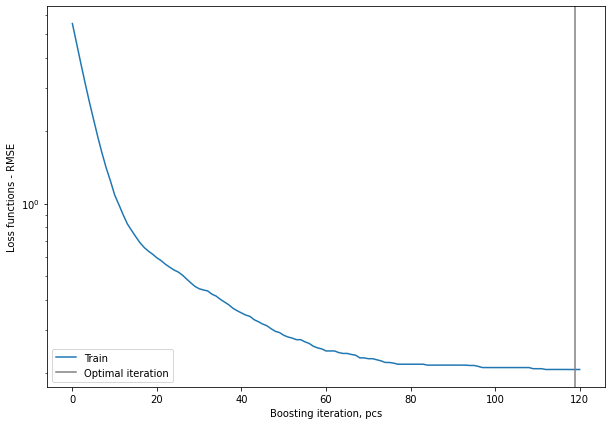

In [38]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [39]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.02
RMSE: 0.2
Relative RMSE(%):  0.029
MSE: 0.0
R square: 98.4%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.438
a1: 0.938
R^2: 0.987
Uncertainty
a0: 0.44+/-0.08
a1: 0.938+/-0.011


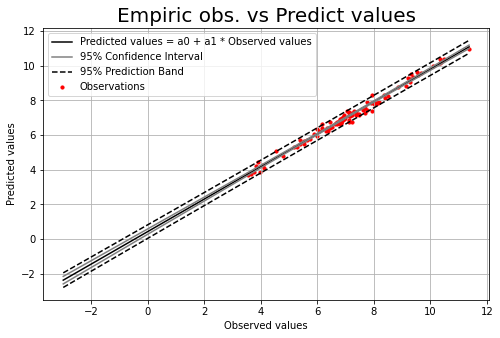

In [42]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

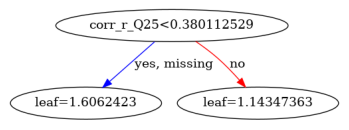

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

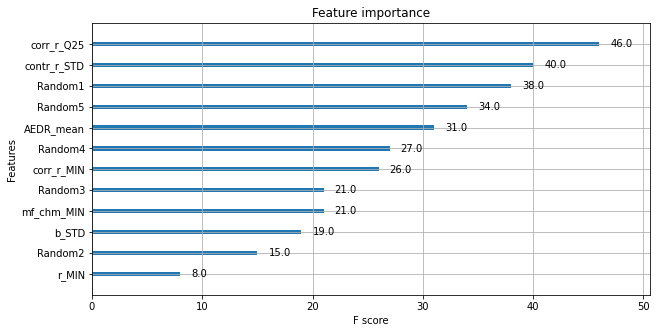

In [45]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

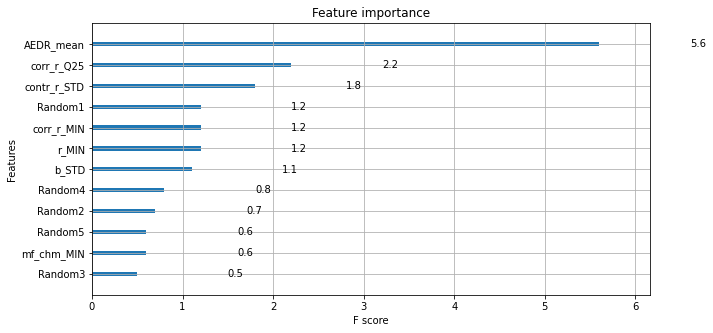

In [46]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

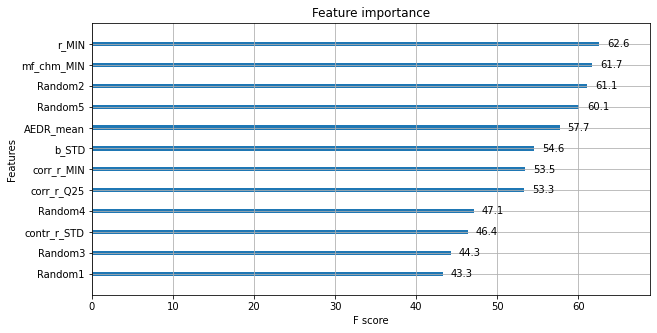

In [47]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [48]:
# Load SHAP`s library
import shap

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


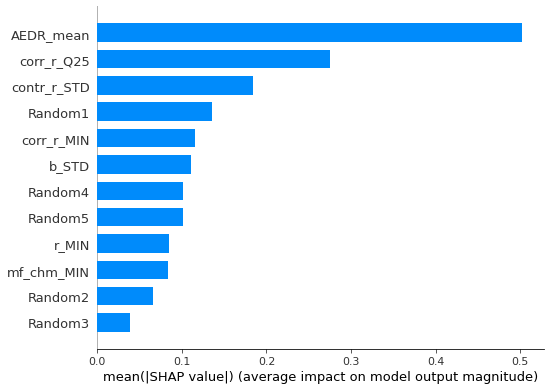

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

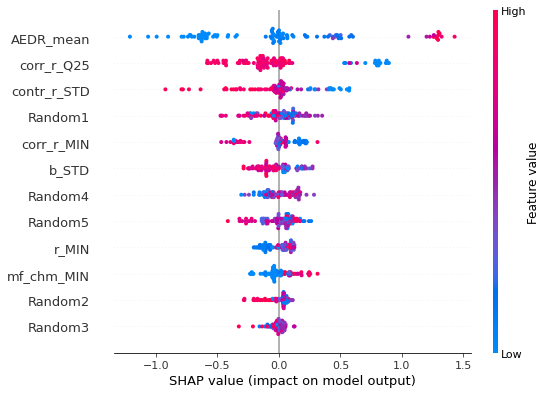

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

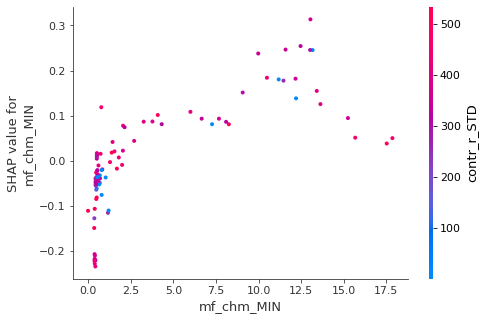

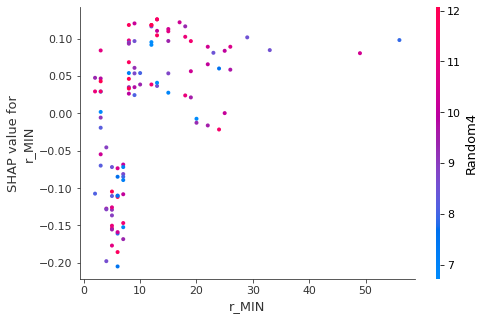

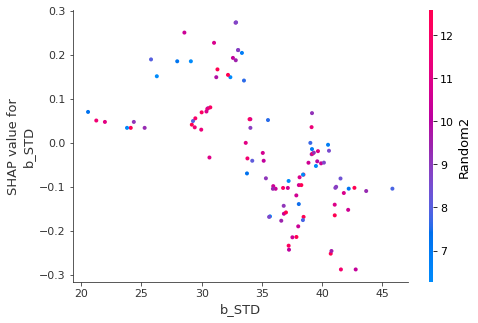

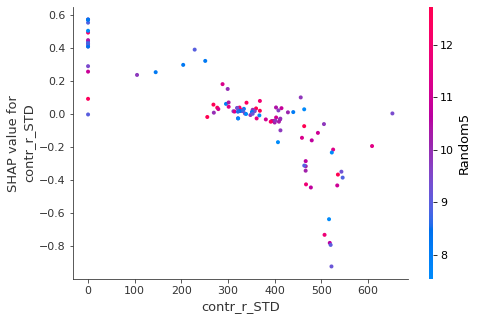

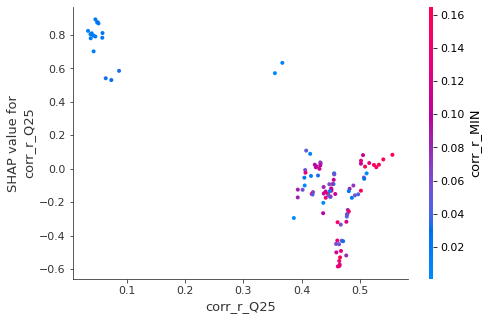

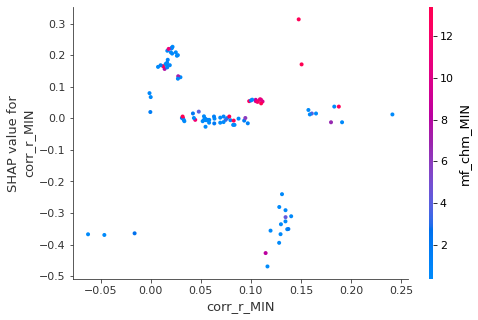

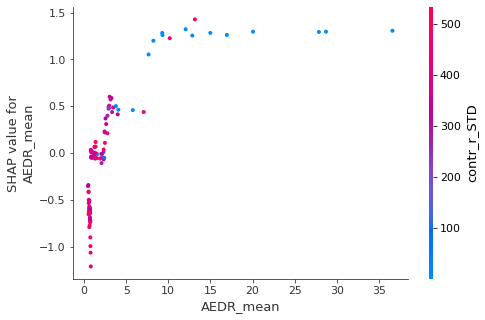

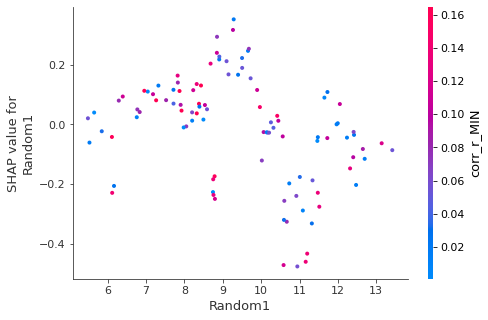

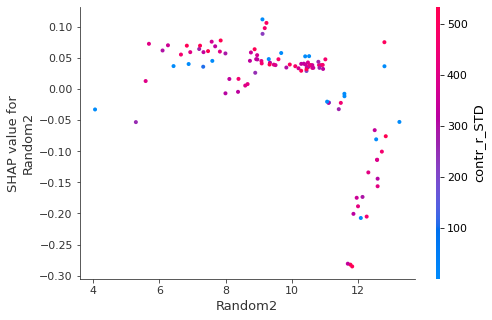

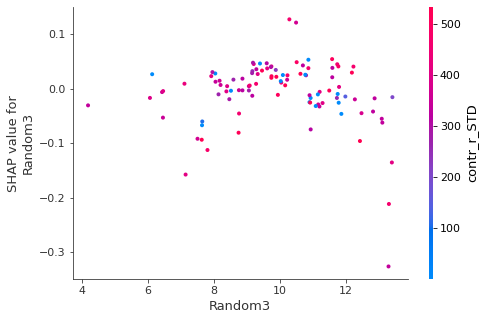

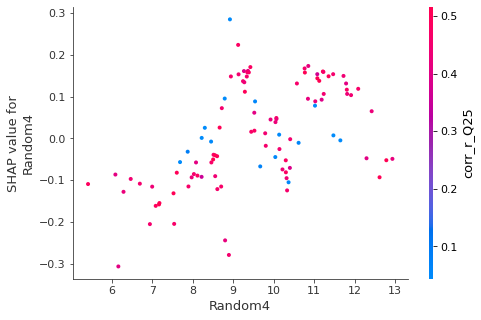

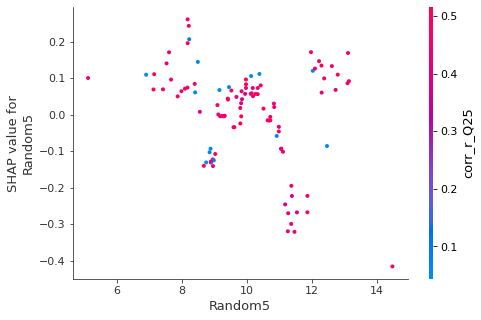

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Cs_XGB_model.txt")